In [1]:
import numpy as np
import h5py

import sys
sys.path.append('../')
from copy import deepcopy
import Analysis


def LoadModel(basedir, galprop_tag):
    # Load various diffuse models and run fits.
    print 'Running Analysis for model', galprop_tag
    
    
    #A = Analysis.Analysis(tag='P8R2_PSF3_CLEAN_V6_calore', basepath='/data/GCE_sys/')
    A = Analysis.Analysis(tag='P8R2_CLEAN_V6_calore', basepath='/data/GCE_sys/')
    
    A.GenSquareMask(l_range=[-40.,40.], b_range=[-40.,40.], plane_mask=2.)
    A.BinPhotons(infile='binned_photons_'+A.tag+'.npy')
    # Load 2FGL 
    A.AddPointSourceTemplate(fixNorm=True,pscmap='PSC_' + A.tag + '_fgl3_with_ext.npy')
    A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',psc_model='PSC_' + A.tag + '_fgl3_with_ext.npy',
                        alpha_psc=5., f_psc=0.1)
    
    A.AddIsotropicTemplate(fixNorm=False, fixSpectrum=False, isofile='IGRB_ackerman_2014_modA.dat') # External chi^2 used to fix normalization within uncertainties
    
    A.AddFermiBubbleTemplate(template_file='bubble_templates_diskcut30.0.fits', 
                         spec_file='reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False, fixNorm=False)
    
    
    
    A.AddHDF5Template(hdf5file=basedir +'/'+ galprop_tag+'.hdf5',verbosity=1, multiplier=1., bremsfrac=1.25, 
                  E_subsample=2, fixSpectrum=False, separate_ics=False)
    return A


A = LoadModel('/data/GCE_sys/new/','mod_s_42_XCO_P8_corrected')
A2 = LoadModel('/data/GCE_sys/new/','mod_s_44_XCO_P8_corrected')
A3 = LoadModel('/data/GCE_sys/new/','mod_s_44_XCO_P8_corrected')



Running Analysis for model mod_s_42_XCO_P8_corrected
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
Running Analysis for model mod_s_44_XCO_P8_corrected
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
Running Analysis for model mod_s_44_XCO_P8_corrected
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...


In [3]:

# Restore back to normal mask
A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
              r_s=20.0, axesratio=1, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]


A2.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=.9 ,
              r_s=20.0, axesratio=1.4, offset=(0., 0.), spec_file=None,size=25)

print 'DM generated'
A2.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A2.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]



A3.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
              r_s=20.0, axesratio=1, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A3.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A3.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]




# AddFitMetadata(basedir +'/'+ galprop_tag+'.hdf5', h5_path='/fit_results/bubbles_split/', A=A)

DM generated
Masking completed in 1.4674e-01 s
Write likelihood tempfile to  /tmp/tmpqgZF3H
Code generation completed in 1.9237e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -602480.48957 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.00291393267593 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 8.888300e-01 
 9.232605e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 1.024498e+00 
 7.231693e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.139695e+00 
 1.137445e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.403281e-01 
 1.926975e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 7.529235e-01 
 1.596787e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 8.888e-01 & 9.233e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.024e+00 & 7.232e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.140e+00 & 1.137e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.403e-01 & 1.927e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 7.529e-01 & 1.597e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.34e-01 s
Masking completed in 1.4935e-01 s
Write likelihood tempfile to  /tmp/tmptnKVX7
Code generation completed in 1.0550e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -476093.479942 
 TOTAL NCALL = 158 
 NCALLS = 158 
 
 
 EDM = 7.46092529596e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 9.036704e-01 
 1.062509e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.048468e+00 
 7.716364e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.142079e+00 
 1.208537e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 8.326716e-01 
 2.025984e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 6.804413e-01 
 1.534132e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 9.037e-01 & 1.063e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.048e+00 & 7.716e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.142e+00 & 1.209e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 8.327e-01 & 2.026e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 6.804e-01 & 1.534e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.04e-01 s
Masking completed in 1.4890e-01 s
Write likelihood tempfile to  /tmp/tmpAcRhwR
Code generation completed in 1.1549e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -373793.587421 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.000546059661379 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 9.264516e-01 
 1.141690e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.071335e+00 
 8.395932e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 9.367820e-01 
 1.263270e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.836316e-01 
 2.185394e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 8.207069e-01 
 1.503028e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 9.265e-01 & 1.142e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.071e+00 & 8.396e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 9.368e-01 & 1.263e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.836e-01 & 2.185e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 8.207e-01 & 1.503e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.63e-01 s
Masking completed in 1.4858e-01 s
Write likelihood tempfile to  /tmp/tmpprp6jM
Code generation completed in 3.2871e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -286056.675471 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.00082593247915 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 9.625545e-01 
 1.109611e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.077171e+00 
 8.995227e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 9.550582e-01 
 1.282152e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.570215e-01 
 2.293811e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 9.129602e-01 
 1.533360e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 9.626e-01 & 1.110e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.077e+00 & 8.995e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 9.551e-01 & 1.282e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.570e-01 & 2.294e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 9.130e-01 & 1.533e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.60e-01 s
Masking completed in 1.4878e-01 s
Write likelihood tempfile to  /tmp/tmpPvnE_v
Code generation completed in 1.0450e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -275832.477198 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 8.02592994973e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 9.740040e-01 
 1.208601e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.068617e+00 
 9.016152e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 9.621049e-01 
 1.205452e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 9.008000e-01 
 2.255384e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 6.909016e-01 
 1.400950e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 9.740e-01 & 1.209e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.069e+00 & 9.016e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 9.621e-01 & 1.205e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 9.008e-01 & 2.255e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 6.909e-01 & 1.401e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.4838e-01 s
Write likelihood tempfile to  /tmp/tmpHM4HQX
Code generation completed in 1.0910e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -273996.406865 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000382088212421 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 9.941782e-01 
 8.202497e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.126311e+00 
 9.172152e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 9.415312e-01 
 1.095829e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.373842e-01 
 2.244283e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 6.793326e-01 
 1.263202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 9.942e-01 & 8.202e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.126e+00 & 9.172e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 9.415e-01 & 1.096e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.374e-01 & 2.244e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 6.793e-01 & 1.263e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.60e-01 s
Masking completed in 1.4864e-01 s
Write likelihood tempfile to  /tmp/tmp_JZ4K5
Code generation completed in 1.0519e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -263470.935769 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.000757482900556 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.011528e+00 
 9.349818e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.109868e+00 
 8.973540e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 9.081574e-01 
 9.799153e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 8.176172e-01 
 2.131376e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 7.443685e-01 
 1.175643e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.012e+00 & 9.350e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.110e+00 & 8.974e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 9.082e-01 & 9.799e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 8.176e-01 & 2.131e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 7.444e-01 & 1.176e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.4885e-01 s
Write likelihood tempfile to  /tmp/tmpfuRu1P
Code generation completed in 1.0610e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -244997.470274 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000178063995002 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.008859e+00 
 7.518642e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.143259e+00 
 9.275087e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 9.594599e-01 
 9.620950e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.748426e-01 
 2.181823e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 8.943032e-01 
 1.090629e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.009e+00 & 7.519e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.143e+00 & 9.275e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 9.595e-01 & 9.621e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.748e-01 & 2.182e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 8.943e-01 & 1.091e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.4862e-01 s
Write likelihood tempfile to  /tmp/tmplXQF6W
Code generation completed in 1.2751e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -230395.543036 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.000165561474248 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 1.019929e+00 
 7.715217e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.101121e+00 
 9.194585e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 8.140862e-01 
 9.644881e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.357209e-01 
 2.124172e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 8.197525e-01 
 1.057325e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 1.020e+00 & 7.715e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.101e+00 & 9.195e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 8.141e-01 & 9.645e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.357e-01 & 2.124e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 8.198e-01 & 1.057e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.4859e-01 s
Write likelihood tempfile to  /tmp/tmpYidpoN
Code generation completed in 1.0610e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -206669.185286 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 5.76873100231e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.018718e+00 
 7.226088e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.129716e+00 
 9.576049e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 8.800790e-01 
 9.694336e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 8.097914e-01 
 2.176296e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 8.261086e-01 
 1.070075e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.019e+00 & 7.226e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.130e+00 & 9.576e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 8.801e-01 & 9.694e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 8.098e-01 & 2.176e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 8.261e-01 & 1.070e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.4860e-01 s
Write likelihood tempfile to  /tmp/tmp5TXDrF
Code generation completed in 1.0631e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188813.686413 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000404992368589 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 1.018131e+00 
 5.594823e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.111836e+00 
 9.635089e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.004112e+00 
 1.016568e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.621396e-01 
 2.131597e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 7.957238e-01 
 9.900655e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 1.018e+00 & 5.595e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.112e+00 & 9.635e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.004e+00 & 1.017e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.621e-01 & 2.132e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 7.957e-01 & 9.901e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.4862e-01 s
Write likelihood tempfile to  /tmp/tmp6mtnmO
Code generation completed in 1.0579e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -155133.74486 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000278928125356 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 1.019759e+00 
 5.266579e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.112231e+00 
 1.016391e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.010109e+00 
 1.071546e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.596988e-01 
 2.190280e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 8.032673e-01 
 9.957621e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 1.020e+00 & 5.267e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.112e+00 & 1.016e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.010e+00 & 1.072e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.597e-01 & 2.190e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 8.033e-01 & 9.958e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.4853e-01 s
Write likelihood tempfile to  /tmp/tmpqRph6a
Code generation completed in 1.6498e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -122771.146104 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000230416560712 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 1.018173e+00 
 5.424389e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.135691e+00 
 1.088118e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.778734e-01 
 1.148569e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.023501e-01 
 2.247632e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.040490e+00 
 9.193964e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 1.018e+00 & 5.424e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.136e+00 & 1.088e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.779e-01 & 1.149e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.024e-01 & 2.248e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.040e+00 & 9.194e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.69e-01 s
Masking completed in 1.5021e-01 s
Write likelihood tempfile to  /tmp/tmpLfukOn
Code generation completed in 1.0509e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -89059.1606622 
 TOTAL NCALL = 126 
 NCALLS = 126 
 
 
 EDM = 0.0023595838466 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.014952e+00 
 4.868000e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.090080e+00 
 1.157098e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 8.540251e-01 
 1.208784e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 7.228750e-01 
 2.272405e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 9.233160e-01 
 8.869829e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.015e+00 & 4.868e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.090e+00 & 1.157e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 8.540e-01 & 1.209e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 7.229e-01 & 2.272e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 9.233e-01 & 8.870e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.50e-01 s
Masking completed in 1.4851e-01 s
Write likelihood tempfile to  /tmp/tmp8ylUuW
Code generation completed in 1.0540e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -61109.9555189 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000674570636156 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.017895e+00 
 5.239376e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.153180e+00 
 1.294250e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 8.257606e-01 
 1.095674e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 6.921879e-01 
 2.346413e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 7.904479e-01 
 7.912725e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.018e+00 & 5.239e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.153e+00 & 1.294e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 8.258e-01 & 1.096e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 6.922e-01 & 2.346e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 7.904e-01 & 7.913e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.4894e-01 s
Write likelihood tempfile to  /tmp/tmpPnahEq
Code generation completed in 1.0650e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -32912.4279025 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 1.2745701755e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 1.013722e+00 
 4.830664e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.135757e+00 
 1.493083e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 8.879777e-01 
 1.058409e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 7.314799e-01 
 2.503725e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 7.579768e-01 
 7.676172e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 1.014e+00 & 4.831e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.136e+00 & 1.493e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 8.880e-01 & 1.058e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 7.315e-01 & 2.504e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 7.580e-01 & 7.676e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.60e-01 s
Masking completed in 1.4884e-01 s
Write likelihood tempfile to  /tmp/tmpLdHm4g
Code generation completed in 1.0600e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -10205.7893701 
 TOTAL NCALL = 133 
 NCALLS = 133 
 
 
 EDM = 6.2434793017e-08 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 1.011718e+00 
 4.786146e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.168996e+00 
 1.790890e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 8.954238e-01 
 1.227675e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.196428e-01 
 2.758390e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 9.050290e-01 
 8.523062e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 1.012e+00 & 4.786e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.169e+00 & 1.791e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 8.954e-01 & 1.228e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.196e-01 & 2.758e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 9.050e-01 & 8.523e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.57e-01 s
Masking completed in 1.4856e-01 s
Write likelihood tempfile to  /tmp/tmpyVIsKc
Code generation completed in 1.0750e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 7667.20859321 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 1.49993647911e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 1.014528e+00 
 5.572140e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.206299e+00 
 2.184792e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.327621e-01 
 1.452100e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 7.080760e-01 
 3.080094e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 9.668500e-01 
 8.720926e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 1.015e+00 & 5.572e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.206e+00 & 2.185e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.328e-01 & 1.452e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 7.081e-01 & 3.080e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 9.668e-01 & 8.721e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.59e-01 s
Masking completed in 1.4841e-01 s
Write likelihood tempfile to  /tmp/tmpM_GOqt
Code generation completed in 3.4440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17781.8672597 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 2.66905628758e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 1.011418e+00 
 7.540712e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.252824e+00 
 2.742227e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.626045e-01 
 1.484311e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 7.040180e-01 
 3.434727e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 8.411204e-01 
 7.557012e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 1.011e+00 & 7.541e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.253e+00 & 2.742e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.626e-01 & 1.484e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 7.040e-01 & 3.435e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 8.411e-01 & 7.557e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.58e-01 s
Masking completed in 1.4841e-01 s
Write likelihood tempfile to  /tmp/tmpCRM3JI
Code generation completed in 1.0171e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 21439.8120329 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00176552666708 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 1.002149e+00 
 7.132186e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.255970e+00 
 3.558064e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.009163e+00 
 1.299956e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 6.299657e-01 
 3.917303e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.486571e-01 
 6.789357e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 1.002e+00 & 7.132e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.256e+00 & 3.558e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.009e+00 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 6.300e-01 & 3.917e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.487e-01 & 6.789e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.46e-01 s
Masking completed in 1.4856e-01 s
Write likelihood tempfile to  /tmp/tmpR_N3B5
Code generation completed in 1.0560e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 20556.8766762 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 0.000406694400061 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 1.008024e+00 
 1.385077e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.228137e+00 
 5.059445e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.187190e-01 
 1.264091e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.178795e-01 
 4.875869e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.084791e-01 
 6.986030e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 1.008e+00 & 1.385e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.228e+00 & 5.059e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.187e-01 & 1.264e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.179e-01 & 4.876e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.085e-01 & 6.986e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.43e-01 s
Masking completed in 1.4851e-01 s
Write likelihood tempfile to  /tmp/tmpmxnaks
Code generation completed in 1.0779e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 16558.9984919 
 TOTAL NCALL = 108 
 NCALLS = 108 
 
 
 EDM = 0.00562575673353 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 9.909026e-01 
 1.234587e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.198868e+00 
 7.286855e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.766935e-01 
 1.197072e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 8.012694e-01 
 6.218145e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.254976e-01 
 7.316670e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 9.909e-01 & 1.235e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.199e+00 & 7.287e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.767e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 8.013e-01 & 6.218e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.255e-01 & 7.317e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.29e-01 s
Masking completed in 1.4850e-01 s
Write likelihood tempfile to  /tmp/tmpywzHUy
Code generation completed in 1.0791e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 10279.4916771 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 0.000133837430093 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 9.953963e-01 
 1.686848e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.718966e+00 
 1.388100e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.238948e-01 
 1.239516e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 7.730542e-01 
 1.060656e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.800403e-01 
 7.553663e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 9.954e-01 & 1.687e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.719e+00 & 1.388e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.239e-01 & 1.240e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 7.731e-01 & 1.061e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.800e-01 & 7.554e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.44e-01 s
Masking completed in 1.4868e-01 s
Write likelihood tempfile to  /tmp/tmpK0qomB
Code generation completed in 1.0650e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3837.97090212 
 TOTAL NCALL = 119 
 NCALLS = 119 
 
 
 EDM = 1.82012915565e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 9.843025e-01 
 3.629182e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 2.002432e+00 
 3.707426e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.159188e-01 
 2.208126e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.479073e+00 
 3.112909e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.676567e-01 
 1.305191e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 9.843e-01 & 3.629e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 2.002e+00 & 3.707e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.159e-01 & 2.208e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.479e+00 & 3.113e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.677e-01 & 1.305e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.43e-01 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 8.888300e-01 
 9.232513e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 1.024498e+00 
 7.231619e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.139695e+00 
 1.137394e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.403281e-01 
 1.926907e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 7.529235e-01 
 1.596739e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 8.888e-01 & 9.233e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.024e+00 & 7.232e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.140e+00 & 1.137e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.403e-01 & 1.927e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 7.529e-01 & 1.597e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.33
 
 
 
 -0.60
 
 
 
 -0.45
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.62
 
 
 
 -0.06
 
 
 
 
 
 Isotropic_0 
 
 
 0.33
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.70
 
 
 
 -0.80
 
 
 
 
 
 ICS_0 
 
 
 -0.60
 
 
 
 -0.62
 
 
 
 -0.70
 
 
 
 1.00
 
 
 
 0.43
 
 
 
 
 
 Bubbles_0 
 
 
 -0.45
 
 
 
 -0.06
 
 
 
 -0.80
 
 
 
 0.43
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{194,208,163} 0.33 & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{204,193,155} -0.45\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{194,208,163} 0.33 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{237,144,131} -0.80\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} 0.43\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{204,193,155} -0.45 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{202,196,157} 0.43 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 9.036704e-01 
 1.062513e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.048468e+00 
 7.716387e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.142079e+00 
 1.208550e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 8.326716e-01 
 2.026002e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 6.804413e-01 
 1.534145e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 9.037e-01 & 1.063e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.048e+00 & 7.716e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.142e+00 & 1.209e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 8.327e-01 & 2.026e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 6.804e-01 & 1.534e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.13
 
 
 
 0.32
 
 
 
 -0.59
 
 
 
 -0.42
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.13
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.63
 
 
 
 -0.06
 
 
 
 
 
 Isotropic_1 
 
 
 0.32
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.69
 
 
 
 -0.79
 
 
 
 
 
 ICS_1 
 
 
 -0.59
 
 
 
 -0.63
 
 
 
 -0.69
 
 
 
 1.00
 
 
 
 0.40
 
 
 
 
 
 Bubbles_1 
 
 
 -0.42
 
 
 
 -0.06
 
 
 
 -0.79
 
 
 
 0.40
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{217,173,145} -0.59 & \cellcolor[RGB]{202,196,157} -0.42\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{235,146,132} -0.79\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{217,173,145} -0.59 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,199,158} 0.40\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{235,146,132} -0.79 & \cellcolor[RGB]{200,199,158} 0.40 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 9.264516e-01 
 1.141688e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.071335e+00 
 8.395940e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 9.367820e-01 
 1.263241e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.836316e-01 
 2.185374e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 8.207069e-01 
 1.503001e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 9.265e-01 & 1.142e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.071e+00 & 8.396e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 9.368e-01 & 1.263e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.836e-01 & 2.185e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 8.207e-01 & 1.503e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.12
 
 
 
 0.31
 
 
 
 -0.58
 
 
 
 -0.40
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.12
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.64
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_2 
 
 
 0.31
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.67
 
 
 
 -0.77
 
 
 
 
 
 ICS_2 
 
 
 -0.58
 
 
 
 -0.64
 
 
 
 -0.67
 
 
 
 1.00
 
 
 
 0.37
 
 
 
 
 
 Bubbles_2 
 
 
 -0.40
 
 
 
 -0.05
 
 
 
 -0.77
 
 
 
 0.37
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{191,212,165} 0.31 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{200,199,158} -0.40\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{168,247,183} -0.05\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{191,212,165} 0.31 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{225,162,139} -0.67 & \cellcolor[RGB]{234,148,133} -0.77\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{225,162,139} -0.67 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,203,160} 0.37\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{168,247,183} -0.05 & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{197,203,160} 0.37 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 9.625545e-01 
 1.109612e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.077171e+00 
 8.995236e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 9.550582e-01 
 1.282122e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.570215e-01 
 2.293792e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 9.129602e-01 
 1.533333e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 9.626e-01 & 1.110e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.077e+00 & 8.995e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 9.551e-01 & 1.282e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.570e-01 & 2.294e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 9.130e-01 & 1.533e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.11
 
 
 
 0.28
 
 
 
 -0.56
 
 
 
 -0.37
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.11
 
 
 
 1.00
 
 
 
 0.16
 
 
 
 -0.64
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_3 
 
 
 0.28
 
 
 
 0.16
 
 
 
 1.00
 
 
 
 -0.65
 
 
 
 -0.74
 
 
 
 
 
 ICS_3 
 
 
 -0.56
 
 
 
 -0.64
 
 
 
 -0.65
 
 
 
 1.00
 
 
 
 0.32
 
 
 
 
 
 Bubbles_3 
 
 
 -0.37
 
 
 
 -0.04
 
 
 
 -0.74
 
 
 
 0.32
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{197,203,160} -0.37\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{166,249,183} -0.04\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{231,152,135} -0.74\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,210,164} 0.32\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 9.740040e-01 
 1.208601e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.068617e+00 
 9.016174e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 9.621049e-01 
 1.205436e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 9.008000e-01 
 2.255377e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 6.909016e-01 
 1.400936e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 9.740e-01 & 1.209e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.069e+00 & 9.016e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 9.621e-01 & 1.205e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 9.008e-01 & 2.255e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 6.909e-01 & 1.401e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.10
 
 
 
 0.26
 
 
 
 -0.55
 
 
 
 -0.35
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.10
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 -0.65
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_4 
 
 
 0.26
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 -0.63
 
 
 
 -0.72
 
 
 
 
 
 ICS_4 
 
 
 -0.55
 
 
 
 -0.65
 
 
 
 -0.63
 
 
 
 1.00
 
 
 
 0.28
 
 
 
 
 
 Bubbles_4 
 
 
 -0.35
 
 
 
 -0.03
 
 
 
 -0.72
 
 
 
 0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{165,250,184} -0.03\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{230,155,136} -0.72\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,167} 0.28\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{230,155,136} -0.72 & \cellcolor[RGB]{189,215,167} 0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 9.941782e-01 
 8.202506e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.126311e+00 
 9.172193e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 9.415312e-01 
 1.095811e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.373842e-01 
 2.244280e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 6.793326e-01 
 1.263186e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 9.942e-01 & 8.203e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.126e+00 & 9.172e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 9.415e-01 & 1.096e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.374e-01 & 2.244e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 6.793e-01 & 1.263e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.08
 
 
 
 0.24
 
 
 
 -0.54
 
 
 
 -0.33
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.08
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.66
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_5 
 
 
 0.24
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 -0.60
 
 
 
 -0.70
 
 
 
 
 
 ICS_5 
 
 
 -0.54
 
 
 
 -0.66
 
 
 
 -0.60
 
 
 
 1.00
 
 
 
 0.23
 
 
 
 
 
 Bubbles_5 
 
 
 -0.33
 
 
 
 -0.01
 
 
 
 -0.70
 
 
 
 0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{223,164,141} -0.66 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{227,159,138} -0.70\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{223,164,141} -0.66 & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} 0.23\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.011528e+00 
 9.349837e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.109868e+00 
 8.973558e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 9.081574e-01 
 9.799036e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 8.176172e-01 
 2.131372e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 7.443685e-01 
 1.175634e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.012e+00 & 9.350e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.110e+00 & 8.974e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 9.082e-01 & 9.799e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 8.176e-01 & 2.131e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 7.444e-01 & 1.176e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.07
 
 
 
 0.21
 
 
 
 -0.52
 
 
 
 -0.30
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.07
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.67
 
 
 
 0.01
 
 
 
 
 
 Isotropic_6 
 
 
 0.21
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.57
 
 
 
 -0.65
 
 
 
 
 
 ICS_6 
 
 
 -0.52
 
 
 
 -0.67
 
 
 
 -0.57
 
 
 
 1.00
 
 
 
 0.16
 
 
 
 
 
 Bubbles_6 
 
 
 -0.30
 
 
 
 0.01
 
 
 
 -0.65
 
 
 
 0.16
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{191,213,165} -0.30\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{223,164,141} -0.65\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{223,164,141} -0.65 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.008859e+00 
 7.518657e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.143259e+00 
 9.275123e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 9.594599e-01 
 9.620876e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.748426e-01 
 2.181825e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 8.943032e-01 
 1.090624e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.009e+00 & 7.519e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.143e+00 & 9.275e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 9.595e-01 & 9.621e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.748e-01 & 2.182e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 8.943e-01 & 1.091e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.06
 
 
 
 0.20
 
 
 
 -0.51
 
 
 
 -0.29
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.06
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.67
 
 
 
 0.02
 
 
 
 
 
 Isotropic_7 
 
 
 0.20
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.54
 
 
 
 -0.63
 
 
 
 
 
 ICS_7 
 
 
 -0.51
 
 
 
 -0.67
 
 
 
 -0.54
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_7 
 
 
 -0.29
 
 
 
 0.02
 
 
 
 -0.63
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{189,215,166} -0.29\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{165,251,185} 0.02\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{221,168,143} -0.63\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{189,215,166} -0.29 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 1.019929e+00 
 7.715235e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.101121e+00 
 9.194600e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 8.140862e-01 
 9.644840e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.357209e-01 
 2.124173e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 8.197525e-01 
 1.057323e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 1.020e+00 & 7.715e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.101e+00 & 9.195e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 8.141e-01 & 9.645e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.357e-01 & 2.124e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 8.198e-01 & 1.057e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.04
 
 
 
 0.18
 
 
 
 -0.50
 
 
 
 -0.27
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.68
 
 
 
 0.03
 
 
 
 
 
 Isotropic_8 
 
 
 0.18
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.51
 
 
 
 -0.60
 
 
 
 
 
 ICS_8 
 
 
 -0.50
 
 
 
 -0.68
 
 
 
 -0.51
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_8 
 
 
 -0.27
 
 
 
 0.03
 
 
 
 -0.60
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{188,217,168} -0.27\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{166,249,184} 0.03\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,183,150} -0.51 & \cellcolor[RGB]{219,171,144} -0.60\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{210,183,150} -0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{188,217,168} -0.27 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.018718e+00 
 7.226099e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.129716e+00 
 9.576074e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 8.800790e-01 
 9.694302e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 8.097914e-01 
 2.176299e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 8.261086e-01 
 1.070073e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.019e+00 & 7.226e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.130e+00 & 9.576e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 8.801e-01 & 9.694e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 8.098e-01 & 2.176e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 8.261e-01 & 1.070e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.03
 
 
 
 0.17
 
 
 
 -0.49
 
 
 
 -0.25
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.68
 
 
 
 0.04
 
 
 
 
 
 Isotropic_9 
 
 
 0.17
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.49
 
 
 
 -0.57
 
 
 
 
 
 ICS_9 
 
 
 -0.49
 
 
 
 -0.68
 
 
 
 -0.49
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_9 
 
 
 -0.25
 
 
 
 0.04
 
 
 
 -0.57
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{186,219,168} -0.25\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{167,249,183} 0.04\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{208,186,152} -0.49 & \cellcolor[RGB]{216,175,146} -0.57\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{208,186,152} -0.49 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} 0.04\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{186,219,168} -0.25 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{216,175,146} -0.57 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 1.018131e+00 
 5.594830e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.111836e+00 
 9.635083e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.004112e+00 
 1.016564e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.621396e-01 
 2.131592e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 7.957238e-01 
 9.900633e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 1.018e+00 & 5.595e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.112e+00 & 9.635e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.004e+00 & 1.017e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.621e-01 & 2.132e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 7.957e-01 & 9.901e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.16
 
 
 
 -0.47
 
 
 
 -0.24
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.68
 
 
 
 0.05
 
 
 
 
 
 Isotropic_10 
 
 
 0.16
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.48
 
 
 
 -0.56
 
 
 
 
 
 ICS_10 
 
 
 -0.47
 
 
 
 -0.68
 
 
 
 -0.48
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 
 
 Bubbles_10 
 
 
 -0.24
 
 
 
 0.05
 
 
 
 -0.56
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{185,221,169} -0.24\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{226,160,139} -0.68 & \cellcolor[RGB]{167,248,183} 0.05\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{215,177,147} -0.56\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{226,160,139} -0.68 & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} 0.01\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 1.019759e+00 
 5.266583e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.112231e+00 
 1.016390e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.010109e+00 
 1.071543e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.596988e-01 
 2.190276e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 8.032673e-01 
 9.957608e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 1.020e+00 & 5.267e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.112e+00 & 1.016e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.010e+00 & 1.072e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.597e-01 & 2.190e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 8.033e-01 & 9.958e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.15
 
 
 
 -0.46
 
 
 
 -0.23
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.69
 
 
 
 0.05
 
 
 
 
 
 Isotropic_11 
 
 
 0.15
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.45
 
 
 
 -0.54
 
 
 
 
 
 ICS_11 
 
 
 -0.46
 
 
 
 -0.69
 
 
 
 -0.45
 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 
 
 Bubbles_11 
 
 
 -0.23
 
 
 
 0.05
 
 
 
 -0.54
 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{185,222,170} -0.23\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{226,160,138} -0.69 & \cellcolor[RGB]{168,247,182} 0.05\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{212,180,149} -0.54\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{226,160,138} -0.69 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{185,222,170} -0.23 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{212,180,149} -0.54 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 1.018173e+00 
 5.424397e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.135691e+00 
 1.088117e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.778734e-01 
 1.148567e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.023501e-01 
 2.247628e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.040490e+00 
 9.193958e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 1.018e+00 & 5.424e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.136e+00 & 1.088e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.779e-01 & 1.149e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.024e-01 & 2.248e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.040e+00 & 9.194e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.15
 
 
 
 -0.44
 
 
 
 -0.22
 
 
 
 
 
 Pi0_Brems_12 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.70
 
 
 
 0.06
 
 
 
 
 
 Isotropic_12 
 
 
 0.15
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.44
 
 
 
 -0.52
 
 
 
 
 
 ICS_12 
 
 
 -0.44
 
 
 
 -0.70
 
 
 
 -0.44
 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 
 
 Bubbles_12 
 
 
 -0.22
 
 
 
 0.06
 
 
 
 -0.52
 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{204,193,156} -0.44 & \cellcolor[RGB]{183,224,171} -0.22\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.09 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{169,246,182} 0.06\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{172,241,179} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{211,183,150} -0.52\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{204,193,156} -0.44 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.014952e+00 
 4.868006e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.090080e+00 
 1.157101e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 8.540251e-01 
 1.208793e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 7.228750e-01 
 2.272422e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 9.233160e-01 
 8.869884e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.015e+00 & 4.868e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.090e+00 & 1.157e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 8.540e-01 & 1.209e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 7.229e-01 & 2.272e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 9.233e-01 & 8.870e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.13
 
 
 
 -0.43
 
 
 
 -0.20
 
 
 
 
 
 Pi0_Brems_13 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.70
 
 
 
 0.07
 
 
 
 
 
 Isotropic_13 
 
 
 0.13
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.42
 
 
 
 -0.50
 
 
 
 
 
 ICS_13 
 
 
 -0.43
 
 
 
 -0.70
 
 
 
 -0.42
 
 
 
 1.00
 
 
 
 -0.09
 
 
 
 
 
 Bubbles_13 
 
 
 -0.20
 
 
 
 0.07
 
 
 
 -0.50
 
 
 
 -0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{182,226,172} -0.20\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{209,186,152} -0.50\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.017895e+00 
 5.239376e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.153180e+00 
 1.294249e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 8.257606e-01 
 1.095674e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 6.921879e-01 
 2.346410e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 7.904479e-01 
 7.912725e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.018e+00 & 5.239e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.153e+00 & 1.294e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 8.258e-01 & 1.096e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 6.922e-01 & 2.346e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 7.904e-01 & 7.913e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 -0.04
 
 
 
 0.11
 
 
 
 -0.41
 
 
 
 -0.18
 
 
 
 
 
 Pi0_Brems_14 
 
 
 -0.04
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.71
 
 
 
 0.09
 
 
 
 
 
 Isotropic_14 
 
 
 0.11
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 -0.44
 
 
 
 
 
 ICS_14 
 
 
 -0.41
 
 
 
 -0.71
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 
 
 Bubbles_14 
 
 
 -0.18
 
 
 
 0.09
 
 
 
 -0.44
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{180,229,174} -0.18\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{203,194,156} -0.44\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} -0.17\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{180,229,174} -0.18 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{179,231,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 1.013722e+00 
 4.830963e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.135757e+00 
 1.492789e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 8.879777e-01 
 1.057596e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 7.314799e-01 
 2.504070e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 7.579768e-01 
 7.668505e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 1.014e+00 & 4.831e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.136e+00 & 1.493e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 8.880e-01 & 1.058e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 7.315e-01 & 2.504e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 7.580e-01 & 7.669e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 -0.05
 
 
 
 0.10
 
 
 
 -0.39
 
 
 
 -0.17
 
 
 
 
 
 Pi0_Brems_15 
 
 
 -0.05
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.72
 
 
 
 0.09
 
 
 
 
 
 Isotropic_15 
 
 
 0.10
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 -0.39
 
 
 
 
 
 ICS_15 
 
 
 -0.39
 
 
 
 -0.72
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 
 
 Bubbles_15 
 
 
 -0.17
 
 
 
 0.09
 
 
 
 -0.39
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{178,231,174} -0.17\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{172,241,180} 0.09\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{199,201,159} -0.39\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,172} -0.21\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{182,225,172} -0.21 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 1.011718e+00 
 4.785617e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.168996e+00 
 1.790324e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 8.954238e-01 
 1.227459e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.196428e-01 
 2.758355e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 9.050290e-01 
 8.517197e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 1.012e+00 & 4.786e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.169e+00 & 1.790e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 8.954e-01 & 1.227e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.196e-01 & 2.758e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 9.050e-01 & 8.517e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 0.10
 
 
 
 -0.38
 
 
 
 -0.17
 
 
 
 
 
 Pi0_Brems_16 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.72
 
 
 
 0.10
 
 
 
 
 
 Isotropic_16 
 
 
 0.10
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 -0.39
 
 
 
 
 
 ICS_16 
 
 
 -0.38
 
 
 
 -0.72
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 -0.22
 
 
 
 
 
 Bubbles_16 
 
 
 -0.17
 
 
 
 0.10
 
 
 
 -0.39
 
 
 
 -0.22
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{198,203,160} -0.38 & \cellcolor[RGB]{178,231,175} -0.17\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{230,155,136} -0.72 & \cellcolor[RGB]{172,240,179} 0.10\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{199,200,159} -0.39\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{198,203,160} -0.38 & \cellcolor[RGB]{230,155,136} -0.72 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,225,171} -0.22\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{178,231,175} -0.17 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{183,225,171} -0.22 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 1.014528e+00 
 5.572141e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.206299e+00 
 2.184792e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.327621e-01 
 1.452100e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 7.080760e-01 
 3.080093e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 9.668500e-01 
 8.720927e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 1.015e+00 & 5.572e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.206e+00 & 2.185e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.328e-01 & 1.452e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 7.081e-01 & 3.080e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 9.668e-01 & 8.721e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 0.10
 
 
 
 -0.37
 
 
 
 -0.17
 
 
 
 
 
 Pi0_Brems_17 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.72
 
 
 
 0.08
 
 
 
 
 
 Isotropic_17 
 
 
 0.10
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 -0.40
 
 
 
 
 
 ICS_17 
 
 
 -0.37
 
 
 
 -0.72
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 -0.19
 
 
 
 
 
 Bubbles_17 
 
 
 -0.17
 
 
 
 0.08
 
 
 
 -0.40
 
 
 
 -0.19
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{178,231,174} -0.17\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{171,242,180} 0.08\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{200,199,158} -0.40\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} -0.19\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 1.011418e+00 
 7.540711e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.252824e+00 
 2.742228e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.626045e-01 
 1.484311e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 7.040180e-01 
 3.434727e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 8.411204e-01 
 7.557011e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 1.011e+00 & 7.541e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.253e+00 & 2.742e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.626e-01 & 1.484e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 7.040e-01 & 3.435e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 8.411e-01 & 7.557e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 -0.07
 
 
 
 0.09
 
 
 
 -0.37
 
 
 
 -0.15
 
 
 
 
 
 Pi0_Brems_18 
 
 
 -0.07
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.73
 
 
 
 0.09
 
 
 
 
 
 Isotropic_18 
 
 
 0.09
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 -0.37
 
 
 
 
 
 ICS_18 
 
 
 -0.37
 
 
 
 -0.73
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 
 
 Bubbles_18 
 
 
 -0.15
 
 
 
 0.09
 
 
 
 -0.37
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{177,233,175} -0.15\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{172,241,180} 0.09\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,208,163} -0.33 & \cellcolor[RGB]{197,203,160} -0.37\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{194,208,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,172} -0.21\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{182,225,172} -0.21 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 1.002149e+00 
 7.132181e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.255970e+00 
 3.558069e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.009163e+00 
 1.299958e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 6.299657e-01 
 3.917314e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.486571e-01 
 6.789370e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 1.002e+00 & 7.132e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.256e+00 & 3.558e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.009e+00 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 6.300e-01 & 3.917e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.487e-01 & 6.789e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 0.08
 
 
 
 -0.37
 
 
 
 -0.16
 
 
 
 
 
 Pi0_Brems_19 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.74
 
 
 
 0.09
 
 
 
 
 
 Isotropic_19 
 
 
 0.08
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 -0.33
 
 
 
 
 
 ICS_19 
 
 
 -0.37
 
 
 
 -0.74
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 
 
 Bubbles_19 
 
 
 -0.16
 
 
 
 0.09
 
 
 
 -0.33
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{177,233,175} -0.16\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,164} -0.31 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{192,211,164} -0.31 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,225,171} -0.21\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{177,233,175} -0.16 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{183,225,171} -0.21 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 1.008024e+00 
 1.385074e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.228137e+00 
 5.059451e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.187190e-01 
 1.263985e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.178795e-01 
 4.875800e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.084791e-01 
 6.985913e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 1.008e+00 & 1.385e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.228e+00 & 5.059e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.187e-01 & 1.264e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.179e-01 & 4.876e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.085e-01 & 6.986e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 0.05
 
 
 
 -0.36
 
 
 
 -0.13
 
 
 
 
 
 Pi0_Brems_20 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.76
 
 
 
 0.10
 
 
 
 
 
 Isotropic_20 
 
 
 0.05
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 -0.25
 
 
 
 
 
 ICS_20 
 
 
 -0.36
 
 
 
 -0.76
 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 
 
 Bubbles_20 
 
 
 -0.13
 
 
 
 0.10
 
 
 
 -0.25
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{175,236,177} -0.13\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{232,151,134} -0.76 & \cellcolor[RGB]{172,241,179} 0.10\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{186,220,169} -0.25\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{232,151,134} -0.76 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.26\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 9.909026e-01 
 1.234569e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.198868e+00 
 7.286739e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.766935e-01 
 1.197016e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 8.012694e-01 
 6.217780e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.254976e-01 
 7.315242e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 9.909e-01 & 1.235e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.199e+00 & 7.287e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.767e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 8.013e-01 & 6.218e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.255e-01 & 7.315e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 0.04
 
 
 
 -0.36
 
 
 
 -0.14
 
 
 
 
 
 Pi0_Brems_21 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.76
 
 
 
 0.09
 
 
 
 
 
 Isotropic_21 
 
 
 0.04
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.20
 
 
 
 -0.18
 
 
 
 
 
 ICS_21 
 
 
 -0.36
 
 
 
 -0.76
 
 
 
 -0.20
 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 
 
 Bubbles_21 
 
 
 -0.14
 
 
 
 0.09
 
 
 
 -0.18
 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{176,235,176} -0.14\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{180,229,173} -0.18\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} -0.25\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 9.953963e-01 
 1.686851e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.718966e+00 
 1.388140e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.238948e-01 
 1.239500e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 7.730542e-01 
 1.060669e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.800403e-01 
 7.552872e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 9.954e-01 & 1.687e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.719e+00 & 1.388e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.239e-01 & 1.239e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 7.731e-01 & 1.061e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.800e-01 & 7.553e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 -0.05
 
 
 
 0.02
 
 
 
 -0.36
 
 
 
 -0.13
 
 
 
 
 
 Pi0_Brems_22 
 
 
 -0.05
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.79
 
 
 
 0.09
 
 
 
 
 
 Isotropic_22 
 
 
 0.02
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 -0.12
 
 
 
 
 
 ICS_22 
 
 
 -0.36
 
 
 
 -0.79
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 
 
 Bubbles_22 
 
 
 -0.13
 
 
 
 0.09
 
 
 
 -0.12
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{175,236,177} -0.13\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{235,146,132} -0.79 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,175} -0.16 & \cellcolor[RGB]{174,237,178} -0.12\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{235,146,132} -0.79 & \cellcolor[RGB]{178,231,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} -0.23\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{174,237,178} -0.12 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 9.843025e-01 
 3.637000e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 2.002432e+00 
 3.670871e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.159188e-01 
 2.207797e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.479073e+00 
 3.068855e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.676567e-01 
 1.303640e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 9.843e-01 & 3.637e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 2.002e+00 & 3.671e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.159e-01 & 2.208e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.479e+00 & 3.069e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.677e-01 & 1.304e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 -0.38
 
 
 
 -0.09
 
 
 
 
 
 Pi0_Brems_23 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.80
 
 
 
 0.09
 
 
 
 
 
 Isotropic_23 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.06
 
 
 
 
 
 ICS_23 
 
 
 -0.38
 
 
 
 -0.80
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 
 
 Bubbles_23 
 
 
 -0.09
 
 
 
 0.09
 
 
 
 -0.06
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{198,201,159} -0.38 & \cellcolor[RGB]{171,241,180} -0.09\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{172,241,180} 0.09\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} -0.11 & \cellcolor[RGB]{169,246,182} -0.06\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{198,201,159} -0.38 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{173,240,179} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,171} -0.21\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{171,241,180} -0.09 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 1.4866e-01 s
Write likelihood tempfile to  /tmp/tmpe7j4fD
Code generation completed in 1.1458e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -602511.463327 
 TOTAL NCALL = 171 
 NCALLS = 171 
 
 
 EDM = 1.07055074816e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 2.083306e-01 
 7.969990e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.999546e-01 
 7.132310e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.530043e+00 
 1.025225e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 7.954070e-01 
 1.768063e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 7.092845e-01 
 1.686541e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 2.083e-01 & 7.970e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.000e+00 & 7.132e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.530e+00 & 1.025e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 7.954e-01 & 1.768e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 7.093e-01 & 1.687e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.00e-01 s
Masking completed in 1.4767e-01 s
Write likelihood tempfile to  /tmp/tmpset7Dx
Code generation completed in 4.5979e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -476129.11921 
 TOTAL NCALL = 153 
 NCALLS = 153 
 
 
 EDM = 0.000280679670557 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.920574e-01 
 9.695708e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.023637e+00 
 7.621623e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.560276e+00 
 1.094896e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 7.824648e-01 
 1.894078e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 6.439565e-01 
 1.636848e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.921e-01 & 9.696e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.024e+00 & 7.622e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.560e+00 & 1.095e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 7.825e-01 & 1.894e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 6.440e-01 & 1.637e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.89e-01 s
Masking completed in 1.4777e-01 s
Write likelihood tempfile to  /tmp/tmpnBGIwV
Code generation completed in 1.0788e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -373823.281801 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.00284652752436 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.974685e-01 
 1.086343e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.045730e+00 
 8.307159e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.365120e+00 
 1.152980e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.302513e-01 
 2.081651e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 7.865176e-01 
 1.619088e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.975e-01 & 1.086e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.046e+00 & 8.307e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.365e+00 & 1.153e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.303e-01 & 2.082e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 7.865e-01 & 1.619e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.60e-01 s
Masking completed in 1.4696e-01 s
Write likelihood tempfile to  /tmp/tmp2uL40v
Code generation completed in 1.0440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -286077.166213 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 8.07143908563e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 2.822485e-01 
 1.074083e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.051866e+00 
 8.910927e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.308518e+00 
 1.191190e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.099093e-01 
 2.214508e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 9.042041e-01 
 1.668026e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 2.822e-01 & 1.074e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.052e+00 & 8.911e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.309e+00 & 1.191e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.099e-01 & 2.215e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 9.042e-01 & 1.668e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.59e-01 s
Masking completed in 1.4655e-01 s
Write likelihood tempfile to  /tmp/tmpIbNBsY
Code generation completed in 1.0900e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -275852.472848 
 TOTAL NCALL = 158 
 NCALLS = 158 
 
 
 EDM = 2.08471121534e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 1.309714e-01 
 1.201304e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.041717e+00 
 8.943729e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.301521e+00 
 1.120810e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 8.642478e-01 
 2.218998e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 7.903528e-01 
 1.532529e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 1.310e-01 & 1.201e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.042e+00 & 8.944e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.302e+00 & 1.121e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 8.642e-01 & 2.219e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 7.904e-01 & 1.533e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.85e-01 s
Masking completed in 1.4685e-01 s
Write likelihood tempfile to  /tmp/tmpEWMMon
Code generation completed in 1.0710e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -274015.780773 
 TOTAL NCALL = 153 
 NCALLS = 153 
 
 
 EDM = 9.57738803191e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 4.297535e-01 
 8.326464e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.099661e+00 
 9.118043e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.130293e+00 
 1.029175e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.069572e-01 
 2.252673e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 6.817044e-01 
 1.397568e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 4.298e-01 & 8.326e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.100e+00 & 9.118e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.130e+00 & 1.029e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.070e-01 & 2.253e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 6.817e-01 & 1.398e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.79e-01 s
Masking completed in 1.4677e-01 s
Write likelihood tempfile to  /tmp/tmph3uy_W
Code generation completed in 1.0879e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -263490.571424 
 TOTAL NCALL = 158 
 NCALLS = 158 
 
 
 EDM = 2.32451681304e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 3.716523e-01 
 9.790211e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.083645e+00 
 8.932915e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.092729e+00 
 9.297208e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 7.879489e-01 
 2.183292e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 8.108301e-01 
 1.313416e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 3.717e-01 & 9.790e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.084e+00 & 8.933e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.093e+00 & 9.297e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 7.879e-01 & 2.183e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 8.108e-01 & 1.313e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.85e-01 s
Masking completed in 1.4689e-01 s
Write likelihood tempfile to  /tmp/tmpAAT3fm
Code generation completed in 1.0591e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -245010.402449 
 TOTAL NCALL = 154 
 NCALLS = 154 
 
 
 EDM = 7.78297138892e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 5.111720e-01 
 7.989007e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.117872e+00 
 9.249364e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.072025e+00 
 9.195180e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.484788e-01 
 2.268940e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 8.875664e-01 
 1.227332e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 5.112e-01 & 7.989e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.118e+00 & 9.249e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.072e+00 & 9.195e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.485e-01 & 2.269e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 8.876e-01 & 1.227e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.81e-01 s
Masking completed in 1.4669e-01 s
Write likelihood tempfile to  /tmp/tmp6AxfKi
Code generation completed in 1.0519e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -230414.721716 
 TOTAL NCALL = 159 
 NCALLS = 159 
 
 
 EDM = 7.71983288278e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 4.747839e-01 
 8.395424e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.076532e+00 
 9.175584e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 9.376681e-01 
 9.270571e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.120003e-01 
 2.236982e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 8.518086e-01 
 1.194745e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 4.748e-01 & 8.395e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.077e+00 & 9.176e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 9.377e-01 & 9.271e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.120e-01 & 2.237e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 8.518e-01 & 1.195e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.87e-01 s
Masking completed in 1.4716e-01 s
Write likelihood tempfile to  /tmp/tmpidT9eq
Code generation completed in 1.0610e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -206686.693086 
 TOTAL NCALL = 156 
 NCALLS = 156 
 
 
 EDM = 2.16674038859e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 5.730866e-01 
 7.940192e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.107629e+00 
 9.571683e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 9.800206e-01 
 9.360678e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.782324e-01 
 2.315052e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 7.901775e-01 
 1.211887e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 5.731e-01 & 7.940e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.108e+00 & 9.572e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 9.800e-01 & 9.361e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.782e-01 & 2.315e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 7.902e-01 & 1.212e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.83e-01 s
Masking completed in 1.4694e-01 s
Write likelihood tempfile to  /tmp/tmpLu_r8y
Code generation completed in 1.0710e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188824.522335 
 TOTAL NCALL = 153 
 NCALLS = 153 
 
 
 EDM = 2.49728187643e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 6.758996e-01 
 6.365950e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.092255e+00 
 9.639911e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.046008e+00 
 9.861139e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.313713e-01 
 2.300778e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 6.433607e-01 
 1.128207e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 6.759e-01 & 6.366e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.092e+00 & 9.640e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.046e+00 & 9.861e-02 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.314e-01 & 2.301e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 6.434e-01 & 1.128e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.80e-01 s
Masking completed in 1.4644e-01 s
Write likelihood tempfile to  /tmp/tmpsKaiDs
Code generation completed in 1.6588e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -155152.571809 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 3.11426471033e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 7.946216e-01 
 6.125989e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.097318e+00 
 1.018400e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.043906e+00 
 1.044031e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.083283e-01 
 2.388589e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 5.128003e-01 
 1.142888e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 7.946e-01 & 6.126e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.097e+00 & 1.018e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.044e+00 & 1.044e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.083e-01 & 2.389e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 5.128e-01 & 1.143e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.29e-01 s
Masking completed in 1.4658e-01 s
Write likelihood tempfile to  /tmp/tmpo1OCCo
Code generation completed in 1.0569e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -122780.717351 
 TOTAL NCALL = 156 
 NCALLS = 156 
 
 
 EDM = 1.22472007159e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 7.542293e-01 
 6.448334e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.119172e+00 
 1.091429e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.894048e-01 
 1.122283e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 6.673832e-01 
 2.478023e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 8.230502e-01 
 1.055298e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 7.542e-01 & 6.448e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.119e+00 & 1.091e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.894e-01 & 1.122e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 6.674e-01 & 2.478e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 8.231e-01 & 1.055e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.83e-01 s
Masking completed in 1.4699e-01 s
Write likelihood tempfile to  /tmp/tmpBIAMRr
Code generation completed in 1.0450e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -89065.3603303 
 TOTAL NCALL = 147 
 NCALLS = 147 
 
 
 EDM = 6.88826962884e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 7.713077e-01 
 5.911742e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.075794e+00 
 1.161310e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 8.267382e-01 
 1.184947e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 6.930501e-01 
 2.527915e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 6.646614e-01 
 1.014978e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 7.713e-01 & 5.912e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.076e+00 & 1.161e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 8.267e-01 & 1.185e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 6.931e-01 & 2.528e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 6.647e-01 & 1.015e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.74e-01 s
Masking completed in 1.4674e-01 s
Write likelihood tempfile to  /tmp/tmp0Ev4v9
Code generation completed in 1.0872e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -61120.2439318 
 TOTAL NCALL = 151 
 NCALLS = 151 
 
 
 EDM = 2.91077455292e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 8.208223e-01 
 6.541325e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.140548e+00 
 1.300336e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 8.151564e-01 
 1.080045e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 6.514682e-01 
 2.646134e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 5.438968e-01 
 9.037515e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 8.208e-01 & 6.541e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.141e+00 & 1.300e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 8.152e-01 & 1.080e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 6.515e-01 & 2.646e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 5.439e-01 & 9.038e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.79e-01 s
Masking completed in 1.4671e-01 s
Write likelihood tempfile to  /tmp/tmpvueM7J
Code generation completed in 1.0571e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -32917.1475989 
 TOTAL NCALL = 151 
 NCALLS = 151 
 
 
 EDM = 6.12451264722e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 8.359361e-01 
 6.166931e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.126391e+00 
 1.503803e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 8.516213e-01 
 1.045800e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 6.933930e-01 
 2.865001e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 4.707907e-01 
 8.733055e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 8.359e-01 & 6.167e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.126e+00 & 1.504e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 8.516e-01 & 1.046e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 6.934e-01 & 2.865e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 4.708e-01 & 8.733e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.78e-01 s
Masking completed in 1.4723e-01 s
Write likelihood tempfile to  /tmp/tmpsT0UZg
Code generation completed in 1.0638e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -10201.2225946 
 TOTAL NCALL = 145 
 NCALLS = 145 
 
 
 EDM = 1.93420538938e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 8.629845e-01 
 6.190603e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.162710e+00 
 1.804010e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 8.356404e-01 
 1.214619e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 6.810126e-01 
 3.166476e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 5.536284e-01 
 9.679920e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 8.630e-01 & 6.191e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.163e+00 & 1.804e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 8.356e-01 & 1.215e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 6.810e-01 & 3.166e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 5.536e-01 & 9.680e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.70e-01 s
Masking completed in 1.4672e-01 s
Write likelihood tempfile to  /tmp/tmpRpNyEj
Code generation completed in 1.1680e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 7668.9426895 
 TOTAL NCALL = 150 
 NCALLS = 150 
 
 
 EDM = 6.668320398e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 9.138840e-01 
 7.314262e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.202208e+00 
 2.202688e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 8.759174e-01 
 1.434947e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 6.592413e-01 
 3.542732e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 6.406230e-01 
 9.896932e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 9.139e-01 & 7.314e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.202e+00 & 2.203e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 8.759e-01 & 1.435e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 6.592e-01 & 3.543e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 6.406e-01 & 9.897e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.77e-01 s
Masking completed in 1.4675e-01 s
Write likelihood tempfile to  /tmp/tmpx7mwzB
Code generation completed in 1.6572e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17776.4555248 
 TOTAL NCALL = 152 
 NCALLS = 152 
 
 
 EDM = 3.8157420961e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 9.643006e-01 
 9.900851e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.252225e+00 
 2.764316e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.501144e-01 
 1.468120e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 6.398099e-01 
 3.960355e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 6.314170e-01 
 8.501467e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 9.643e-01 & 9.901e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.252e+00 & 2.764e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.501e-01 & 1.468e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 6.398e-01 & 3.960e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 6.314e-01 & 8.501e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.86e-01 s
Masking completed in 1.4777e-01 s
Write likelihood tempfile to  /tmp/tmp2ADjsK
Code generation completed in 1.0331e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 21443.1730633 
 TOTAL NCALL = 133 
 NCALLS = 133 
 
 
 EDM = 0.00195584328771 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 9.567836e-01 
 9.260697e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.266525e+00 
 3.605778e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.570294e-01 
 1.288059e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 5.683012e-01 
 4.578777e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 5.325779e-01 
 7.609958e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 9.568e-01 & 9.261e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.267e+00 & 3.606e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.570e-01 & 1.288e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 5.683e-01 & 4.579e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 5.326e-01 & 7.610e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.57e-01 s
Masking completed in 1.4738e-01 s
Write likelihood tempfile to  /tmp/tmpxoqgKK
Code generation completed in 1.0841e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 20554.2585935 
 TOTAL NCALL = 132 
 NCALLS = 132 
 
 
 EDM = 2.22387668083e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 8.338426e-01 
 1.826506e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.225006e+00 
 5.109909e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.240038e-01 
 1.256976e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 7.864839e-01 
 5.735459e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.512626e-01 
 7.766805e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 8.338e-01 & 1.827e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.225e+00 & 5.110e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.240e-01 & 1.257e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 7.865e-01 & 5.735e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.513e-01 & 7.767e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.56e-01 s
Masking completed in 1.4742e-01 s
Write likelihood tempfile to  /tmp/tmpateLEW
Code generation completed in 3.1929e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 16556.4825869 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00452643003683 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 9.877584e-01 
 1.549736e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.224035e+00 
 7.389807e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.539630e-01 
 1.193410e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 7.283419e-01 
 7.378388e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 7.947759e-01 
 8.068574e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 9.878e-01 & 1.550e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.224e+00 & 7.390e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.540e-01 & 1.193e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 7.283e-01 & 7.378e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 7.948e-01 & 8.069e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.45e-01 s
Masking completed in 1.4726e-01 s
Write likelihood tempfile to  /tmp/tmpV1ayMA
Code generation completed in 1.0839e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 10282.4337853 
 TOTAL NCALL = 125 
 NCALLS = 125 
 
 
 EDM = 1.66279730643e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 7.677398e-01 
 2.031631e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.720143e+00 
 1.413412e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.015415e-01 
 1.237851e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 7.779026e-01 
 1.279770e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.260384e-01 
 8.139019e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 7.677e-01 & 2.032e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.720e+00 & 1.413e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.015e-01 & 1.238e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 7.779e-01 & 1.280e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.260e-01 & 8.139e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.48e-01 s
Masking completed in 1.4744e-01 s
Write likelihood tempfile to  /tmp/tmpSyrmqy
Code generation completed in 1.0879e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3838.43246987 
 TOTAL NCALL = 117 
 NCALLS = 117 
 
 
 EDM = 2.08756563043e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 4.451900e-01 
 4.280801e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.974025e+00 
 3.813142e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.084710e-01 
 2.207490e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.669681e+00 
 3.849723e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.685883e-01 
 1.363068e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 4.452e-01 & 4.281e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.974e+00 & 3.813e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.085e-01 & 2.207e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.670e+00 & 3.850e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.686e-01 & 1.363e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.40e-01 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 2.083306e-01 
 7.969932e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.999546e-01 
 7.132295e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.530043e+00 
 1.025215e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 7.954070e-01 
 1.768048e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 7.092845e-01 
 1.686524e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 2.083e-01 & 7.970e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.000e+00 & 7.132e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.530e+00 & 1.025e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 7.954e-01 & 1.768e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 7.093e-01 & 1.687e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.24
 
 
 
 0.15
 
 
 
 -0.61
 
 
 
 -0.55
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.24
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.66
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_0 
 
 
 0.15
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.56
 
 
 
 -0.72
 
 
 
 
 
 ICS_0 
 
 
 -0.61
 
 
 
 -0.66
 
 
 
 -0.56
 
 
 
 1.00
 
 
 
 0.44
 
 
 
 
 
 Bubbles_0 
 
 
 -0.55
 
 
 
 -0.09
 
 
 
 -0.72
 
 
 
 0.44
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{177,234,176} 0.15 & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{213,179,148} -0.55\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{171,241,180} -0.09\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{177,234,176} 0.15 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{229,155,136} -0.72\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,155} 0.44\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{171,241,180} -0.09 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.920574e-01 
 9.695706e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.023637e+00 
 7.621630e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.560276e+00 
 1.094906e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 7.824648e-01 
 1.894088e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 6.439565e-01 
 1.636858e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.921e-01 & 9.696e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.024e+00 & 7.622e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.560e+00 & 1.095e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 7.825e-01 & 1.894e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 6.440e-01 & 1.637e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.24
 
 
 
 0.15
 
 
 
 -0.62
 
 
 
 -0.54
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.24
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.67
 
 
 
 -0.10
 
 
 
 
 
 Isotropic_1 
 
 
 0.15
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.55
 
 
 
 -0.71
 
 
 
 
 
 ICS_1 
 
 
 -0.62
 
 
 
 -0.67
 
 
 
 -0.55
 
 
 
 1.00
 
 
 
 0.44
 
 
 
 
 
 Bubbles_1 
 
 
 -0.54
 
 
 
 -0.10
 
 
 
 -0.71
 
 
 
 0.44
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{213,180,149} -0.54\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{225,162,139} -0.67 & \cellcolor[RGB]{172,241,179} -0.10\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{228,157,137} -0.71\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{225,162,139} -0.67 & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.44\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.974685e-01 
 1.086345e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.045730e+00 
 8.307168e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.365120e+00 
 1.152986e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.302513e-01 
 2.081657e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 7.865176e-01 
 1.619094e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.975e-01 & 1.086e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.046e+00 & 8.307e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.365e+00 & 1.153e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.303e-01 & 2.082e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 7.865e-01 & 1.619e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.24
 
 
 
 0.14
 
 
 
 -0.62
 
 
 
 -0.54
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.24
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.68
 
 
 
 -0.10
 
 
 
 
 
 Isotropic_2 
 
 
 0.14
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.54
 
 
 
 -0.70
 
 
 
 
 
 ICS_2 
 
 
 -0.62
 
 
 
 -0.68
 
 
 
 -0.54
 
 
 
 1.00
 
 
 
 0.43
 
 
 
 
 
 Bubbles_2 
 
 
 -0.54
 
 
 
 -0.10
 
 
 
 -0.70
 
 
 
 0.43
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{220,168,143} -0.62 & \cellcolor[RGB]{212,180,149} -0.54\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{172,240,179} -0.10\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{213,179,148} -0.54 & \cellcolor[RGB]{227,158,138} -0.70\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{220,168,143} -0.62 & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{213,179,148} -0.54 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} 0.43\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{212,180,149} -0.54 & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{202,196,157} 0.43 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 2.822485e-01 
 1.074735e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.051866e+00 
 8.910932e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.308518e+00 
 1.181319e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.099093e-01 
 2.216542e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 9.042041e-01 
 1.659796e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 2.822e-01 & 1.075e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.052e+00 & 8.911e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.309e+00 & 1.181e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.099e-01 & 2.217e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 9.042e-01 & 1.660e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.24
 
 
 
 0.11
 
 
 
 -0.62
 
 
 
 -0.52
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.24
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.69
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_3 
 
 
 0.11
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.52
 
 
 
 -0.67
 
 
 
 
 
 ICS_3 
 
 
 -0.62
 
 
 
 -0.69
 
 
 
 -0.52
 
 
 
 1.00
 
 
 
 0.40
 
 
 
 
 
 Bubbles_3 
 
 
 -0.52
 
 
 
 -0.09
 
 
 
 -0.67
 
 
 
 0.40
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{173,238,178} 0.11 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{211,182,150} -0.52\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{172,241,180} -0.09\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{173,238,178} 0.11 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{224,162,140} -0.67\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,200,159} 0.40\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{211,182,150} -0.52 & \cellcolor[RGB]{172,241,180} -0.09 & \cellcolor[RGB]{224,162,140} -0.67 & \cellcolor[RGB]{199,200,159} 0.40 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 1.309714e-01 
 1.201306e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.041717e+00 
 8.943743e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.301521e+00 
 1.120814e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 8.642478e-01 
 2.219006e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 7.903528e-01 
 1.532534e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 1.310e-01 & 1.201e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.042e+00 & 8.944e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.302e+00 & 1.121e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 8.642e-01 & 2.219e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 7.904e-01 & 1.533e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.23
 
 
 
 0.11
 
 
 
 -0.63
 
 
 
 -0.52
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.23
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.69
 
 
 
 -0.09
 
 
 
 
 
 Isotropic_4 
 
 
 0.11
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.50
 
 
 
 -0.65
 
 
 
 
 
 ICS_4 
 
 
 -0.63
 
 
 
 -0.69
 
 
 
 -0.50
 
 
 
 1.00
 
 
 
 0.38
 
 
 
 
 
 Bubbles_4 
 
 
 -0.52
 
 
 
 -0.09
 
 
 
 -0.65
 
 
 
 0.38
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,222,170} 0.23 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{211,182,150} -0.52\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{185,222,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,179} 0.11 & \cellcolor[RGB]{226,160,138} -0.69 & \cellcolor[RGB]{171,241,180} -0.09\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{173,239,179} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{223,165,141} -0.65\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{226,160,138} -0.69 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{198,202,160} 0.38\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{211,182,150} -0.52 & \cellcolor[RGB]{171,241,180} -0.09 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{198,202,160} 0.38 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 4.297535e-01 
 8.326532e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.099661e+00 
 9.118103e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.130293e+00 
 1.029180e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.069572e-01 
 2.252699e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 6.817044e-01 
 1.397576e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 4.298e-01 & 8.327e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.100e+00 & 9.118e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.130e+00 & 1.029e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.070e-01 & 2.253e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 6.817e-01 & 1.398e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.23
 
 
 
 0.11
 
 
 
 -0.63
 
 
 
 -0.53
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.23
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.70
 
 
 
 -0.08
 
 
 
 
 
 Isotropic_5 
 
 
 0.11
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.48
 
 
 
 -0.63
 
 
 
 
 
 ICS_5 
 
 
 -0.63
 
 
 
 -0.70
 
 
 
 -0.48
 
 
 
 1.00
 
 
 
 0.35
 
 
 
 
 
 Bubbles_5 
 
 
 -0.53
 
 
 
 -0.08
 
 
 
 -0.63
 
 
 
 0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{211,182,150} -0.53\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,179} 0.11 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{171,243,180} -0.08\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{173,239,179} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{221,168,143} -0.63\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} 0.35\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{211,182,150} -0.53 & \cellcolor[RGB]{171,243,180} -0.08 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 3.716523e-01 
 9.790251e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.083645e+00 
 8.932957e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.092729e+00 
 9.297252e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 7.879489e-01 
 2.183308e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 8.108301e-01 
 1.313422e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 3.717e-01 & 9.790e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.084e+00 & 8.933e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.093e+00 & 9.297e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 7.879e-01 & 2.183e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 8.108e-01 & 1.313e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.10
 
 
 
 -0.63
 
 
 
 -0.52
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.70
 
 
 
 -0.08
 
 
 
 
 
 Isotropic_6 
 
 
 0.10
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.45
 
 
 
 -0.59
 
 
 
 
 
 ICS_6 
 
 
 -0.63
 
 
 
 -0.70
 
 
 
 -0.45
 
 
 
 1.00
 
 
 
 0.32
 
 
 
 
 
 Bubbles_6 
 
 
 -0.52
 
 
 
 -0.08
 
 
 
 -0.59
 
 
 
 0.32
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{211,182,150} -0.52\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{228,158,137} -0.70 & \cellcolor[RGB]{170,244,181} -0.08\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{218,173,145} -0.59\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{228,158,137} -0.70 & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,210,164} 0.32\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{211,182,150} -0.52 & \cellcolor[RGB]{170,244,181} -0.08 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{192,210,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 5.111720e-01 
 7.989078e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.117872e+00 
 9.249437e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.072025e+00 
 9.195248e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.484788e-01 
 2.268970e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 8.875664e-01 
 1.227342e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 5.112e-01 & 7.989e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.118e+00 & 9.249e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.072e+00 & 9.195e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.485e-01 & 2.269e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 8.876e-01 & 1.227e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.09
 
 
 
 -0.63
 
 
 
 -0.53
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.71
 
 
 
 -0.07
 
 
 
 
 
 Isotropic_7 
 
 
 0.09
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.43
 
 
 
 -0.57
 
 
 
 
 
 ICS_7 
 
 
 -0.63
 
 
 
 -0.71
 
 
 
 -0.43
 
 
 
 1.00
 
 
 
 0.30
 
 
 
 
 
 Bubbles_7 
 
 
 -0.53
 
 
 
 -0.07
 
 
 
 -0.57
 
 
 
 0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{172,241,179} 0.09 & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{211,182,150} -0.53\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{169,244,181} -0.07\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{172,241,179} 0.09 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{215,176,147} -0.57\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,213,166} 0.30\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{211,182,150} -0.53 & \cellcolor[RGB]{169,244,181} -0.07 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{190,213,166} 0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 4.747839e-01 
 8.395452e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.076532e+00 
 9.175620e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 9.376681e-01 
 9.270602e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.120003e-01 
 2.236995e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 8.518086e-01 
 1.194749e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 4.748e-01 & 8.395e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.077e+00 & 9.176e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 9.377e-01 & 9.271e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.120e-01 & 2.237e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 8.518e-01 & 1.195e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.21
 
 
 
 0.09
 
 
 
 -0.63
 
 
 
 -0.52
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.21
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.71
 
 
 
 -0.06
 
 
 
 
 
 Isotropic_8 
 
 
 0.09
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 -0.55
 
 
 
 
 
 ICS_8 
 
 
 -0.63
 
 
 
 -0.71
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 0.28
 
 
 
 
 
 Bubbles_8 
 
 
 -0.52
 
 
 
 -0.06
 
 
 
 -0.55
 
 
 
 0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{211,182,150} -0.52\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{169,246,182} -0.06\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{214,178,148} -0.55\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,216,167} 0.28\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{211,182,150} -0.52 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{188,216,167} 0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 5.730866e-01 
 7.940236e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.107629e+00 
 9.571733e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 9.800206e-01 
 9.360715e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.782324e-01 
 2.315072e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 7.901775e-01 
 1.211893e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 5.731e-01 & 7.940e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.108e+00 & 9.572e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 9.800e-01 & 9.361e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.782e-01 & 2.315e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 7.902e-01 & 1.212e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.21
 
 
 
 0.08
 
 
 
 -0.63
 
 
 
 -0.52
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.21
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.71
 
 
 
 -0.06
 
 
 
 
 
 Isotropic_9 
 
 
 0.08
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 -0.53
 
 
 
 
 
 ICS_9 
 
 
 -0.63
 
 
 
 -0.71
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 0.26
 
 
 
 
 
 Bubbles_9 
 
 
 -0.52
 
 
 
 -0.06
 
 
 
 -0.53
 
 
 
 0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} 0.21 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{211,182,150} -0.52\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{182,226,172} 0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,241,180} 0.09 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{171,241,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{211,182,150} -0.53\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,219,168} 0.26\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{211,182,150} -0.52 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{211,182,150} -0.53 & \cellcolor[RGB]{186,219,168} 0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 6.758996e-01 
 6.365951e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.092255e+00 
 9.639926e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.046008e+00 
 9.861151e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.313713e-01 
 2.300782e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 6.433607e-01 
 1.128208e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 6.759e-01 & 6.366e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.092e+00 & 9.640e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.046e+00 & 9.861e-02 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.314e-01 & 2.301e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 6.434e-01 & 1.128e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.09
 
 
 
 -0.63
 
 
 
 -0.52
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.71
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_10 
 
 
 0.09
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 -0.52
 
 
 
 
 
 ICS_10 
 
 
 -0.63
 
 
 
 -0.71
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 0.24
 
 
 
 
 
 Bubbles_10 
 
 
 -0.52
 
 
 
 -0.05
 
 
 
 -0.52
 
 
 
 0.24
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,173} 0.19 & \cellcolor[RGB]{172,241,179} 0.09 & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{211,182,150} -0.52\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{181,227,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{172,241,179} 0.09 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{211,182,150} -0.52\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} 0.24\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{211,182,150} -0.52 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{211,182,150} -0.52 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 7.946216e-01 
 6.125992e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.097318e+00 
 1.018401e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.043906e+00 
 1.044032e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.083283e-01 
 2.388594e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 5.128003e-01 
 1.142889e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 7.946e-01 & 6.126e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.097e+00 & 1.018e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.044e+00 & 1.044e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.083e-01 & 2.389e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 5.128e-01 & 1.143e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.10
 
 
 
 -0.63
 
 
 
 -0.53
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.72
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_11 
 
 
 0.10
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.37
 
 
 
 -0.50
 
 
 
 
 
 ICS_11 
 
 
 -0.63
 
 
 
 -0.72
 
 
 
 -0.37
 
 
 
 1.00
 
 
 
 0.23
 
 
 
 
 
 Bubbles_11 
 
 
 -0.53
 
 
 
 -0.05
 
 
 
 -0.50
 
 
 
 0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{212,181,149} -0.53\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{229,156,137} -0.72 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,203,161} -0.37 & \cellcolor[RGB]{209,185,151} -0.50\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{229,156,137} -0.72 & \cellcolor[RGB]{197,203,161} -0.37 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} 0.23\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{212,181,149} -0.53 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 7.542293e-01 
 6.448340e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.119172e+00 
 1.091431e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.894048e-01 
 1.122284e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 6.673832e-01 
 2.478030e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 8.230502e-01 
 1.055299e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 7.542e-01 & 6.448e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.119e+00 & 1.091e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.894e-01 & 1.122e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 6.674e-01 & 2.478e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 8.231e-01 & 1.055e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.18
 
 
 
 0.10
 
 
 
 -0.63
 
 
 
 -0.53
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.18
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.72
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_12 
 
 
 0.10
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 -0.49
 
 
 
 
 
 ICS_12 
 
 
 -0.63
 
 
 
 -0.72
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 0.21
 
 
 
 
 
 Bubbles_12 
 
 
 -0.53
 
 
 
 -0.04
 
 
 
 -0.49
 
 
 
 0.21
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{212,182,150} -0.53\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{208,186,152} -0.49\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,225,171} 0.21\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{212,182,150} -0.53 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{208,186,152} -0.49 & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 7.713077e-01 
 5.911745e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.075794e+00 
 1.161310e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 8.267382e-01 
 1.184948e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 6.930501e-01 
 2.527917e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 6.646614e-01 
 1.014979e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 7.713e-01 & 5.912e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.076e+00 & 1.161e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 8.267e-01 & 1.185e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 6.931e-01 & 2.528e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 6.647e-01 & 1.015e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.17
 
 
 
 0.09
 
 
 
 -0.62
 
 
 
 -0.52
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.17
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.72
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_13 
 
 
 0.09
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 -0.48
 
 
 
 
 
 ICS_13 
 
 
 -0.62
 
 
 
 -0.72
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 0.19
 
 
 
 
 
 Bubbles_13 
 
 
 -0.52
 
 
 
 -0.03
 
 
 
 -0.48
 
 
 
 0.19
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{171,241,180} 0.09 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{211,183,150} -0.52\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{171,241,180} 0.09 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,207,162} -0.35 & \cellcolor[RGB]{207,189,153} -0.48\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{195,207,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} 0.19\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 8.208223e-01 
 6.541329e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.140548e+00 
 1.300338e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 8.151564e-01 
 1.080045e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 6.514682e-01 
 2.646136e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 5.438968e-01 
 9.037526e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 8.208e-01 & 6.541e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.141e+00 & 1.300e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 8.152e-01 & 1.080e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 6.515e-01 & 2.646e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 5.439e-01 & 9.038e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.17
 
 
 
 0.08
 
 
 
 -0.62
 
 
 
 -0.51
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.17
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.73
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_14 
 
 
 0.08
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 -0.42
 
 
 
 
 
 ICS_14 
 
 
 -0.62
 
 
 
 -0.73
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 
 
 Bubbles_14 
 
 
 -0.51
 
 
 
 -0.01
 
 
 
 -0.42
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{210,184,151} -0.51\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{230,155,136} -0.73 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{202,196,157} -0.42\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{230,155,136} -0.73 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} 0.14\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 8.359361e-01 
 6.166931e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.126391e+00 
 1.503804e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 8.516213e-01 
 1.045800e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 6.933930e-01 
 2.865002e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 4.707907e-01 
 8.733057e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 8.359e-01 & 6.167e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.126e+00 & 1.504e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 8.516e-01 & 1.046e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 6.934e-01 & 2.865e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 4.708e-01 & 8.733e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.17
 
 
 
 0.07
 
 
 
 -0.62
 
 
 
 -0.51
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.17
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.73
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_15 
 
 
 0.07
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 -0.38
 
 
 
 
 
 ICS_15 
 
 
 -0.62
 
 
 
 -0.73
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_15 
 
 
 -0.51
 
 
 
 -0.01
 
 
 
 -0.38
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,175} 0.17 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{210,185,151} -0.51\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{178,231,175} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{198,202,160} -0.38\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{210,185,151} -0.51 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 8.629845e-01 
 6.190608e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.162710e+00 
 1.804012e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 8.356404e-01 
 1.214620e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 6.810126e-01 
 3.166481e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 5.536284e-01 
 9.679924e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 8.630e-01 & 6.191e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.163e+00 & 1.804e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 8.356e-01 & 1.215e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 6.810e-01 & 3.166e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 5.536e-01 & 9.680e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.15
 
 
 
 0.07
 
 
 
 -0.61
 
 
 
 -0.50
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.73
 
 
 
 0.00
 
 
 
 
 
 Isotropic_16 
 
 
 0.07
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 -0.38
 
 
 
 
 
 ICS_16 
 
 
 -0.61
 
 
 
 -0.73
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_16 
 
 
 -0.50
 
 
 
 0.00
 
 
 
 -0.38
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{209,185,151} -0.50\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{163,253,186} 0.00\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,216,167} -0.27 & \cellcolor[RGB]{198,202,160} -0.38\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{188,216,167} -0.27 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} 0.10\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 9.138840e-01 
 7.314271e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.202208e+00 
 2.202691e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 8.759174e-01 
 1.434948e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 6.592413e-01 
 3.542739e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 6.406230e-01 
 9.896939e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 9.139e-01 & 7.314e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.202e+00 & 2.203e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 8.759e-01 & 1.435e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 6.592e-01 & 3.543e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 6.406e-01 & 9.897e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.15
 
 
 
 0.07
 
 
 
 -0.61
 
 
 
 -0.50
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.73
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_17 
 
 
 0.07
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.29
 
 
 
 -0.39
 
 
 
 
 
 ICS_17 
 
 
 -0.61
 
 
 
 -0.73
 
 
 
 -0.29
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_17 
 
 
 -0.50
 
 
 
 -0.01
 
 
 
 -0.39
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{209,186,152} -0.50\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{199,201,159} -0.39\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 9.643006e-01 
 9.900871e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.252225e+00 
 2.764322e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.501144e-01 
 1.468121e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 6.398099e-01 
 3.960368e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 6.314170e-01 
 8.501476e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 9.643e-01 & 9.901e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.252e+00 & 2.764e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.501e-01 & 1.468e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 6.398e-01 & 3.960e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 6.314e-01 & 8.501e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.15
 
 
 
 0.06
 
 
 
 -0.60
 
 
 
 -0.49
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.74
 
 
 
 0.00
 
 
 
 
 
 Isotropic_18 
 
 
 0.06
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 -0.36
 
 
 
 
 
 ICS_18 
 
 
 -0.60
 
 
 
 -0.74
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_18 
 
 
 -0.49
 
 
 
 0.00
 
 
 
 -0.36
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} 0.15 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{208,187,152} -0.49\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{177,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,216,167} -0.27 & \cellcolor[RGB]{196,204,161} -0.36\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{188,216,167} -0.27 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 9.567836e-01 
 9.260860e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.266525e+00 
 3.605849e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.570294e-01 
 1.288063e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 5.683012e-01 
 4.578903e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 5.325779e-01 
 7.610014e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 9.568e-01 & 9.261e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.267e+00 & 3.606e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.570e-01 & 1.288e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 5.683e-01 & 4.579e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 5.326e-01 & 7.610e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.16
 
 
 
 0.04
 
 
 
 -0.61
 
 
 
 -0.48
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.16
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.75
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_19 
 
 
 0.04
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 -0.31
 
 
 
 
 
 ICS_19 
 
 
 -0.61
 
 
 
 -0.75
 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 
 
 Bubbles_19 
 
 
 -0.48
 
 
 
 -0.01
 
 
 
 -0.31
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} 0.16 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{207,189,153} -0.48\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{177,233,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{232,152,134} -0.75 & \cellcolor[RGB]{163,253,186} -0.01\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{192,211,164} -0.31\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{232,152,134} -0.75 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{192,211,164} -0.31 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 8.338426e-01 
 1.826496e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.225006e+00 
 5.109925e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.240038e-01 
 1.256877e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 7.864839e-01 
 5.735408e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.512626e-01 
 7.766657e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 8.338e-01 & 1.826e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.225e+00 & 5.110e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.240e-01 & 1.257e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 7.865e-01 & 5.735e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.513e-01 & 7.767e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.16
 
 
 
 0.02
 
 
 
 -0.61
 
 
 
 -0.47
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.16
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.76
 
 
 
 0.00
 
 
 
 
 
 Isotropic_20 
 
 
 0.02
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.19
 
 
 
 -0.23
 
 
 
 
 
 ICS_20 
 
 
 -0.61
 
 
 
 -0.76
 
 
 
 -0.19
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 Bubbles_20 
 
 
 -0.47
 
 
 
 0.00
 
 
 
 -0.23
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,232,175} 0.16 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{206,190,154} -0.47\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{177,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{184,222,170} -0.23\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 9.877584e-01 
 1.549750e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.224035e+00 
 7.389877e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.539630e-01 
 1.193381e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 7.283419e-01 
 7.378485e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 7.947759e-01 
 8.068577e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 9.878e-01 & 1.550e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.224e+00 & 7.390e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.540e-01 & 1.193e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 7.283e-01 & 7.378e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 7.948e-01 & 8.069e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.01
 
 
 
 -0.60
 
 
 
 -0.45
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.76
 
 
 
 0.01
 
 
 
 
 
 Isotropic_21 
 
 
 -0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.16
 
 
 
 
 
 ICS_21 
 
 
 -0.60
 
 
 
 -0.76
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 
 
 Bubbles_21 
 
 
 -0.45
 
 
 
 0.01
 
 
 
 -0.16
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{204,192,155} -0.45\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{178,232,175} -0.16\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.05\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 7.677398e-01 
 2.031338e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.720143e+00 
 1.413374e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.015415e-01 
 1.237831e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 7.779026e-01 
 1.279699e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.260384e-01 
 8.137076e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 7.677e-01 & 2.031e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.720e+00 & 1.413e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.015e-01 & 1.238e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 7.779e-01 & 1.280e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.260e-01 & 8.137e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 0.15
 
 
 
 -0.02
 
 
 
 -0.60
 
 
 
 -0.39
 
 
 
 
 
 Pi0_Brems_22 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.78
 
 
 
 0.01
 
 
 
 
 
 Isotropic_22 
 
 
 -0.02
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.11
 
 
 
 
 
 ICS_22 
 
 
 -0.60
 
 
 
 -0.78
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 
 
 Bubbles_22 
 
 
 -0.39
 
 
 
 0.01
 
 
 
 -0.11
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{199,200,159} -0.39\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{173,239,179} -0.11\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,185} 0.02\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 4.451900e-01 
 4.244175e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.974025e+00 
 3.749160e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.084710e-01 
 2.207538e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.669681e+00 
 3.775290e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.685883e-01 
 1.362902e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 4.452e-01 & 4.244e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.974e+00 & 3.749e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.085e-01 & 2.208e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.670e+00 & 3.775e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.686e-01 & 1.363e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 0.15
 
 
 
 -0.03
 
 
 
 -0.60
 
 
 
 -0.31
 
 
 
 
 
 Pi0_Brems_23 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.79
 
 
 
 0.03
 
 
 
 
 
 Isotropic_23 
 
 
 -0.03
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.07
 
 
 
 -0.05
 
 
 
 
 
 ICS_23 
 
 
 -0.60
 
 
 
 -0.79
 
 
 
 -0.07
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 
 
 Bubbles_23 
 
 
 -0.31
 
 
 
 0.03
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} 0.15 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{191,212,165} -0.31\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{177,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{166,249,184} 0.03\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 1.4818e-01 s
Write likelihood tempfile to  /tmp/tmpeTFuUF
Code generation completed in 1.1470e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -602509.488997 
 TOTAL NCALL = 157 
 NCALLS = 157 
 
 
 EDM = 0.000246942866207 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 1.698011e-01 
 1.027380e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.982802e-01 
 7.112585e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.561637e+00 
 1.101064e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.013968e-01 
 1.937177e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 8.257463e-01 
 1.603651e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 1.698e-01 & 1.027e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.983e-01 & 7.113e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.562e+00 & 1.101e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.014e-01 & 1.937e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 8.257e-01 & 1.604e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.83e-01 s
Masking completed in 1.4799e-01 s
Write likelihood tempfile to  /tmp/tmpwMuUmA
Code generation completed in 1.0610e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -476127.397764 
 TOTAL NCALL = 156 
 NCALLS = 156 
 
 
 EDM = 0.000101923104782 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 7.104082e-02 
 1.185253e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.020851e+00 
 7.589141e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.552303e+00 
 1.171904e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 7.976755e-01 
 2.043699e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 7.823744e-01 
 1.540730e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 7.104e-02 & 1.185e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.021e+00 & 7.589e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.552e+00 & 1.172e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 7.977e-01 & 2.044e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 7.824e-01 & 1.541e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.82e-01 s
Masking completed in 1.4833e-01 s
Write likelihood tempfile to  /tmp/tmp6m3KxC
Code generation completed in 2.3119e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -373821.647765 
 TOTAL NCALL = 159 
 NCALLS = 159 
 
 
 EDM = 1.02268273258e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.218589e-02 
 1.275110e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.042401e+00 
 8.260850e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.329733e+00 
 1.227689e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.528579e-01 
 2.213509e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 9.504739e-01 
 1.509707e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.219e-02 & 1.275e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.042e+00 & 8.261e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.330e+00 & 1.228e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.529e-01 & 2.214e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 9.505e-01 & 1.510e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.85e-01 s
Masking completed in 1.4790e-01 s
Write likelihood tempfile to  /tmp/tmpntA72x
Code generation completed in 1.0810e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -286074.417477 
 TOTAL NCALL = 157 
 NCALLS = 157 
 
 
 EDM = 8.84382824614e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 1.367380e-01 
 1.236985e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.048249e+00 
 8.852660e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.318324e+00 
 1.248691e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.293083e-01 
 2.331844e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 1.067211e+00 
 1.540149e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 1.367e-01 & 1.237e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.048e+00 & 8.853e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.318e+00 & 1.249e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.293e-01 & 2.332e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 1.067e+00 & 1.540e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.83e-01 s
Masking completed in 1.4802e-01 s
Write likelihood tempfile to  /tmp/tmpcvZgDv
Code generation completed in 1.0848e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -275851.90189 
 TOTAL NCALL = 160 
 NCALLS = 160 
 
 
 EDM = 9.35658597254e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -1.234857e-02 
 1.345762e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.039143e+00 
 8.876464e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.282172e+00 
 1.177254e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 8.811846e-01 
 2.301459e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 8.842759e-01 
 1.406961e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -1.235e-02 & 1.346e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.039e+00 & 8.876e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.282e+00 & 1.177e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 8.812e-01 & 2.301e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 8.843e-01 & 1.407e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.87e-01 s
Masking completed in 1.4752e-01 s
Write likelihood tempfile to  /tmp/tmpBvXKtb
Code generation completed in 1.0750e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -274010.227423 
 TOTAL NCALL = 151 
 NCALLS = 151 
 
 
 EDM = 7.19921477741e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 3.535917e-01 
 9.111598e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.095459e+00 
 9.038254e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.197233e+00 
 1.073597e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.225546e-01 
 2.301126e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 8.916492e-01 
 1.268272e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 3.536e-01 & 9.112e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.095e+00 & 9.038e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.197e+00 & 1.074e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.226e-01 & 2.301e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 8.916e-01 & 1.268e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.77e-01 s
Masking completed in 1.4752e-01 s
Write likelihood tempfile to  /tmp/tmp6syP0G
Code generation completed in 3.3400e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -263486.30276 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 3.27354787605e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 2.445995e-01 
 1.037284e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.079636e+00 
 8.843910e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.119543e+00 
 9.629010e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 8.078631e-01 
 2.193491e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 9.864265e-01 
 1.179065e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 2.446e-01 & 1.037e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.080e+00 & 8.844e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.120e+00 & 9.629e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 8.079e-01 & 2.193e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 9.864e-01 & 1.179e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.74e-01 s
Masking completed in 1.4776e-01 s
Write likelihood tempfile to  /tmp/tmpJllze4
Code generation completed in 1.0509e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -245003.865637 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.00382232247177 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 4.301542e-01 
 8.321731e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.112918e+00 
 9.150645e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.143613e+00 
 9.476545e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.678845e-01 
 2.253867e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 1.135659e+00 
 1.093037e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 4.302e-01 & 8.322e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.113e+00 & 9.151e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.144e+00 & 9.477e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.679e-01 & 2.254e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 1.136e+00 & 1.093e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.4759e-01 s
Write likelihood tempfile to  /tmp/tmpzo9NHV
Code generation completed in 1.0509e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -230407.925504 
 TOTAL NCALL = 155 
 NCALLS = 155 
 
 
 EDM = 2.72743369554e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 3.601755e-01 
 8.527815e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.071396e+00 
 9.073016e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 9.869382e-01 
 9.517481e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.352894e-01 
 2.199112e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.085854e+00 
 1.058344e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 3.602e-01 & 8.528e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.071e+00 & 9.073e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 9.869e-01 & 9.517e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.353e-01 & 2.199e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.086e+00 & 1.058e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.83e-01 s
Masking completed in 1.4802e-01 s
Write likelihood tempfile to  /tmp/tmpcqudsb
Code generation completed in 3.2511e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -206676.044062 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.00065955368179 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 4.352321e-01 
 7.972250e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.100821e+00 
 9.459001e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.043432e+00 
 9.579761e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 8.095905e-01 
 2.259346e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.099937e+00 
 1.070064e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 4.352e-01 & 7.972e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.101e+00 & 9.459e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.043e+00 & 9.580e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 8.096e-01 & 2.259e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.100e+00 & 1.070e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.4836e-01 s
Write likelihood tempfile to  /tmp/tmpLBI3FI
Code generation completed in 1.1110e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188812.528842 
 TOTAL NCALL = 153 
 NCALLS = 153 
 
 
 EDM = 4.06350965216e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 5.737174e-01 
 6.162602e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.083700e+00 
 9.520321e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.154384e+00 
 1.006054e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.632307e-01 
 2.217030e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 1.058057e+00 
 9.889438e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 5.737e-01 & 6.163e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.084e+00 & 9.520e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.154e+00 & 1.006e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.632e-01 & 2.217e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 1.058e+00 & 9.889e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.80e-01 s
Masking completed in 1.4801e-01 s
Write likelihood tempfile to  /tmp/tmpOiJEju
Code generation completed in 1.1139e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -155126.222163 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.00417137001655 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 6.121506e-01 
 5.789435e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.085028e+00 
 1.005341e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.149646e+00 
 1.062051e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.636043e-01 
 2.283765e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 1.074229e+00 
 9.935468e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 6.122e-01 & 5.789e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.085e+00 & 1.005e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.150e+00 & 1.062e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.636e-01 & 2.284e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 1.074e+00 & 9.935e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.60e-01 s
Masking completed in 1.4774e-01 s
Write likelihood tempfile to  /tmp/tmpHR_WSb
Code generation completed in 1.0462e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -122769.992764 
 TOTAL NCALL = 151 
 NCALLS = 151 
 
 
 EDM = 3.93611295477e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 6.306599e-01 
 5.951214e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.108116e+00 
 1.077019e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.105357e+00 
 1.139345e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.071798e-01 
 2.348497e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.277937e+00 
 9.162881e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 6.307e-01 & 5.951e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.108e+00 & 1.077e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.105e+00 & 1.139e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.072e-01 & 2.348e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.278e+00 & 9.163e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.77e-01 s
Masking completed in 1.4755e-01 s
Write likelihood tempfile to  /tmp/tmpvapbvq
Code generation completed in 1.0521e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -89060.6891776 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.00199793120636 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 6.650756e-01 
 5.332268e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.063867e+00 
 1.146315e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.710830e-01 
 1.200330e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 7.318580e-01 
 2.380154e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 1.154936e+00 
 8.830678e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 6.651e-01 & 5.332e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.064e+00 & 1.146e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.711e-01 & 1.200e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 7.319e-01 & 2.380e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 1.155e+00 & 8.831e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.4763e-01 s
Write likelihood tempfile to  /tmp/tmpTqY19b
Code generation completed in 1.0529e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -61110.0324684 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.002099067154 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 6.594894e-01 
 5.726787e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.126284e+00 
 1.283159e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.127352e-01 
 1.090140e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.031880e-01 
 2.465735e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 9.962564e-01 
 7.851382e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 6.595e-01 & 5.727e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.126e+00 & 1.283e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.127e-01 & 1.090e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.032e-01 & 2.466e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 9.963e-01 & 7.851e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.4784e-01 s
Write likelihood tempfile to  /tmp/tmpEF96Dj
Code generation completed in 1.0390e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -32914.533593 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000385175526917 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 6.916102e-01 
 5.271325e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.108418e+00 
 1.481384e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 9.566980e-01 
 1.053428e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 7.493228e-01 
 2.641109e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 9.483436e-01 
 7.595690e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 6.916e-01 & 5.271e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.108e+00 & 1.481e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 9.567e-01 & 1.053e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 7.493e-01 & 2.641e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 9.483e-01 & 7.596e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.4792e-01 s
Write likelihood tempfile to  /tmp/tmpAsSxgg
Code generation completed in 1.7518e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -10206.2489584 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.000258704310238 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 7.294852e-01 
 5.210202e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.142160e+00 
 1.778562e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.661298e-01 
 1.222876e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.367942e-01 
 2.918066e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 1.092455e+00 
 8.434078e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 7.295e-01 & 5.210e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.142e+00 & 1.779e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.661e-01 & 1.223e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.368e-01 & 2.918e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 1.092e+00 & 8.434e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.65e-01 s
Masking completed in 1.5041e-01 s
Write likelihood tempfile to  /tmp/tmp831a4p
Code generation completed in 1.0781e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 7671.96299696 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 8.81268009108e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 7.289058e-01 
 6.068019e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.178974e+00 
 2.171601e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.013799e+00 
 1.446034e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 7.252182e-01 
 3.266255e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 1.130023e+00 
 8.644239e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 7.289e-01 & 6.068e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.179e+00 & 2.172e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.014e+00 & 1.446e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 7.252e-01 & 3.266e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 1.130e+00 & 8.644e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.58e-01 s
Masking completed in 1.4847e-01 s
Write likelihood tempfile to  /tmp/tmpw6lHJO
Code generation completed in 1.0490e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17788.3719879 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 1.99301170512e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 6.808766e-01 
 8.196330e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.226401e+00 
 2.728017e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.038858e+00 
 1.478631e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 7.201255e-01 
 3.653055e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 9.645344e-01 
 7.484269e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 6.809e-01 & 8.196e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.226e+00 & 2.728e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.039e+00 & 1.479e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 7.201e-01 & 3.653e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 9.645e-01 & 7.484e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.57e-01 s
Masking completed in 1.4842e-01 s
Write likelihood tempfile to  /tmp/tmpYNAhx2
Code generation completed in 1.0650e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 21443.9794053 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.000104840267721 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 7.712008e-01 
 7.722550e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.229316e+00 
 3.544148e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.068255e+00 
 1.295541e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 6.462255e-01 
 4.185025e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 8.346630e-01 
 6.724939e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 7.712e-01 & 7.723e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.229e+00 & 3.544e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.068e+00 & 1.296e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 6.462e-01 & 4.185e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 8.347e-01 & 6.725e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.59e-01 s
Masking completed in 1.4844e-01 s
Write likelihood tempfile to  /tmp/tmp5xnFX1
Code generation completed in 1.0889e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 20557.4842659 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000588084235606 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 5.587445e-01 
 1.498847e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.201053e+00 
 5.040555e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.577251e-01 
 1.261448e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.495035e-01 
 5.232269e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.927038e-01 
 6.905509e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 5.587e-01 & 1.499e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.201e+00 & 5.041e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.577e-01 & 1.261e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.495e-01 & 5.232e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.927e-01 & 6.906e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.44e-01 s
Masking completed in 1.4902e-01 s
Write likelihood tempfile to  /tmp/tmpL0Hi2L
Code generation completed in 1.0939e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 16560.1393502 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 0.000202654063604 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 7.472088e-01 
 1.322458e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.172318e+00 
 7.262270e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.008171e+00 
 1.195239e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 8.317737e-01 
 6.693845e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.842860e-01 
 7.237443e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 7.472e-01 & 1.322e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.172e+00 & 7.262e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.008e+00 & 1.195e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 8.318e-01 & 6.694e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.843e-01 & 7.237e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.43e-01 s
Masking completed in 1.4797e-01 s
Write likelihood tempfile to  /tmp/tmpOl8opp
Code generation completed in 1.0800e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 10278.5614815 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 0.000211474907442 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 8.085221e-01 
 1.790952e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.675254e+00 
 1.383995e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.355173e-01 
 1.238178e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 8.162956e-01 
 1.149605e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 7.148783e-01 
 7.486302e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 8.085e-01 & 1.791e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.675e+00 & 1.384e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.355e-01 & 1.238e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 8.163e-01 & 1.150e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 7.149e-01 & 7.486e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.43e-01 s
Masking completed in 1.5291e-01 s
Write likelihood tempfile to  /tmp/tmpgs234H
Code generation completed in 1.0941e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3836.69326127 
 TOTAL NCALL = 108 
 NCALLS = 108 
 
 
 EDM = 0.00133427568834 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 7.843428e-01 
 3.819633e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.930790e+00 
 3.666940e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.224234e-01 
 2.206609e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.596006e+00 
 3.349520e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.945791e-01 
 1.295650e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 7.843e-01 & 3.820e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.931e+00 & 3.667e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.224e-01 & 2.207e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.596e+00 & 3.350e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.946e-01 & 1.296e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.31e-01 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 1.698011e-01 
 1.027411e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.982802e-01 
 7.112683e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.561637e+00 
 1.101119e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.013968e-01 
 1.937260e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 8.257463e-01 
 1.603722e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 1.698e-01 & 1.027e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.983e-01 & 7.113e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.562e+00 & 1.101e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.014e-01 & 1.937e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 8.257e-01 & 1.604e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.23
 
 
 
 0.39
 
 
 
 -0.69
 
 
 
 -0.47
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.23
 
 
 
 1.00
 
 
 
 0.16
 
 
 
 -0.63
 
 
 
 -0.07
 
 
 
 
 
 Isotropic_0 
 
 
 0.39
 
 
 
 0.16
 
 
 
 1.00
 
 
 
 -0.67
 
 
 
 -0.81
 
 
 
 
 
 ICS_0 
 
 
 -0.69
 
 
 
 -0.63
 
 
 
 -0.67
 
 
 
 1.00
 
 
 
 0.43
 
 
 
 
 
 Bubbles_0 
 
 
 -0.47
 
 
 
 -0.07
 
 
 
 -0.81
 
 
 
 0.43
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{199,201,159} 0.39 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{207,189,153} -0.47\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{199,201,159} 0.39 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{237,143,130} -0.81\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} 0.43\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{237,143,130} -0.81 & \cellcolor[RGB]{203,195,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 7.104082e-02 
 1.185286e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.020851e+00 
 7.589266e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.552303e+00 
 1.171970e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 7.976755e-01 
 2.043796e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 7.823744e-01 
 1.540801e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 7.104e-02 & 1.185e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.021e+00 & 7.589e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.552e+00 & 1.172e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 7.977e-01 & 2.044e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 7.824e-01 & 1.541e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.23
 
 
 
 0.38
 
 
 
 -0.69
 
 
 
 -0.45
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.23
 
 
 
 1.00
 
 
 
 0.16
 
 
 
 -0.64
 
 
 
 -0.07
 
 
 
 
 
 Isotropic_1 
 
 
 0.38
 
 
 
 0.16
 
 
 
 1.00
 
 
 
 -0.66
 
 
 
 -0.80
 
 
 
 
 
 ICS_1 
 
 
 -0.69
 
 
 
 -0.64
 
 
 
 -0.66
 
 
 
 1.00
 
 
 
 0.41
 
 
 
 
 
 Bubbles_1 
 
 
 -0.45
 
 
 
 -0.07
 
 
 
 -0.80
 
 
 
 0.41
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{198,202,160} 0.38 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{204,192,155} -0.45\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{198,202,160} 0.38 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{236,145,131} -0.80\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,198,158} 0.41\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{200,198,158} 0.41 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.218589e-02 
 1.275125e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.042401e+00 
 8.260924e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.329733e+00 
 1.227723e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.528579e-01 
 2.213560e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 9.504739e-01 
 1.509739e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.219e-02 & 1.275e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.042e+00 & 8.261e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.330e+00 & 1.228e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.529e-01 & 2.214e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 9.505e-01 & 1.510e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.22
 
 
 
 0.37
 
 
 
 -0.68
 
 
 
 -0.43
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.22
 
 
 
 1.00
 
 
 
 0.16
 
 
 
 -0.65
 
 
 
 -0.06
 
 
 
 
 
 Isotropic_2 
 
 
 0.37
 
 
 
 0.16
 
 
 
 1.00
 
 
 
 -0.65
 
 
 
 -0.78
 
 
 
 
 
 ICS_2 
 
 
 -0.68
 
 
 
 -0.65
 
 
 
 -0.65
 
 
 
 1.00
 
 
 
 0.38
 
 
 
 
 
 Bubbles_2 
 
 
 -0.43
 
 
 
 -0.06
 
 
 
 -0.78
 
 
 
 0.38
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{197,203,160} 0.37 & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{202,196,157} -0.43\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{197,203,160} 0.37 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{235,147,132} -0.78\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{198,202,160} 0.38\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{198,202,160} 0.38 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 1.367380e-01 
 1.236990e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.048249e+00 
 8.852713e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.318324e+00 
 1.248712e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.293083e-01 
 2.331875e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 1.067211e+00 
 1.540168e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 1.367e-01 & 1.237e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.048e+00 & 8.853e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.318e+00 & 1.249e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.293e-01 & 2.332e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 1.067e+00 & 1.540e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.21
 
 
 
 0.34
 
 
 
 -0.67
 
 
 
 -0.40
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.21
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 -0.66
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_3 
 
 
 0.34
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 -0.63
 
 
 
 -0.76
 
 
 
 
 
 ICS_3 
 
 
 -0.67
 
 
 
 -0.66
 
 
 
 -0.63
 
 
 
 1.00
 
 
 
 0.34
 
 
 
 
 
 Bubbles_3 
 
 
 -0.40
 
 
 
 -0.05
 
 
 
 -0.76
 
 
 
 0.34
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{194,207,162} 0.34 & \cellcolor[RGB]{224,162,140} -0.67 & \cellcolor[RGB]{199,200,159} -0.40\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{223,164,141} -0.66 & \cellcolor[RGB]{168,247,183} -0.05\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{194,207,162} 0.34 & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{233,150,134} -0.76\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{224,162,140} -0.67 & \cellcolor[RGB]{223,164,141} -0.66 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,208,163} 0.34\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{199,200,159} -0.40 & \cellcolor[RGB]{168,247,183} -0.05 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{194,208,163} 0.34 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -1.234857e-02 
 1.345767e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.039143e+00 
 8.876494e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.282172e+00 
 1.177263e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 8.811846e-01 
 2.301476e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 8.842759e-01 
 1.406968e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -1.235e-02 & 1.346e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.039e+00 & 8.876e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.282e+00 & 1.177e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 8.812e-01 & 2.301e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 8.843e-01 & 1.407e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.20
 
 
 
 0.32
 
 
 
 -0.66
 
 
 
 -0.37
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.20
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.66
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_4 
 
 
 0.32
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 -0.61
 
 
 
 -0.74
 
 
 
 
 
 ICS_4 
 
 
 -0.66
 
 
 
 -0.66
 
 
 
 -0.61
 
 
 
 1.00
 
 
 
 0.30
 
 
 
 
 
 Bubbles_4 
 
 
 -0.37
 
 
 
 -0.04
 
 
 
 -0.74
 
 
 
 0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{197,203,160} -0.37\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{231,153,135} -0.74\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,213,165} 0.30\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{190,213,165} 0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 3.535917e-01 
 9.111612e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.095459e+00 
 9.038269e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.197233e+00 
 1.073602e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.225546e-01 
 2.301134e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 8.916492e-01 
 1.268276e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 3.536e-01 & 9.112e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.095e+00 & 9.038e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.197e+00 & 1.074e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.226e-01 & 2.301e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 8.916e-01 & 1.268e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.30
 
 
 
 -0.65
 
 
 
 -0.35
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.67
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_5 
 
 
 0.30
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 -0.58
 
 
 
 -0.71
 
 
 
 
 
 ICS_5 
 
 
 -0.65
 
 
 
 -0.67
 
 
 
 -0.58
 
 
 
 1.00
 
 
 
 0.25
 
 
 
 
 
 Bubbles_5 
 
 
 -0.35
 
 
 
 -0.03
 
 
 
 -0.71
 
 
 
 0.25
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{191,212,165} 0.30 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{165,251,184} -0.03\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{191,212,165} 0.30 & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{217,174,146} -0.58 & \cellcolor[RGB]{228,157,137} -0.71\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{217,174,146} -0.58 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} 0.25\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 2.445995e-01 
 1.037287e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.079636e+00 
 8.843942e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.119543e+00 
 9.629076e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 8.078631e-01 
 2.193508e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 9.864265e-01 
 1.179071e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 2.446e-01 & 1.037e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.080e+00 & 8.844e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.120e+00 & 9.629e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 8.079e-01 & 2.194e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 9.864e-01 & 1.179e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.18
 
 
 
 0.28
 
 
 
 -0.64
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.18
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.68
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_6 
 
 
 0.28
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.55
 
 
 
 -0.67
 
 
 
 
 
 ICS_6 
 
 
 -0.64
 
 
 
 -0.68
 
 
 
 -0.55
 
 
 
 1.00
 
 
 
 0.19
 
 
 
 
 
 Bubbles_6 
 
 
 -0.32
 
 
 
 -0.01
 
 
 
 -0.67
 
 
 
 0.19
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,229,174} 0.18 & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{192,211,164} -0.32\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{179,229,174} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{214,179,148} -0.55 & \cellcolor[RGB]{225,162,140} -0.67\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{214,179,148} -0.55 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} 0.19\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{180,229,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 4.301542e-01 
 8.321675e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.112918e+00 
 9.150593e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.143613e+00 
 9.476640e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.678845e-01 
 2.253849e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 1.135659e+00 
 1.093050e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 4.302e-01 & 8.322e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.113e+00 & 9.151e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.144e+00 & 9.477e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.679e-01 & 2.254e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 1.136e+00 & 1.093e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.17
 
 
 
 0.26
 
 
 
 -0.63
 
 
 
 -0.30
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.17
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.69
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_7 
 
 
 0.26
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.53
 
 
 
 -0.64
 
 
 
 
 
 ICS_7 
 
 
 -0.63
 
 
 
 -0.69
 
 
 
 -0.53
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 
 
 Bubbles_7 
 
 
 -0.30
 
 
 
 -0.00
 
 
 
 -0.64
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{190,213,165} -0.30\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{211,182,150} -0.53 & \cellcolor[RGB]{222,166,142} -0.64\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{211,182,150} -0.53 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.15\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{190,213,165} -0.30 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 3.601755e-01 
 8.527829e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.071396e+00 
 9.073032e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 9.869382e-01 
 9.517505e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.352894e-01 
 2.199119e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.085854e+00 
 1.058346e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 3.602e-01 & 8.528e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.071e+00 & 9.073e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 9.869e-01 & 9.518e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.353e-01 & 2.199e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.086e+00 & 1.058e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.16
 
 
 
 0.24
 
 
 
 -0.62
 
 
 
 -0.28
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.16
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.69
 
 
 
 0.01
 
 
 
 
 
 Isotropic_8 
 
 
 0.24
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.50
 
 
 
 -0.62
 
 
 
 
 
 ICS_8 
 
 
 -0.62
 
 
 
 -0.69
 
 
 
 -0.50
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_8 
 
 
 -0.28
 
 
 
 0.01
 
 
 
 -0.62
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,232,175} 0.16 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{188,216,167} -0.28\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{177,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{220,169,143} -0.62\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} 0.10\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{188,216,167} -0.28 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 4.352321e-01 
 7.972205e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.100821e+00 
 9.458965e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.043432e+00 
 9.579835e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 8.095905e-01 
 2.259334e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.099937e+00 
 1.070074e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 4.352e-01 & 7.972e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.101e+00 & 9.459e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.043e+00 & 9.580e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 8.096e-01 & 2.259e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.100e+00 & 1.070e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.15
 
 
 
 0.23
 
 
 
 -0.61
 
 
 
 -0.26
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.69
 
 
 
 0.02
 
 
 
 
 
 Isotropic_9 
 
 
 0.23
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.48
 
 
 
 -0.59
 
 
 
 
 
 ICS_9 
 
 
 -0.61
 
 
 
 -0.69
 
 
 
 -0.48
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_9 
 
 
 -0.26
 
 
 
 0.02
 
 
 
 -0.59
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{187,218,168} -0.26\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,179} 0.11 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{165,252,185} 0.02\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{173,239,179} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{218,173,145} -0.59\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,244,181} 0.07\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 5.737174e-01 
 6.162609e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.083700e+00 
 9.520338e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.154384e+00 
 1.006055e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.632307e-01 
 2.217037e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 1.058057e+00 
 9.889450e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 5.737e-01 & 6.163e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.084e+00 & 9.520e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.154e+00 & 1.006e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.632e-01 & 2.217e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 1.058e+00 & 9.889e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.13
 
 
 
 0.22
 
 
 
 -0.59
 
 
 
 -0.24
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.13
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.70
 
 
 
 0.02
 
 
 
 
 
 Isotropic_10 
 
 
 0.22
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.46
 
 
 
 -0.58
 
 
 
 
 
 ICS_10 
 
 
 -0.59
 
 
 
 -0.70
 
 
 
 -0.46
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_10 
 
 
 -0.24
 
 
 
 0.02
 
 
 
 -0.58
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{185,221,169} -0.24\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{165,251,184} 0.02\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{206,190,154} -0.46 & \cellcolor[RGB]{216,175,146} -0.58\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{206,190,154} -0.46 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 6.121506e-01 
 5.789398e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.085028e+00 
 1.005336e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.149646e+00 
 1.062052e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.636043e-01 
 2.283744e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 1.074229e+00 
 9.935501e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 6.122e-01 & 5.789e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.085e+00 & 1.005e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.150e+00 & 1.062e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.636e-01 & 2.284e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 1.074e+00 & 9.936e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.13
 
 
 
 0.21
 
 
 
 -0.59
 
 
 
 -0.23
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.13
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.70
 
 
 
 0.03
 
 
 
 
 
 Isotropic_11 
 
 
 0.21
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.44
 
 
 
 -0.56
 
 
 
 
 
 ICS_11 
 
 
 -0.59
 
 
 
 -0.70
 
 
 
 -0.44
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 
 
 Bubbles_11 
 
 
 -0.23
 
 
 
 0.03
 
 
 
 -0.56
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{217,174,146} -0.59 & \cellcolor[RGB]{184,222,170} -0.23\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,156} -0.44 & \cellcolor[RGB]{214,178,148} -0.56\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{217,174,146} -0.59 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{204,193,156} -0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{214,178,148} -0.56 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 6.306599e-01 
 5.951218e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.108116e+00 
 1.077021e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.105357e+00 
 1.139346e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.071798e-01 
 2.348502e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.277937e+00 
 9.162888e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 6.307e-01 & 5.951e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.108e+00 & 1.077e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.105e+00 & 1.139e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.072e-01 & 2.349e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.278e+00 & 9.163e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.11
 
 
 
 0.20
 
 
 
 -0.57
 
 
 
 -0.22
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.11
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.71
 
 
 
 0.04
 
 
 
 
 
 Isotropic_12 
 
 
 0.20
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.43
 
 
 
 -0.54
 
 
 
 
 
 ICS_12 
 
 
 -0.57
 
 
 
 -0.71
 
 
 
 -0.43
 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 
 
 Bubbles_12 
 
 
 -0.22
 
 
 
 0.04
 
 
 
 -0.54
 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{216,176,147} -0.57 & \cellcolor[RGB]{183,224,171} -0.22\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{167,249,183} 0.04\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,195,156} -0.43 & \cellcolor[RGB]{213,180,149} -0.54\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{216,176,147} -0.57 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{202,195,156} -0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,185} -0.02\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 6.650756e-01 
 5.332248e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.063867e+00 
 1.146309e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.710830e-01 
 1.200330e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 7.318580e-01 
 2.380136e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 1.154936e+00 
 8.830694e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 6.651e-01 & 5.332e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.064e+00 & 1.146e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.711e-01 & 1.200e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 7.319e-01 & 2.380e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 1.155e+00 & 8.831e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.10
 
 
 
 0.19
 
 
 
 -0.56
 
 
 
 -0.20
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.10
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.71
 
 
 
 0.04
 
 
 
 
 
 Isotropic_13 
 
 
 0.19
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 -0.52
 
 
 
 
 
 ICS_13 
 
 
 -0.56
 
 
 
 -0.71
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 -0.05
 
 
 
 
 
 Bubbles_13 
 
 
 -0.20
 
 
 
 0.04
 
 
 
 -0.52
 
 
 
 -0.05
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{214,177,147} -0.56 & \cellcolor[RGB]{181,227,172} -0.20\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{211,183,150} -0.52\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{214,177,147} -0.56 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} -0.05\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{181,227,172} -0.20 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{168,247,183} -0.05 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 6.594894e-01 
 5.726760e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.126284e+00 
 1.283152e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.127352e-01 
 1.090140e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.031880e-01 
 2.465716e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 9.962564e-01 
 7.851392e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 6.595e-01 & 5.727e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.126e+00 & 1.283e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.127e-01 & 1.090e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.032e-01 & 2.466e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 9.963e-01 & 7.851e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.09
 
 
 
 0.16
 
 
 
 -0.55
 
 
 
 -0.16
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.09
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.72
 
 
 
 0.07
 
 
 
 
 
 Isotropic_14 
 
 
 0.16
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 -0.46
 
 
 
 
 
 ICS_14 
 
 
 -0.55
 
 
 
 -0.72
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 -0.13
 
 
 
 
 
 Bubbles_14 
 
 
 -0.16
 
 
 
 0.07
 
 
 
 -0.46
 
 
 
 -0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{178,232,175} -0.16\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{205,191,154} -0.46\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} -0.13\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 6.916102e-01 
 5.271310e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.108418e+00 
 1.481381e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 9.566980e-01 
 1.053428e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 7.493228e-01 
 2.641099e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 9.483436e-01 
 7.595694e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 6.916e-01 & 5.271e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.108e+00 & 1.481e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 9.567e-01 & 1.053e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 7.493e-01 & 2.641e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 9.483e-01 & 7.596e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.09
 
 
 
 0.14
 
 
 
 -0.53
 
 
 
 -0.14
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.09
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.73
 
 
 
 0.07
 
 
 
 
 
 Isotropic_15 
 
 
 0.14
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.32
 
 
 
 -0.41
 
 
 
 
 
 ICS_15 
 
 
 -0.53
 
 
 
 -0.73
 
 
 
 -0.32
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 
 
 Bubbles_15 
 
 
 -0.14
 
 
 
 0.07
 
 
 
 -0.41
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{212,181,149} -0.53 & \cellcolor[RGB]{176,235,176} -0.14\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{169,244,181} 0.07\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,210,164} -0.32 & \cellcolor[RGB]{201,198,158} -0.41\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{212,181,149} -0.53 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{193,210,164} -0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} -0.17\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{179,231,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 7.294852e-01 
 5.210195e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.142160e+00 
 1.778560e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.661298e-01 
 1.222876e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.367942e-01 
 2.918060e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 1.092455e+00 
 8.434084e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 7.295e-01 & 5.210e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.142e+00 & 1.779e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.661e-01 & 1.223e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.368e-01 & 2.918e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 1.092e+00 & 8.434e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.07
 
 
 
 0.14
 
 
 
 -0.52
 
 
 
 -0.14
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.07
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.74
 
 
 
 0.08
 
 
 
 
 
 Isotropic_16 
 
 
 0.14
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 -0.41
 
 
 
 
 
 ICS_16 
 
 
 -0.52
 
 
 
 -0.74
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 
 
 Bubbles_16 
 
 
 -0.14
 
 
 
 0.08
 
 
 
 -0.41
 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{176,235,176} -0.14\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{170,243,181} 0.08\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,164} -0.33 & \cellcolor[RGB]{201,198,158} -0.41\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{193,209,164} -0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.18\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 7.289058e-01 
 6.068011e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.178974e+00 
 2.171599e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.013799e+00 
 1.446035e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 7.252182e-01 
 3.266250e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 1.130023e+00 
 8.644247e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 7.289e-01 & 6.068e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.179e+00 & 2.172e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.014e+00 & 1.446e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 7.252e-01 & 3.266e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 1.130e+00 & 8.644e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.08
 
 
 
 0.15
 
 
 
 -0.52
 
 
 
 -0.14
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.08
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.73
 
 
 
 0.06
 
 
 
 
 
 Isotropic_17 
 
 
 0.15
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 -0.42
 
 
 
 
 
 ICS_17 
 
 
 -0.52
 
 
 
 -0.73
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 
 
 Bubbles_17 
 
 
 -0.14
 
 
 
 0.06
 
 
 
 -0.42
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{210,183,150} -0.52 & \cellcolor[RGB]{176,234,176} -0.14\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{231,153,135} -0.73 & \cellcolor[RGB]{169,246,182} 0.06\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,207,162} -0.35 & \cellcolor[RGB]{201,197,157} -0.42\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{210,183,150} -0.52 & \cellcolor[RGB]{231,153,135} -0.73 & \cellcolor[RGB]{195,207,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} -0.15\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 6.808766e-01 
 8.196313e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.226401e+00 
 2.728013e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.038858e+00 
 1.478631e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 7.201255e-01 
 3.653046e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 9.645344e-01 
 7.484276e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 6.809e-01 & 8.196e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.226e+00 & 2.728e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.039e+00 & 1.479e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 7.201e-01 & 3.653e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 9.645e-01 & 7.484e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.07
 
 
 
 0.14
 
 
 
 -0.51
 
 
 
 -0.13
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.07
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.74
 
 
 
 0.07
 
 
 
 
 
 Isotropic_18 
 
 
 0.14
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 -0.39
 
 
 
 
 
 ICS_18 
 
 
 -0.51
 
 
 
 -0.74
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 
 
 Bubbles_18 
 
 
 -0.13
 
 
 
 0.07
 
 
 
 -0.39
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{175,236,177} -0.13\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{170,244,181} 0.07\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{199,200,159} -0.39\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} -0.17\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{179,231,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 7.712008e-01 
 7.722526e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.229316e+00 
 3.544134e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.068255e+00 
 1.295540e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 6.462255e-01 
 4.185001e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 8.346630e-01 
 6.724940e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 7.712e-01 & 7.723e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.229e+00 & 3.544e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.068e+00 & 1.296e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 6.462e-01 & 4.185e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 8.347e-01 & 6.725e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.07
 
 
 
 0.12
 
 
 
 -0.50
 
 
 
 -0.13
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.07
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.75
 
 
 
 0.06
 
 
 
 
 
 Isotropic_19 
 
 
 0.12
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 -0.34
 
 
 
 
 
 ICS_19 
 
 
 -0.50
 
 
 
 -0.75
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 
 
 Bubbles_19 
 
 
 -0.13
 
 
 
 0.06
 
 
 
 -0.34
 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{175,236,177} -0.13\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{169,245,182} 0.06\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,165} -0.31 & \cellcolor[RGB]{195,207,162} -0.34\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{192,211,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.18\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{195,207,162} -0.34 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 5.587445e-01 
 1.498843e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.201053e+00 
 5.040516e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.577251e-01 
 1.261342e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.495035e-01 
 5.232154e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.927038e-01 
 6.905374e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 5.587e-01 & 1.499e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.201e+00 & 5.041e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.577e-01 & 1.261e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.495e-01 & 5.232e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.927e-01 & 6.905e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.07
 
 
 
 0.09
 
 
 
 -0.49
 
 
 
 -0.11
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.07
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.77
 
 
 
 0.08
 
 
 
 
 
 Isotropic_20 
 
 
 0.09
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.24
 
 
 
 -0.26
 
 
 
 
 
 ICS_20 
 
 
 -0.49
 
 
 
 -0.77
 
 
 
 -0.24
 
 
 
 1.00
 
 
 
 -0.22
 
 
 
 
 
 Bubbles_20 
 
 
 -0.11
 
 
 
 0.08
 
 
 
 -0.26
 
 
 
 -0.22
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{209,186,152} -0.49 & \cellcolor[RGB]{173,240,179} -0.11\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{233,149,133} -0.77 & \cellcolor[RGB]{170,244,181} 0.08\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{187,218,168} -0.26\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{209,186,152} -0.49 & \cellcolor[RGB]{233,149,133} -0.77 & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} -0.22\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{173,240,179} -0.11 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{184,223,170} -0.22 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 7.472088e-01 
 1.322452e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.172318e+00 
 7.262202e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.008171e+00 
 1.195182e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 8.317737e-01 
 6.693580e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.842860e-01 
 7.236151e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 7.472e-01 & 1.322e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.172e+00 & 7.262e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.008e+00 & 1.195e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 8.318e-01 & 6.694e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.843e-01 & 7.236e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.05
 
 
 
 0.06
 
 
 
 -0.48
 
 
 
 -0.12
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.05
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.77
 
 
 
 0.07
 
 
 
 
 
 Isotropic_21 
 
 
 0.06
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.20
 
 
 
 -0.19
 
 
 
 
 
 ICS_21 
 
 
 -0.48
 
 
 
 -0.77
 
 
 
 -0.20
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 
 
 Bubbles_21 
 
 
 -0.12
 
 
 
 0.07
 
 
 
 -0.19
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{174,237,178} -0.12\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,172} -0.20 & \cellcolor[RGB]{181,228,173} -0.19\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{181,227,172} -0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,225,171} -0.21\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{174,237,178} -0.12 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{183,225,171} -0.21 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 8.085221e-01 
 1.790970e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.675254e+00 
 1.384031e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.355173e-01 
 1.238161e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 8.162956e-01 
 1.149623e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 7.148783e-01 
 7.485573e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 8.085e-01 & 1.791e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.675e+00 & 1.384e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.355e-01 & 1.238e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 8.163e-01 & 1.150e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 7.149e-01 & 7.486e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 0.05
 
 
 
 0.04
 
 
 
 -0.46
 
 
 
 -0.12
 
 
 
 
 
 Pi0_Brems_22 
 
 
 0.05
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.79
 
 
 
 0.07
 
 
 
 
 
 Isotropic_22 
 
 
 0.04
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 -0.13
 
 
 
 
 
 ICS_22 
 
 
 -0.46
 
 
 
 -0.79
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 
 
 Bubbles_22 
 
 
 -0.12
 
 
 
 0.07
 
 
 
 -0.13
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{174,238,178} -0.12\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{236,145,131} -0.79 & \cellcolor[RGB]{170,244,181} 0.07\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{175,236,177} -0.13\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{236,145,131} -0.79 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} -0.21\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{182,226,172} -0.21 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 7.843428e-01 
 3.819650e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.930790e+00 
 3.667026e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.224234e-01 
 2.206606e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.596006e+00 
 3.349578e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.945791e-01 
 1.295605e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 7.843e-01 & 3.820e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.931e+00 & 3.667e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.224e-01 & 2.207e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.596e+00 & 3.350e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.946e-01 & 1.296e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 -0.46
 
 
 
 -0.08
 
 
 
 
 
 Pi0_Brems_23 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.81
 
 
 
 0.08
 
 
 
 
 
 Isotropic_23 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.10
 
 
 
 -0.07
 
 
 
 
 
 ICS_23 
 
 
 -0.46
 
 
 
 -0.81
 
 
 
 -0.10
 
 
 
 1.00
 
 
 
 -0.19
 
 
 
 
 
 Bubbles_23 
 
 
 -0.08
 
 
 
 0.08
 
 
 
 -0.07
 
 
 
 -0.19
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{205,192,155} -0.46 & \cellcolor[RGB]{171,243,180} -0.08\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{237,143,130} -0.81 & \cellcolor[RGB]{171,243,180} 0.08\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{205,192,155} -0.46 & \cellcolor[RGB]{237,143,130} -0.81 & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} -0.19\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{171,243,180} -0.08 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

In [56]:
print np.sum(A.loglike)
print np.sum(A2.loglike)
print np.sum(A3.loglike)

-3795669.93603
-3795813.46479
-3795695.97525


In [4]:
import Template
import Tools, healpy
reload(Tools)


#print np.array(A.m.matrix()).shape

#print A.templateList['DM'].valueError/A.templateList['DM'].value


def PlotComponent(A, name, color, mult=1, ls='-', err=True, label=None,**kwargs):
    E, flux, stat = A.GetSpectrum(name)
    #if stat

  
    if name is 'Data':
        handle.append(plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=name.replace('_','+'),
                     capthick=1, capsize=2, ls='-',c='k'))
    elif err==True:
        handle.append(plt.errorbar(E/1e3,E**2*flux*mult/1e3,E**2*stat.T/1e3*mult, label=label,capthick=1, capsize=2, ls=ls, color=color[name], **kwargs))
    else: 
        handle.append(plt.errorbar(E/1e3,E**2*flux*mult/1e3, label=label,capthick=1, capsize=2, ls=ls, color=color[name], **kwargs))
        
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')

    

plt.figure(figsize=(5,6))
#PlotComponent('Data')    
#PlotComponent('PSC')
#PlotComponent('Pi0_Brems')



faint_alpha = 0.5 

colors = {'ICS':'violet','Bubbles':'firebrick', 'Isotropic':'darkseagreen','DM':'steelblue','Pi0_Brems':'goldenrod'}
handle = []
PlotComponent(A, 'Pi0_Brems', colors, err=False, label=r'$\pi^0$+Brems 0, 1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'ICS', colors, err=False, label=r'ICS 0, 1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'Bubbles', colors, err=False, label=r'Bubbles 0, 1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'Isotropic', colors, err=False, label=r'Isotropic 0, 1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'DM', colors, err=False, label=r'DM 0, 1.25, 1',alpha=1)
linthresh=1e-7
first_legend = plt.legend(frameon=False, fontsize=8,ncol=1,handlelength=3, handles=handle,loc=2)
ax = plt.gca().add_artist(first_legend)

plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-6,1e-5)


#PlotComponent('AqRift',mult=10)


#plt.ylim(1e-8,4e-4)
plt.xlim(.3,500)


#plt.figure(figsize=(5,6))

handle=[]

PlotComponent(A2, 'Pi0_Brems', colors, err=True, label=r'$\pi^0$+Brems 0.1, 0.9, 1.4',alpha=faint_alpha)
PlotComponent(A2, 'ICS', colors,ls='-', err=True, label=r'ICS 0.1, 0.9, 1.4',alpha=faint_alpha)
PlotComponent(A2, 'Bubbles', colors, ls='-', err=True, label=r'Bubbles 0.1, 0.9, 1.4',alpha=faint_alpha)
PlotComponent(A2, 'Isotropic', colors,ls='-', err=True, label=r'Isotropic 0.1, 0.9, 1.4',alpha=1)
PlotComponent(A2, 'DM', colors,ls='-', err=True, label=r'DM 0.1, 0.9, 1.4')

#PlotComponent(A3, 'Isotropic', colors,ls=':', err=False, label=r'Isotropic 0.25, 1.25, 1')
PlotComponent(A3, 'DM', colors,ls='--', err=False, label=r'DM 0.25, 1.25, 1')

first_legend = plt.legend(frameon=False, fontsize=8,ncol=1,handlelength=3, handles=handle)


plt.text(1,-5e-7, r'Legend Numbers indicate $f_{\rm H2},\alpha_{\rm NFW}$, Axis Ratio', fontsize=10)
#plt.text(3,-7e-7, 'With error bars NFW alpha=0.4, AR=2.4', fontsize=10)

#PlotComponent('AqRift',mult=10)
plt.legend(frameon=False, fontsize=8,ncol=1,handlelength=3, handles=handle)

linthresh=1e-7
plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-6,5e-5)
#plt.legend(frameon=False, fontsize=8,ncol=2)
#plt.ylim(1e-8,4e-4)
plt.xlim(.3,250)


plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/change_NFW_axis_mod_s_44_marginalized.pdf', bbox_inches='tight')

#A.SaveSpectra('./mod_c/spec_mod_s_P8_PSF3.pickle') # 3FGL with ext XCO fitted 
#A.SaveSpectra('./mod_c/spec_mod_s_42_40x40_noDM.pickle') # 3FGL with ext XCO fitted 



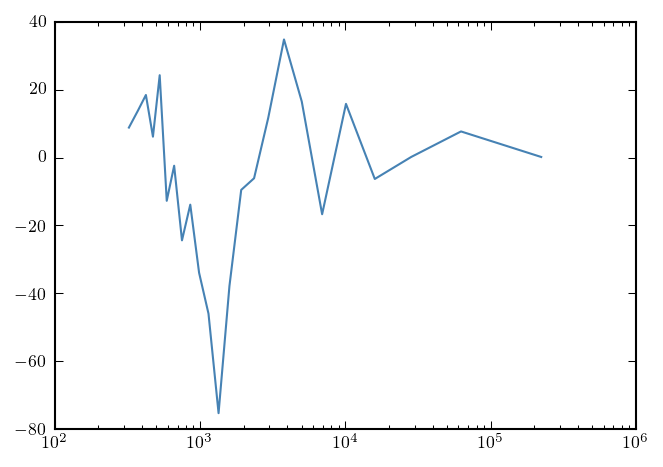

In [64]:
plt.plot(A.central_energies,2*(np.array(A.loglike)-np.array(A2.loglike)))
plt.xscale('log')


plt.plot(A.central_energies,2*(np.array(A.loglike)-np.array(A2.loglike)))
plt.xscale('log')










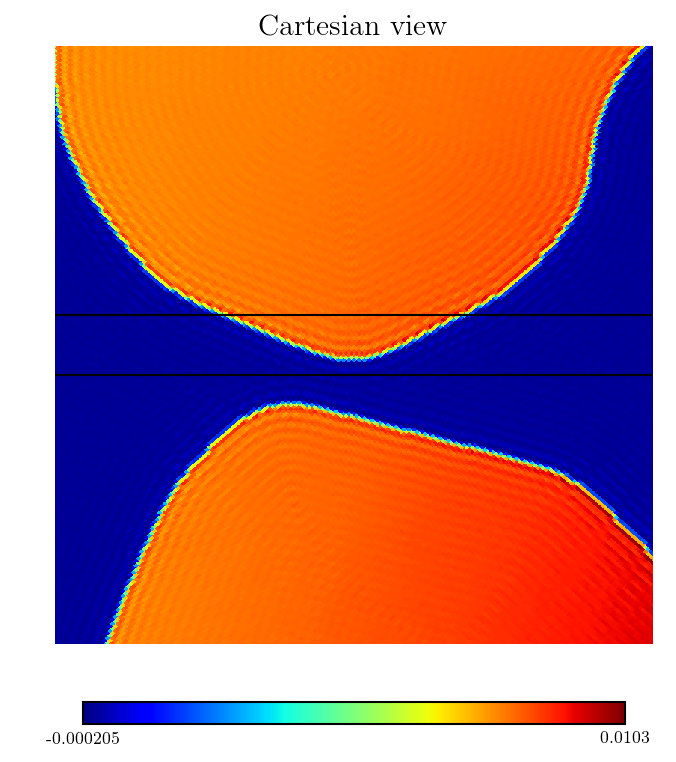

In [67]:
healpy.cartview(deepcopy(A.templateList['Bubbles'].healpixCube)[23], latra=[-20,20], lonra=[-20,20])
plt.hlines([-2,2],-40,40)



In [3]:
import h5py
import healpy
import sys
sys.path.append('../')
import Analysis
from scipy import ndimage




from matplotlib.colors import ListedColormap
import numpy as np
colombi1_cmap = ListedColormap(np.loadtxt("Planck_Parchment_RGB.txt")/255.)
colombi1_cmap.set_bad("gray") # color of missing pixels
#colombi1_cmap.set_under("white") # color of background, necessary if you want to use
# this colormap directly with hp.mollview(m, cmap=colombi1_cmap)
cmap = colombi1_cmap



A = Analysis.Analysis() 
mask = A.GenSquareMask(l_range=[-20,20], b_range=[-20,20], plane_mask=2)
psc_weights = A.CalculatePixelWeights(diffuse_model='../fermi_diffuse_'+A.tag+'.npy',psc_model='../PSC_3FGL_with_ext.npy',alpha_psc=5., f_psc=0.1)

def PlotResiduals(model, energy_range, text, grid):
    # Open the file and load the fit results of interest.
    h = h5py.File('../new/mod_s_%i_XCO_P8_stripped.hdf5'%model)
    residual = h['/fit_results/GC_no_dm/residual'][...]
    E = h['/fit_results/GC_no_dm'].attrs['energies']
    
    E_bin_1, E_bin_2 = np.argmin(np.abs(energy_range[0]-E)), np.argmin(np.abs(energy_range[1]-E))
    plt.figure(2)
    
    # TESTING 
#     print residual.shape
#     print residual[E_bin_1:E_bin_2].shape
#     print A.psc_weights[E_bin_1:E_bin_2].shape
    
    np.sum(residual[E_bin_1:E_bin_2]*A.psc_weights[E_bin_1:E_bin_2], axis=0)*mask
    #-----------------------------------
    
    m = healpy.cartview(np.sum(residual[E_bin_1:E_bin_2]*A.psc_weights[E_bin_1:E_bin_2], axis=0)*mask,latra=[-20,20], lonra=[-20,20],xsize=320, return_projected_map=True, hold=True, cbar=False)
    real_energies=(E[E_bin_1]/1e3,E[E_bin_2]/1e3) 
    plt.clf()
    plt.figure(1)
    multiplier = 1
    if energy_range[0] > 2e3: 
        multiplier = 2 
        grid.text(.08,.19, r'Counts $\times 2$', transform=grid.transAxes, fontsize=8,)
    im = grid.imshow(ndimage.gaussian_filter(m*multiplier,4), origin='lower', extent=[20,-20,-20,20], cmap=cmap, vmin=-10,vmax=10)
    #plt.imshow(ndimage.gaussian_filter(m,4), origin='lower', extent=[20,-20,-20,20], cmap='bwr', vmin=-3*np.std(m),vmax=3*np.std(m))
    
    grid.xaxis.set_ticks([-15,-10,-5,0,5,10,15])
    grid.yaxis.set_ticks([-15,-10,-5,0,5,10,15])
    grid.xaxis.set_ticklabels(["",-10,"",0,"",10,""])
    grid.yaxis.set_ticklabels(["",-10,"",0,"",10,""])
    grid.text(.08,.08,'%1.2f-%1.2f GeV'%(A.bin_edges[E_bin_1]/1e3,A.bin_edges[E_bin_2+1]/1e3), transform=grid.transAxes, fontsize=8)
    grid.text(.08,.82, text, transform=grid.transAxes, fontsize=8)
    #plt.colorbar(label='Residual Counts')
    return im 
    

from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure(1, figsize=(9.5,4.7))

grid = AxesGrid(fig, 121, # similar to subplot(142)
                        nrows_ncols = (3, 3),
                        axes_pad = 0,
                        share_all=True,
                        label_mode = "L",
                        cbar_location = "right",
                        cbar_mode=None,)
grid2 = AxesGrid(fig, 122, # similar to subplot(142)
                        nrows_ncols = (3, 3),
                        axes_pad = 0,
                        share_all=True,
                        label_mode = "L",
                        cbar_location = "right",
                        cbar_mode='single',)


for i_E, E_range in enumerate([[.3e3, .5e3],[1e3,2.5e3], [2.8e3,10e3]]):
    for i, model in enumerate([14,17,20]):
        im = PlotResiduals(model,energy_range=E_range, text=r'$f_{\rm H2}=%1.2f$'%((model-14)*0.05), grid=grid[i_E*3+ i])
        
    for i, model in enumerate([42,45,48]):
        im = PlotResiduals(model,energy_range=E_range, text=r'$f_{\rm H2}=%1.2f$'%((model-42)*0.05),grid=grid2[i_E*3+ i])
        cbar = grid2.cbar_axes[0].colorbar(im)
    #plt.show()
    
for cax in grid2.cbar_axes[1:]:
    cax.toggle_label(False)
    

for i in [6,7,8]:
    grid[i].set_xlabel('l [deg]')
    grid2[i].set_xlabel('l [deg]')
    
for i in [0,3,6]:
    grid[i].set_ylabel('b [deg]')
    grid2[i].yaxis.set_ticklabels([])
    

cbar.solids.set_edgecolor("face")
    
fig.subplots_adjust(left=0.00, wspace=-.15)
grid[1].text(.5, 1.05, r'PEB Gas Models', horizontalalignment='center', transform=grid[1].transAxes)
grid2[1].text(.5, 1.05, r'Galprop Gas Models', horizontalalignment='center', transform=grid2[1].transAxes)

grid2.cbar_axes[0].set_ylabel(r'Residual Counts') 

IOError: [Errno 2] No such file or directory: '../fermi_diffuse_P7REP_CLEAN_V15_calore.npy'

In [47]:
A = Analysis.Analysis(tag='P8R2_CLEAN_V6_calore', basepath='/data/GCE_sys/')
#############################################################
#  Need to calculate fermi bubbles area here.
# ##################################################################
A.AddFermiBubbleTemplate(template_file='./bubble_templates_diskcut30.0.fits', 
                         spec_file='./reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False, fixNorm=False)


2 3.5


3.5 5


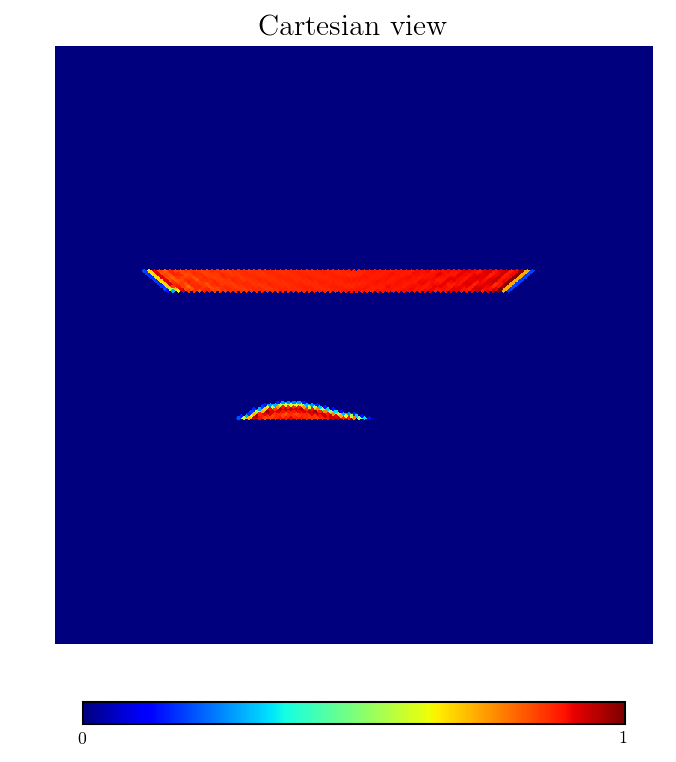

5 7


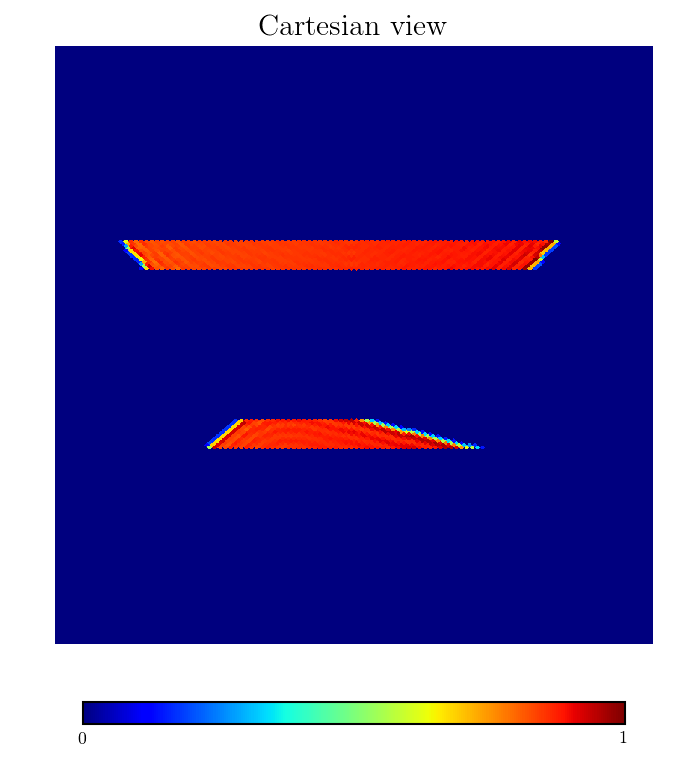

7 10


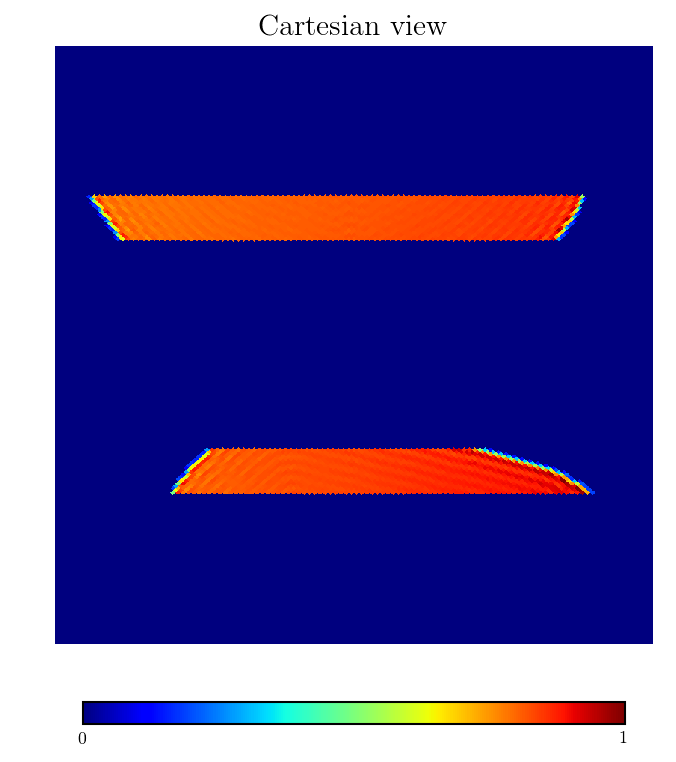

10 15


15 20


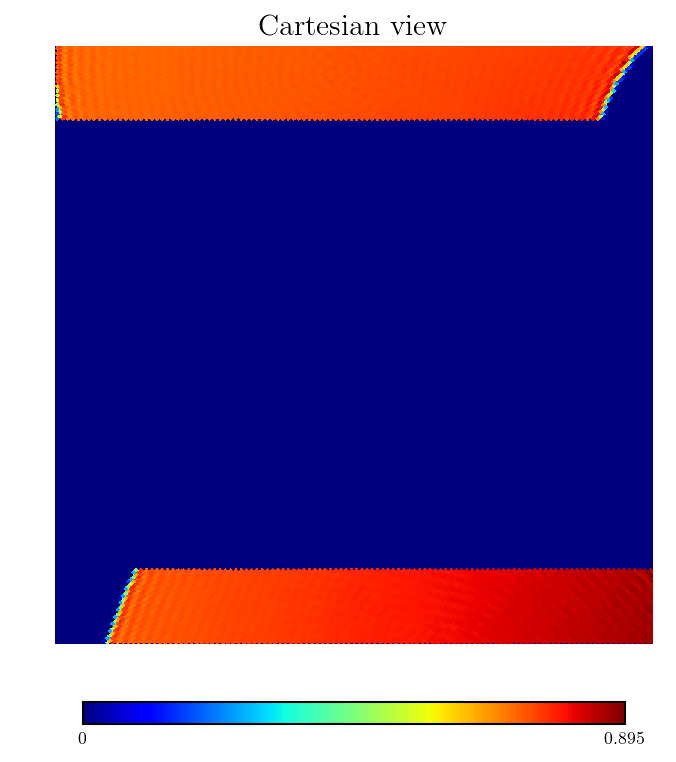

[46.584347826086955, 31.88809523809524, 17.061146496815287, 8.321217769493632, 4.222257250945775, 3.82384011420414]


In [53]:
boundaries = [2,3.5,5,7,10,15,20] 


mask_area_ratio = []

for i_b, bound in enumerate(boundaries[:-1]):
            
    print bound, boundaries[i_b+1]
    # Split ICS into rings
    #A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2)
    A.GenSquareMask(l_range=[-20,20],b_range=[bound,boundaries[i_b+1]])
    A.GenSquareMask(l_range=[-30,30],b_range=[-boundaries[i_b+1],-bound], merge=True)
    
    
    mask  = A.templateList['Bubbles'].healpixCube[20]*A.mask
    mask /= np.max(mask)
    mask[mask<.1]=0
    
    healpy.cartview(mask, latra=[-20,20], lonra=[-20,20])
    plt.show()
    mask_solid_angle = np.nonzero(mask)[0].shape[0]
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    mask_area_ratio.append(npix_roi/float(mask_solid_angle))
print mask_area_ratio

In [ ]:
boundaries = [2,3.5,5,7,10,15,20] 

mask_area_ratio = []

for i_b, bound in enumerate(boundaries[:-1]):
            
    print bound, boundaries[i_b+1]
    # Split ICS into rings
    A.GenSquareMask(l_range=[-30,30],b_range=[bound,boundaries[i_b+1]])
    A.GenSquareMask(l_range=[-30,30],b_range=[-boundaries[i_b+1],-bound], merge=True)
    #A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2, merge=True)
    
    mask  = A.templateList['Bubbles'].healpixCube[20]*A.mask
    #mask /= np.max(mask)
    #mask[mask<.1]=0
    
    healpy.cartview(mask, latra=[-20,20], lonra=[-20,20])
    plt.show()
    mask_solid_angle = np.nonzero(mask)[0].shape[0]
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    mask_area_ratio.append(npix_roi/float(mask_solid_angle))
print mask_area_ratio

In [52]:
# Restore back to normal mask
A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
              r_s=20.0, axesratio=1, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A.GenSquareMask(l_range=[-7.5,7.5], b_range=[-7.5,7.5], plane_mask=0.)
A.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]


A2.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=.4, 
              r_s=20.0, axesratio=2.3, offset=(0., 0.), spec_file=None,size=25)
    
print 'DM generated'
A2.GenSquareMask(l_range=[-7.5,7.5], b_range=[-7.5,7.5], plane_mask=0.)
A2.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]



A3.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
              r_s=20.0, axesratio=1, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A3.GenSquareMask(l_range=[-7.5,7.5], b_range=[-7.5,7.5], plane_mask=0.)
A3.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]



DM generated
Masking completed in 9.2072e-01 s
Write likelihood tempfile to  /tmp/tmpNMhCAR
Code generation completed in 3.4449e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -355500.313193 
 TOTAL NCALL = 156 
 NCALLS = 156 
 
 
 EDM = 4.01609561501e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -1.495243e+00 
 9.521022e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 7.962679e-01 
 8.053255e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 3.361514e-02 
 2.837366e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 1.816964e+00 
 4.053053e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 -8.789726e-02 
 3.497158e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -1.495e+00 & 9.521e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 7.963e-01 & 8.053e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 3.362e-02 & 2.837e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 1.817e+00 & 4.053e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & -8.790e-02 & 3.497e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.64e-02 s
Masking completed in 9.0251e-01 s
Write likelihood tempfile to  /tmp/tmpvD6X6z
Code generation completed in 4.2269e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -301097.132781 
 TOTAL NCALL = 147 
 NCALLS = 147 
 
 
 EDM = 0.00010195029732 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -1.958982e+00 
 1.237031e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 8.509501e-01 
 7.988484e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 -5.591859e-02 
 2.643278e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 1.806991e+00 
 4.058640e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 -4.284794e-01 
 3.282649e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -1.959e+00 & 1.237e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 8.510e-01 & 7.988e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & -5.592e-02 & 2.643e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 1.807e+00 & 4.059e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & -4.285e-01 & 3.283e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.40e-02 s
Masking completed in 8.9820e-01 s
Write likelihood tempfile to  /tmp/tmpsvJt3v
Code generation completed in 3.5229e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -256084.586755 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.0012546123012 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -1.907052e+00 
 1.475213e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.233184e-01 
 8.458657e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 2.158688e-01 
 2.403983e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 1.761499e+00 
 4.312903e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 -3.991280e-01 
 3.128704e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -1.907e+00 & 1.475e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.233e-01 & 8.459e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 2.159e-01 & 2.404e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 1.761e+00 & 4.313e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & -3.991e-01 & 3.129e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.18e-02 s
Masking completed in 9.0670e-01 s
Write likelihood tempfile to  /tmp/tmpYcxY6b
Code generation completed in 3.4699e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -213875.645402 
 TOTAL NCALL = 142 
 NCALLS = 142 
 
 
 EDM = 1.64157857128e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -1.827508e+00 
 1.488264e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 9.651671e-01 
 8.874182e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 4.818982e-01 
 2.185798e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 1.711549e+00 
 4.477116e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 1.456840e-02 
 2.970867e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -1.828e+00 & 1.488e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 9.652e-01 & 8.874e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 4.819e-01 & 2.186e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 1.712e+00 & 4.477e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 1.457e-02 & 2.971e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.29e-02 s
Masking completed in 9.0468e-01 s
Write likelihood tempfile to  /tmp/tmpQsP60h
Code generation completed in 2.5191e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -211447.005008 
 TOTAL NCALL = 142 
 NCALLS = 142 
 
 
 EDM = 1.22384948286e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -2.014164e+00 
 1.686514e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.941904e-01 
 8.863912e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 5.345275e-01 
 1.854036e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 1.700910e+00 
 4.455257e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 -2.879814e-01 
 2.818707e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -2.014e+00 & 1.687e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.942e-01 & 8.864e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 5.345e-01 & 1.854e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 1.701e+00 & 4.455e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & -2.880e-01 & 2.819e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.33e-02 s
Masking completed in 9.0717e-01 s
Write likelihood tempfile to  /tmp/tmpv5Ljln
Code generation completed in 3.5141e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -216031.656541 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.00731381810839 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -1.148482e+00 
 1.165726e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.041131e+00 
 9.079839e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 6.736112e-01 
 1.537520e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 1.681615e+00 
 4.513877e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 -2.468634e-01 
 2.669556e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -1.148e+00 & 1.166e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.041e+00 & 9.080e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 6.736e-01 & 1.538e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 1.682e+00 & 4.514e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & -2.469e-01 & 2.670e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.61e-02 s
Masking completed in 8.8666e-01 s
Write likelihood tempfile to  /tmp/tmpCXsCk9
Code generation completed in 5.0859e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -215602.183144 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 2.75233882211e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -1.094512e+00 
 1.360988e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.077871e+00 
 8.949262e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 7.917534e-01 
 1.276298e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 1.457517e+00 
 4.355669e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 -2.860763e-02 
 2.485572e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -1.095e+00 & 1.361e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.078e+00 & 8.949e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 7.918e-01 & 1.276e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 1.458e+00 & 4.356e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & -2.861e-02 & 2.486e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   7.31e-02 s
Masking completed in 9.2126e-01 s
Write likelihood tempfile to  /tmp/tmpW9VsSM
Code generation completed in 3.5629e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -207105.1298 
 TOTAL NCALL = 112 
 NCALLS = 112 
 
 
 EDM = 0.00267655538418 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -9.232534e-01 
 1.101269e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.119553e+00 
 9.311132e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 8.291528e-01 
 1.196717e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 1.514806e+00 
 4.545580e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 -1.087129e-02 
 2.405803e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -9.233e-01 & 1.101e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.120e+00 & 9.311e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 8.292e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 1.515e+00 & 4.546e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & -1.087e-02 & 2.406e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.65e-02 s
Masking completed in 8.7257e-01 s
Write likelihood tempfile to  /tmp/tmpLr2d5Q
Code generation completed in 3.2599e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -201584.40716 
 TOTAL NCALL = 125 
 NCALLS = 125 
 
 
 EDM = 0.000463996026184 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -5.671320e-01 
 1.119442e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.123689e+00 
 9.319068e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 8.611812e-01 
 1.159147e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 1.340807e+00 
 4.413328e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.004483e-01 
 2.362501e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -5.671e-01 & 1.119e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.124e+00 & 9.319e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 8.612e-01 & 1.159e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 1.341e+00 & 4.413e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.004e-01 & 2.363e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.92e-02 s
Masking completed in 8.8378e-01 s
Write likelihood tempfile to  /tmp/tmp6ykVbq
Code generation completed in 2.7399e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188020.077095 
 TOTAL NCALL = 125 
 NCALLS = 125 
 
 
 EDM = 0.000200704683481 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -5.429839e-01 
 1.051596e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.178684e+00 
 9.834928e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 8.891233e-01 
 1.138092e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 1.308794e+00 
 4.573223e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 2.829840e-01 
 2.374409e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -5.430e-01 & 1.052e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.179e+00 & 9.835e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 8.891e-01 & 1.138e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 1.309e+00 & 4.573e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 2.830e-01 & 2.374e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.91e-02 s
Masking completed in 8.6821e-01 s
Write likelihood tempfile to  /tmp/tmpafolj3
Code generation completed in 4.5812e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -185948.275816 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000659800921704 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 4.064767e-03 
 7.902393e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.210177e+00 
 1.006157e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 8.964849e-01 
 1.164613e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 1.116230e+00 
 4.478340e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 3.702198e-02 
 2.450650e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 4.065e-03 & 7.902e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.210e+00 & 1.006e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 8.965e-01 & 1.165e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 1.116e+00 & 4.478e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 3.702e-02 & 2.451e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.84e-02 s
Masking completed in 8.7119e-01 s
Write likelihood tempfile to  /tmp/tmpPrk0Dk
Code generation completed in 3.5381e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -161956.275652 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00119712820137 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.382278e-02 
 7.238666e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.234306e+00 
 1.079087e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 9.101079e-01 
 1.200638e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 1.080364e+00 
 4.652121e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 7.780515e-02 
 2.670472e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.382e-02 & 7.239e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.234e+00 & 1.079e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 9.101e-01 & 1.201e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 1.080e+00 & 4.652e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 7.781e-02 & 2.670e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.84e-02 s
Masking completed in 8.8998e-01 s
Write likelihood tempfile to  /tmp/tmp0yMHKw
Code generation completed in 3.4540e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -139060.478273 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00082372581753 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 2.228292e-01 
 7.348061e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.252358e+00 
 1.159488e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.247049e-01 
 1.271715e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 9.676348e-01 
 4.775017e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 3.300888e-02 
 2.595254e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 2.228e-01 & 7.348e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.252e+00 & 1.159e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.247e-01 & 1.272e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 9.676e-01 & 4.775e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 3.301e-02 & 2.595e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.87e-02 s
Masking completed in 8.8327e-01 s
Write likelihood tempfile to  /tmp/tmp7Ghfrk
Code generation completed in 3.5679e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -118662.538707 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00181526555444 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 2.997015e-01 
 6.326910e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.288197e+00 
 1.246786e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.365833e-01 
 1.321213e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 8.649763e-01 
 4.753009e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 2.460615e-01 
 2.452274e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 2.997e-01 & 6.327e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.288e+00 & 1.247e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.366e-01 & 1.321e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 8.650e-01 & 4.753e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 2.461e-01 & 2.452e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.83e-02 s
Masking completed in 8.7678e-01 s
Write likelihood tempfile to  /tmp/tmpLB8p0s
Code generation completed in 3.2930e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -98470.6835947 
 TOTAL NCALL = 228 
 NCALLS = 228 
 
 
 EDM = 0.000109975215769 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 3.652989e-01 
 6.367054e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.353300e+00 
 1.347504e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.674024e-01 
 1.167556e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.938559e-01 
 4.785989e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 4.819692e-01 
 2.250405e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 3.653e-01 & 6.367e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.353e+00 & 1.348e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.674e-01 & 1.168e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.939e-01 & 4.786e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 4.820e-01 & 2.250e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.16e-02 s
Masking completed in 8.7789e-01 s
Write likelihood tempfile to  /tmp/tmpuH3UuY
Code generation completed in 2.7492e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -74839.9193125 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 7.98224874636e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 3.579881e-01 
 5.360566e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.390228e+00 
 1.588898e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 9.624692e-01 
 1.110579e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 8.512656e-01 
 4.913933e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 5.049597e-01 
 2.050672e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 3.580e-01 & 5.361e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.390e+00 & 1.589e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 9.625e-01 & 1.111e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 8.513e-01 & 4.914e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 5.050e-01 & 2.051e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.85e-02 s
Masking completed in 8.4666e-01 s
Write likelihood tempfile to  /tmp/tmplwGKVQ
Code generation completed in 3.5911e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -52852.7187145 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000120210070957 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 5.004278e-01 
 4.943698e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.461228e+00 
 1.891085e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.651349e-01 
 1.287090e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.704295e-01 
 5.345846e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 4.810424e-01 
 2.370660e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 5.004e-01 & 4.944e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.461e+00 & 1.891e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.651e-01 & 1.287e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.704e-01 & 5.346e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 4.810e-01 & 2.371e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.85e-02 s
Masking completed in 8.8631e-01 s
Write likelihood tempfile to  /tmp/tmpDJHrJP
Code generation completed in 3.4890e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -31234.1746474 
 TOTAL NCALL = 111 
 NCALLS = 111 
 
 
 EDM = 4.0190836591e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 4.651215e-01 
 5.090426e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.478594e+00 
 2.259521e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.729760e-01 
 1.534202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 8.146064e-01 
 5.766886e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 8.185357e-01 
 2.330510e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 4.651e-01 & 5.090e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.479e+00 & 2.260e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.730e-01 & 1.534e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 8.146e-01 & 5.767e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 8.185e-01 & 2.331e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.62e-02 s
Masking completed in 8.8515e-01 s
Write likelihood tempfile to  /tmp/tmpSZ2xFA
Code generation completed in 4.1299e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -16438.4527292 
 TOTAL NCALL = 126 
 NCALLS = 126 
 
 
 EDM = 1.80564392388e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 5.011677e-01 
 5.982436e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.608009e+00 
 2.766876e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.549614e-01 
 1.560532e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 6.514735e-01 
 5.946545e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 5.400078e-01 
 1.787202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 5.012e-01 & 5.982e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.608e+00 & 2.767e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.550e-01 & 1.561e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 6.515e-01 & 5.947e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 5.400e-01 & 1.787e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.94e-02 s
Masking completed in 8.6559e-01 s
Write likelihood tempfile to  /tmp/tmpw9yvWz
Code generation completed in 3.5429e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -5697.38820509 
 TOTAL NCALL = 95 
 NCALLS = 95 
 
 
 EDM = 2.96641956076e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 3.941994e-01 
 5.078181e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.526111e+00 
 3.495392e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.627624e-01 
 1.361449e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 8.325215e-01 
 6.677838e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.495363e-01 
 1.439045e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 3.942e-01 & 5.078e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.526e+00 & 3.495e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.628e-01 & 1.361e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 8.325e-01 & 6.678e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.495e-01 & 1.439e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.28e-02 s
Masking completed in 8.8928e-01 s
Write likelihood tempfile to  /tmp/tmpJujZ6u
Code generation completed in 3.5181e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 389.30671009 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.000838113230302 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.389733e-01 
 8.380374e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.629426e+00 
 4.770584e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.837161e-01 
 1.299573e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.202291e-01 
 7.637435e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.731732e-01 
 1.323551e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.390e-01 & 8.380e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.629e+00 & 4.771e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.837e-01 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.202e-01 & 7.637e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.732e-01 & 1.324e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.56e-02 s
Masking completed in 8.7636e-01 s
Write likelihood tempfile to  /tmp/tmp6urYgH
Code generation completed in 3.5300e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2679.51065668 
 TOTAL NCALL = 110 
 NCALLS = 110 
 
 
 EDM = 0.000230016891084 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 1.163969e-01 
 6.595374e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.820591e+00 
 6.947211e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.947867e-01 
 1.220154e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 9.596960e-01 
 9.740685e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.222370e-01 
 1.208105e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 1.164e-01 & 6.595e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.821e+00 & 6.947e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.948e-01 & 1.220e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 9.597e-01 & 9.741e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.222e-01 & 1.208e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.61e-02 s
Masking completed in 8.8398e-01 s
Write likelihood tempfile to  /tmp/tmpqBJPVu
Code generation completed in 4.1692e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2841.22846449 
 TOTAL NCALL = 118 
 NCALLS = 118 
 
 
 EDM = 4.87445217561e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.300107e-01 
 9.217627e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.422296e+00 
 1.343320e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.849773e-01 
 1.256032e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 1.033832e+00 
 1.726035e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 9.241674e-01 
 1.054248e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.300e-01 & 9.218e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.422e+00 & 1.343e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.850e-01 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 1.034e+00 & 1.726e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 9.242e-01 & 1.054e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.79e-02 s
Masking completed in 8.7233e-01 s
Write likelihood tempfile to  /tmp/tmpwU6CLK
Code generation completed in 3.4459e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -0.880541
             PSC = +1.000000
    Pi0_Brems_23 = +3.843379
    Isotropic_23 = +0.976019
          ICS_23 = +2.107667
      Bubbles_23 = +1.152189

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -nan
             PSC = +1.000000
    Pi0_Brems_23 = -nan
    Isotropic_23 = -nan
          ICS_23 = -nan
      Bubbles_23 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = +nan
             PSC = +1.000000
    Pi0_Brems_23 = +nan
    Isotropic_23 = +nan
          ICS_23 = +nan
      Bubbles_23 = +nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
   

FCN = 1613.65966311 
 TOTAL NCALL = 169 
 NCALLS = 169 
 
 
 EDM = 0.00100539169698 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 -2.216819e-01 
 1.892411e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 4.713668e+00 
 3.805895e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.951787e-01 
 2.221433e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 8.465462e-01 
 4.508740e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.587668e-01 
 1.555255e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & -2.217e-01 & 1.892e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 4.714e+00 & 3.806e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.952e-01 & 2.221e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 8.465e-01 & 4.509e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.588e-01 & 1.555e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.85e-02 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -1.495243e+00 
 9.521072e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 7.962679e-01 
 8.052756e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 3.361514e-02 
 2.837365e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 1.816964e+00 
 4.052871e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 -8.789726e-02 
 3.496248e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -1.495e+00 & 9.521e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 7.963e-01 & 8.053e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 3.362e-02 & 2.837e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 1.817e+00 & 4.053e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & -8.790e-02 & 3.496e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 -0.05
 
 
 
 -0.36
 
 
 
 -0.10
 
 
 
 
 
 Pi0_Brems_0 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 0.32
 
 
 
 -0.64
 
 
 
 0.28
 
 
 
 
 
 Isotropic_0 
 
 
 -0.05
 
 
 
 0.32
 
 
 
 1.00
 
 
 
 -0.59
 
 
 
 -0.10
 
 
 
 
 
 ICS_0 
 
 
 -0.36
 
 
 
 -0.64
 
 
 
 -0.59
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 
 
 Bubbles_0 
 
 
 -0.10
 
 
 
 0.28
 
 
 
 -0.10
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{172,240,179} -0.10\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{189,216,167} 0.28\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{172,241,179} -0.10\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,217,167} -0.27\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -1.958982e+00 
 1.237034e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 8.509501e-01 
 7.987958e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 -5.591859e-02 
 2.643269e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 1.806991e+00 
 4.058409e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 -4.284794e-01 
 3.281697e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -1.959e+00 & 1.237e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 8.510e-01 & 7.988e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & -5.592e-02 & 2.643e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 1.807e+00 & 4.058e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & -4.285e-01 & 3.282e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 -0.04
 
 
 
 -0.47
 
 
 
 -0.08
 
 
 
 
 
 Pi0_Brems_1 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 0.28
 
 
 
 -0.56
 
 
 
 0.27
 
 
 
 
 
 Isotropic_1 
 
 
 -0.04
 
 
 
 0.28
 
 
 
 1.00
 
 
 
 -0.54
 
 
 
 -0.09
 
 
 
 
 
 ICS_1 
 
 
 -0.47
 
 
 
 -0.56
 
 
 
 -0.54
 
 
 
 1.00
 
 
 
 -0.28
 
 
 
 
 
 Bubbles_1 
 
 
 -0.08
 
 
 
 0.27
 
 
 
 -0.09
 
 
 
 -0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{171,242,180} -0.08\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{188,217,167} 0.27\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,216,167} -0.28\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{171,242,180} -0.08 & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{189,216,167} -0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -1.907052e+00 
 1.475184e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.233184e-01 
 8.458173e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 2.158688e-01 
 2.403966e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 1.761499e+00 
 4.312591e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 -3.991280e-01 
 3.127906e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -1.907e+00 & 1.475e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.233e-01 & 8.458e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 2.159e-01 & 2.404e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 1.761e+00 & 4.313e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & -3.991e-01 & 3.128e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 -0.03
 
 
 
 -0.57
 
 
 
 -0.07
 
 
 
 
 
 Pi0_Brems_2 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 0.24
 
 
 
 -0.51
 
 
 
 0.25
 
 
 
 
 
 Isotropic_2 
 
 
 -0.03
 
 
 
 0.24
 
 
 
 1.00
 
 
 
 -0.47
 
 
 
 -0.08
 
 
 
 
 
 ICS_2 
 
 
 -0.57
 
 
 
 -0.51
 
 
 
 -0.47
 
 
 
 1.00
 
 
 
 -0.28
 
 
 
 
 
 Bubbles_2 
 
 
 -0.07
 
 
 
 0.25
 
 
 
 -0.08
 
 
 
 -0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{215,177,147} -0.57 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{210,185,151} -0.51 & \cellcolor[RGB]{186,219,168} 0.25\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{206,189,153} -0.47 & \cellcolor[RGB]{170,243,181} -0.08\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{215,177,147} -0.57 & \cellcolor[RGB]{210,185,151} -0.51 & \cellcolor[RGB]{206,189,153} -0.47 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,167} -0.28\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{186,219,168} 0.25 & \cellcolor[RGB]{170,243,181} -0.08 & \cellcolor[RGB]{189,215,167} -0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -1.827508e+00 
 1.488251e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 9.651671e-01 
 8.873939e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 4.818982e-01 
 2.185794e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 1.711549e+00 
 4.476942e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 1.456840e-02 
 2.970456e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -1.828e+00 & 1.488e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 9.652e-01 & 8.874e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 4.819e-01 & 2.186e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 1.712e+00 & 4.477e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 1.457e-02 & 2.970e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 -0.02
 
 
 
 -0.62
 
 
 
 -0.05
 
 
 
 
 
 Pi0_Brems_3 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 0.20
 
 
 
 -0.47
 
 
 
 0.22
 
 
 
 
 
 Isotropic_3 
 
 
 -0.02
 
 
 
 0.20
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 -0.06
 
 
 
 
 
 ICS_3 
 
 
 -0.62
 
 
 
 -0.47
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 
 
 Bubbles_3 
 
 
 -0.05
 
 
 
 0.22
 
 
 
 -0.06
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{183,224,171} 0.22\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.27\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{187,218,168} -0.27 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -2.014164e+00 
 1.686514e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.941904e-01 
 8.863672e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 5.345275e-01 
 1.854035e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 1.700910e+00 
 4.455099e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 -2.879814e-01 
 2.818300e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -2.014e+00 & 1.687e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.942e-01 & 8.864e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 5.345e-01 & 1.854e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 1.701e+00 & 4.455e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & -2.880e-01 & 2.818e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.02
 
 
 
 -0.66
 
 
 
 -0.04
 
 
 
 
 
 Pi0_Brems_4 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.45
 
 
 
 0.22
 
 
 
 
 
 Isotropic_4 
 
 
 -0.02
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 -0.05
 
 
 
 
 
 ICS_4 
 
 
 -0.66
 
 
 
 -0.45
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 -0.28
 
 
 
 
 
 Bubbles_4 
 
 
 -0.04
 
 
 
 0.22
 
 
 
 -0.05
 
 
 
 -0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{224,164,141} -0.66 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{183,224,171} 0.22\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{224,164,141} -0.66 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,216,167} -0.28\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{188,216,167} -0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -1.148482e+00 
 1.165696e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.041131e+00 
 9.079393e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 6.736112e-01 
 1.537274e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 1.681615e+00 
 4.513342e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 -2.468634e-01 
 2.669147e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -1.148e+00 & 1.166e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.041e+00 & 9.079e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 6.736e-01 & 1.537e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 1.682e+00 & 4.513e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & -2.469e-01 & 2.669e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.01
 
 
 
 -0.68
 
 
 
 -0.03
 
 
 
 
 
 Pi0_Brems_5 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.44
 
 
 
 0.21
 
 
 
 
 
 Isotropic_5 
 
 
 -0.01
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 -0.05
 
 
 
 
 
 ICS_5 
 
 
 -0.68
 
 
 
 -0.44
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 -0.29
 
 
 
 
 
 Bubbles_5 
 
 
 -0.03
 
 
 
 0.21
 
 
 
 -0.05
 
 
 
 -0.29
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{182,225,171} 0.21\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -1.094512e+00 
 1.360975e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.077871e+00 
 8.948986e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 7.917534e-01 
 1.276193e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 1.457517e+00 
 4.355351e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 -2.860763e-02 
 2.485257e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -1.095e+00 & 1.361e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.078e+00 & 8.949e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 7.918e-01 & 1.276e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 1.458e+00 & 4.355e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & -2.861e-02 & 2.485e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.00
 
 
 
 -0.70
 
 
 
 -0.01
 
 
 
 
 
 Pi0_Brems_6 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.44
 
 
 
 0.20
 
 
 
 
 
 Isotropic_6 
 
 
 -0.00
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 -0.04
 
 
 
 
 
 ICS_6 
 
 
 -0.70
 
 
 
 -0.44
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 -0.29
 
 
 
 
 
 Bubbles_6 
 
 
 -0.01
 
 
 
 0.20
 
 
 
 -0.04
 
 
 
 -0.29
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{181,227,172} 0.20\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -9.232534e-01 
 1.101286e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.119553e+00 
 9.310958e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 8.291528e-01 
 1.196659e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 1.514806e+00 
 4.545352e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 -1.087129e-02 
 2.405488e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -9.233e-01 & 1.101e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.120e+00 & 9.311e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 8.292e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 1.515e+00 & 4.545e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & -1.087e-02 & 2.405e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.00
 
 
 
 -0.71
 
 
 
 -0.01
 
 
 
 
 
 Pi0_Brems_7 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.44
 
 
 
 0.19
 
 
 
 
 
 Isotropic_7 
 
 
 -0.00
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.24
 
 
 
 -0.04
 
 
 
 
 
 ICS_7 
 
 
 -0.71
 
 
 
 -0.44
 
 
 
 -0.24
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 
 
 Bubbles_7 
 
 
 -0.01
 
 
 
 0.19
 
 
 
 -0.04
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{181,228,173} 0.19\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{166,249,183} -0.04\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} -0.30\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -5.671320e-01 
 1.119453e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.123689e+00 
 9.318871e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 8.611812e-01 
 1.159108e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 1.340807e+00 
 4.413120e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.004483e-01 
 2.362196e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -5.671e-01 & 1.119e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.124e+00 & 9.319e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 8.612e-01 & 1.159e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 1.341e+00 & 4.413e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.004e-01 & 2.362e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 0.00
 
 
 
 -0.71
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_8 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.44
 
 
 
 0.19
 
 
 
 
 
 Isotropic_8 
 
 
 0.00
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 -0.04
 
 
 
 
 
 ICS_8 
 
 
 -0.71
 
 
 
 -0.44
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 
 
 Bubbles_8 
 
 
 0.00
 
 
 
 0.19
 
 
 
 -0.04
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{180,229,173} 0.19\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} -0.23 & \cellcolor[RGB]{166,249,184} -0.04\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{184,223,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,165} -0.31\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{180,229,173} 0.19 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{192,211,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -5.429839e-01 
 1.051608e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.178684e+00 
 9.834771e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 8.891233e-01 
 1.138067e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 1.308794e+00 
 4.573063e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 2.829840e-01 
 2.374151e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -5.430e-01 & 1.052e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.179e+00 & 9.835e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 8.891e-01 & 1.138e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 1.309e+00 & 4.573e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 2.830e-01 & 2.374e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 0.00
 
 
 
 -0.71
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_9 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.44
 
 
 
 0.18
 
 
 
 
 
 Isotropic_9 
 
 
 0.00
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 -0.03
 
 
 
 
 
 ICS_9 
 
 
 -0.71
 
 
 
 -0.44
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 
 
 Bubbles_9 
 
 
 0.01
 
 
 
 0.18
 
 
 
 -0.03
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{179,230,174} 0.18\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,212,165} -0.31\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 4.064767e-03 
 7.902622e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.210177e+00 
 1.006136e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 8.964849e-01 
 1.164594e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 1.116230e+00 
 4.478125e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 3.702198e-02 
 2.450218e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 4.065e-03 & 7.903e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.210e+00 & 1.006e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 8.965e-01 & 1.165e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 1.116e+00 & 4.478e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 3.702e-02 & 2.450e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 0.00
 
 
 
 -0.69
 
 
 
 0.02
 
 
 
 
 
 Pi0_Brems_10 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.46
 
 
 
 0.19
 
 
 
 
 
 Isotropic_10 
 
 
 0.00
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.20
 
 
 
 -0.03
 
 
 
 
 
 ICS_10 
 
 
 -0.69
 
 
 
 -0.46
 
 
 
 -0.20
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 
 
 Bubbles_10 
 
 
 0.02
 
 
 
 0.19
 
 
 
 -0.03
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{165,252,185} 0.02\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{180,228,173} 0.19\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,172} -0.20 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{181,227,172} -0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.382278e-02 
 7.238934e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.234306e+00 
 1.079055e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 9.101079e-01 
 1.200625e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 1.080364e+00 
 4.651765e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 7.780515e-02 
 2.669819e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.382e-02 & 7.239e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.234e+00 & 1.079e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 9.101e-01 & 1.201e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 1.080e+00 & 4.652e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 7.781e-02 & 2.670e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 0.01
 
 
 
 -0.68
 
 
 
 0.03
 
 
 
 
 
 Pi0_Brems_11 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.47
 
 
 
 0.20
 
 
 
 
 
 Isotropic_11 
 
 
 0.01
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 -0.03
 
 
 
 
 
 ICS_11 
 
 
 -0.68
 
 
 
 -0.47
 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 
 
 Bubbles_11 
 
 
 0.03
 
 
 
 0.20
 
 
 
 -0.03
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{181,227,172} 0.20\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,201,159} -0.39\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 2.228292e-01 
 7.348296e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.252358e+00 
 1.159444e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.247049e-01 
 1.271704e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 9.676348e-01 
 4.774467e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 3.300888e-02 
 2.594472e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 2.228e-01 & 7.348e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.252e+00 & 1.159e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.247e-01 & 1.272e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 9.676e-01 & 4.774e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 3.301e-02 & 2.594e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 0.01
 
 
 
 -0.66
 
 
 
 0.03
 
 
 
 
 
 Pi0_Brems_12 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.49
 
 
 
 0.21
 
 
 
 
 
 Isotropic_12 
 
 
 0.01
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 -0.04
 
 
 
 
 
 ICS_12 
 
 
 -0.66
 
 
 
 -0.49
 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 
 
 Bubbles_12 
 
 
 0.03
 
 
 
 0.21
 
 
 
 -0.04
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{166,249,184} 0.03\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{182,226,172} 0.21\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{166,249,184} -0.04\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,198,158} -0.41\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{182,226,172} 0.21 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 2.997015e-01 
 6.327007e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.288197e+00 
 1.246745e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.365833e-01 
 1.321203e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 8.649763e-01 
 4.752449e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 2.460615e-01 
 2.451665e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 2.997e-01 & 6.327e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.288e+00 & 1.247e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.366e-01 & 1.321e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 8.650e-01 & 4.752e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 2.461e-01 & 2.452e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 0.01
 
 
 
 -0.64
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_13 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.50
 
 
 
 0.19
 
 
 
 
 
 Isotropic_13 
 
 
 0.01
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 -0.03
 
 
 
 
 
 ICS_13 
 
 
 -0.64
 
 
 
 -0.50
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 
 
 Bubbles_13 
 
 
 0.04
 
 
 
 0.19
 
 
 
 -0.03
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{181,227,173} 0.19\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,198,158} -0.41\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{181,227,173} 0.19 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 3.652989e-01 
 6.317752e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.353300e+00 
 1.381406e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.674024e-01 
 1.166468e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.938559e-01 
 4.745036e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 4.819692e-01 
 2.212349e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 3.653e-01 & 6.318e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.353e+00 & 1.381e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.674e-01 & 1.166e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.939e-01 & 4.745e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 4.820e-01 & 2.212e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 0.01
 
 
 
 -0.61
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_14 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.51
 
 
 
 0.19
 
 
 
 
 
 Isotropic_14 
 
 
 0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.03
 
 
 
 
 
 ICS_14 
 
 
 -0.61
 
 
 
 -0.51
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 -0.42
 
 
 
 
 
 Bubbles_14 
 
 
 0.04
 
 
 
 0.19
 
 
 
 -0.03
 
 
 
 -0.42
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{181,228,173} 0.19\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{165,250,184} -0.03\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} -0.42\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 3.579881e-01 
 5.360573e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.390228e+00 
 1.588867e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 9.624692e-01 
 1.110577e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 8.512656e-01 
 4.913516e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 5.049597e-01 
 2.050376e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 3.580e-01 & 5.361e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.390e+00 & 1.589e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 9.625e-01 & 1.111e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 8.513e-01 & 4.914e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 5.050e-01 & 2.050e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 0.01
 
 
 
 -0.58
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_15 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.54
 
 
 
 0.17
 
 
 
 
 
 Isotropic_15 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.02
 
 
 
 
 
 ICS_15 
 
 
 -0.58
 
 
 
 -0.54
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 
 
 Bubbles_15 
 
 
 0.04
 
 
 
 0.17
 
 
 
 -0.02
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{179,230,174} 0.17\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,198,158} -0.41\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 5.004278e-01 
 4.943713e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.461228e+00 
 1.891045e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.651349e-01 
 1.287088e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.704295e-01 
 5.345339e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 4.810424e-01 
 2.370265e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 5.004e-01 & 4.944e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.461e+00 & 1.891e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.651e-01 & 1.287e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.704e-01 & 5.345e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 4.810e-01 & 2.370e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 0.01
 
 
 
 -0.55
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_16 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.56
 
 
 
 0.18
 
 
 
 
 
 Isotropic_16 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.02
 
 
 
 
 
 ICS_16 
 
 
 -0.55
 
 
 
 -0.56
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 -0.43
 
 
 
 
 
 Bubbles_16 
 
 
 0.04
 
 
 
 0.18
 
 
 
 -0.02
 
 
 
 -0.43
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{180,229,173} 0.18\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} -0.43\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 4.651215e-01 
 5.085817e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.478594e+00 
 2.256396e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.729760e-01 
 1.534065e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 8.146064e-01 
 5.733158e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 8.185357e-01 
 2.326688e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 4.651e-01 & 5.086e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.479e+00 & 2.256e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.730e-01 & 1.534e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 8.146e-01 & 5.733e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 8.185e-01 & 2.327e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 0.01
 
 
 
 -0.52
 
 
 
 0.05
 
 
 
 
 
 Pi0_Brems_17 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.59
 
 
 
 0.18
 
 
 
 
 
 Isotropic_17 
 
 
 0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 -0.03
 
 
 
 
 
 ICS_17 
 
 
 -0.52
 
 
 
 -0.59
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 -0.43
 
 
 
 
 
 Bubbles_17 
 
 
 0.05
 
 
 
 0.18
 
 
 
 -0.03
 
 
 
 -0.43
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{210,183,150} -0.52 & \cellcolor[RGB]{167,247,183} 0.05\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{217,173,145} -0.59 & \cellcolor[RGB]{180,229,174} 0.18\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,232,175} -0.16 & \cellcolor[RGB]{165,251,184} -0.03\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{210,183,150} -0.52 & \cellcolor[RGB]{217,173,145} -0.59 & \cellcolor[RGB]{177,232,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} -0.43\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{180,229,174} 0.18 & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 5.011677e-01 
 5.982450e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.608009e+00 
 2.766861e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.549614e-01 
 1.560530e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 6.514735e-01 
 5.946357e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 5.400078e-01 
 1.787105e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 5.012e-01 & 5.982e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.608e+00 & 2.767e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.550e-01 & 1.561e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 6.515e-01 & 5.946e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 5.400e-01 & 1.787e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 0.01
 
 
 
 -0.48
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_18 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.61
 
 
 
 0.14
 
 
 
 
 
 Isotropic_18 
 
 
 0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 -0.02
 
 
 
 
 
 ICS_18 
 
 
 -0.48
 
 
 
 -0.61
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 -0.38
 
 
 
 
 
 Bubbles_18 
 
 
 0.04
 
 
 
 0.14
 
 
 
 -0.02
 
 
 
 -0.38
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,177} -0.14 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{176,235,177} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{176,234,176} 0.14\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{165,251,185} -0.02\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{198,202,160} -0.38\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 3.941994e-01 
 5.068029e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.526111e+00 
 3.488881e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.627624e-01 
 1.361476e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 8.325215e-01 
 6.660859e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.495363e-01 
 1.438824e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 3.942e-01 & 5.068e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.526e+00 & 3.489e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.628e-01 & 1.361e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 8.325e-01 & 6.661e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.495e-01 & 1.439e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 -0.13
 
 
 
 0.01
 
 
 
 -0.46
 
 
 
 0.03
 
 
 
 
 
 Pi0_Brems_19 
 
 
 -0.13
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.63
 
 
 
 0.13
 
 
 
 
 
 Isotropic_19 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.02
 
 
 
 
 
 ICS_19 
 
 
 -0.46
 
 
 
 -0.63
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 
 
 Bubbles_19 
 
 
 0.03
 
 
 
 0.13
 
 
 
 -0.02
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{166,249,184} 0.03\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{165,252,185} -0.02\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,208,163} -0.33\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{194,208,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.389733e-01 
 8.380363e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.629426e+00 
 4.770579e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.837161e-01 
 1.299573e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.202291e-01 
 7.637412e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.731732e-01 
 1.323548e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.390e-01 & 8.380e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.629e+00 & 4.771e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.837e-01 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.202e-01 & 7.637e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.732e-01 & 1.324e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 0.01
 
 
 
 -0.38
 
 
 
 0.02
 
 
 
 
 
 Pi0_Brems_20 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.66
 
 
 
 0.11
 
 
 
 
 
 Isotropic_20 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.01
 
 
 
 
 
 ICS_20 
 
 
 -0.38
 
 
 
 -0.66
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 
 
 Bubbles_20 
 
 
 0.02
 
 
 
 0.11
 
 
 
 -0.01
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{165,251,185} 0.02\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{174,238,178} 0.11\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,212,165} -0.30\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{174,238,178} 0.11 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{191,212,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 1.163969e-01 
 6.595334e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.820591e+00 
 6.947200e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.947867e-01 
 1.220154e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 9.596960e-01 
 9.740639e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.222370e-01 
 1.208101e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 1.164e-01 & 6.595e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.821e+00 & 6.947e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.948e-01 & 1.220e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 9.597e-01 & 9.741e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.222e-01 & 1.208e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 0.01
 
 
 
 -0.36
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_21 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.67
 
 
 
 0.09
 
 
 
 
 
 Isotropic_21 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.10
 
 
 
 -0.01
 
 
 
 
 
 ICS_21 
 
 
 -0.36
 
 
 
 -0.67
 
 
 
 -0.10
 
 
 
 1.00
 
 
 
 -0.24
 
 
 
 
 
 Bubbles_21 
 
 
 0.01
 
 
 
 0.09
 
 
 
 -0.01
 
 
 
 -0.24
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,170} -0.24\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{185,221,170} -0.24 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.300107e-01 
 9.217593e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.422296e+00 
 1.343330e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.849773e-01 
 1.256032e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 1.033832e+00 
 1.726048e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 9.241674e-01 
 1.054247e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.300e-01 & 9.218e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.422e+00 & 1.343e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.850e-01 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 1.034e+00 & 1.726e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 9.242e-01 & 1.054e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 -0.13
 
 
 
 0.01
 
 
 
 -0.39
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_22 
 
 
 -0.13
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.70
 
 
 
 0.06
 
 
 
 
 
 Isotropic_22 
 
 
 0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.07
 
 
 
 -0.00
 
 
 
 
 
 ICS_22 
 
 
 -0.39
 
 
 
 -0.70
 
 
 
 -0.07
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 
 
 Bubbles_22 
 
 
 0.01
 
 
 
 0.06
 
 
 
 -0.00
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{169,245,182} 0.06\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,244,181} -0.07 & \cellcolor[RGB]{163,253,186} -0.00\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{169,244,181} -0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,175} -0.17\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{178,231,175} -0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 -2.216819e-01 
 1.892482e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 4.713668e+00 
 3.805718e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.951787e-01 
 2.221433e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 8.465462e-01 
 4.508534e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.587668e-01 
 1.555254e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & -2.217e-01 & 1.892e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 4.714e+00 & 3.806e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.952e-01 & 2.221e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 8.465e-01 & 4.509e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.588e-01 & 1.555e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 -0.22
 
 
 
 0.00
 
 
 
 -0.30
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_23 
 
 
 -0.22
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.71
 
 
 
 0.04
 
 
 
 
 
 Isotropic_23 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.05
 
 
 
 -0.00
 
 
 
 
 
 ICS_23 
 
 
 -0.30
 
 
 
 -0.71
 
 
 
 -0.05
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 
 
 Bubbles_23 
 
 
 0.01
 
 
 
 0.04
 
 
 
 -0.00
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{190,213,165} -0.30 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{190,213,165} -0.30 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.12\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 8.8277e-01 s
Write likelihood tempfile to  /tmp/tmpdJ01YV
Code generation completed in 4.9760e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -355467.440135 
 TOTAL NCALL = 133 
 NCALLS = 133 
 
 
 EDM = 7.34664229101e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 2.508006e+00 
 2.396830e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 1.010358e+00 
 1.376932e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.510158e+00 
 2.919954e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 1.502968e-01 
 4.762366e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 3.863659e-01 
 3.622333e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 2.508e+00 & 2.397e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.010e+00 & 1.377e-02 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.510e+00 & 2.920e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 1.503e-01 & 4.762e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 3.864e-01 & 3.622e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   7.81e-02 s
Masking completed in 9.3630e-01 s
Write likelihood tempfile to  /tmp/tmptB7q5p
Code generation completed in 3.5679e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -301110.102896 
 TOTAL NCALL = 133 
 NCALLS = 133 
 
 
 EDM = 0.000109564032594 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.904402e+00 
 2.746604e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.025697e+00 
 1.406465e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.383917e+00 
 2.682795e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 2.819925e-01 
 4.997933e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 3.261088e-01 
 3.396833e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.904e+00 & 2.747e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.026e+00 & 1.406e-02 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.384e+00 & 2.683e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 2.820e-01 & 4.998e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 3.261e-01 & 3.397e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.07e-02 s
Masking completed in 8.9304e-01 s
Write likelihood tempfile to  /tmp/tmpIAfjg4
Code generation completed in 2.7850e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -256143.649807 
 TOTAL NCALL = 140 
 NCALLS = 140 
 
 
 EDM = 7.51980600144e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.863277e+00 
 2.971669e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.094724e+00 
 1.499980e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.240868e+00 
 2.429743e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 2.863710e-01 
 5.432057e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 3.328265e-01 
 3.236541e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.863e+00 & 2.972e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.095e+00 & 1.500e-02 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.241e+00 & 2.430e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 2.864e-01 & 5.432e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 3.328e-01 & 3.237e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.23e-02 s
Masking completed in 8.9294e-01 s
Write likelihood tempfile to  /tmp/tmpB7rn4E
Code generation completed in 3.5021e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -213943.777488 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 3.73173122614e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 1.950797e+00 
 2.854101e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.148470e+00 
 1.578503e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.179300e+00 
 2.203874e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 2.029978e-01 
 5.779797e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 5.623843e-01 
 3.054431e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 1.951e+00 & 2.854e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.148e+00 & 1.579e-02 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.179e+00 & 2.204e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 2.030e-01 & 5.780e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 5.624e-01 & 3.054e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.15e-02 s
Masking completed in 8.9733e-01 s
Write likelihood tempfile to  /tmp/tmp1tO4dV
Code generation completed in 3.3510e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -211549.802378 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 6.89643527113e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 1.631112e+00 
 3.128897e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.161244e+00 
 1.558652e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.118027e+00 
 1.865133e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 2.811017e-01 
 5.750315e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 3.995021e-01 
 2.904067e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 1.631e+00 & 3.129e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.161e+00 & 1.559e-02 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.118e+00 & 1.865e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 2.811e-01 & 5.750e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 3.995e-01 & 2.904e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.12e-02 s
Masking completed in 9.0501e-01 s
Write likelihood tempfile to  /tmp/tmpDor0BW
Code generation completed in 3.3879e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -216187.317852 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.000114826211231 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 1.137751e+00 
 2.118568e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.210476e+00 
 1.561406e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.073357e+00 
 1.544257e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 2.955713e-01 
 5.769666e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 4.209324e-01 
 2.757868e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 1.138e+00 & 2.119e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.210e+00 & 1.561e-02 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.073e+00 & 1.544e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 2.956e-01 & 5.770e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 4.209e-01 & 2.758e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.10e-02 s
Masking completed in 8.8185e-01 s
Write likelihood tempfile to  /tmp/tmpbeqXlw
Code generation completed in 3.4580e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -215796.174542 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 2.60995580774e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.185064e+00 
 2.434962e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.242628e+00 
 1.508030e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.043587e+00 
 1.280398e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 2.236010e-01 
 5.533413e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 5.543939e-01 
 2.566493e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.185e+00 & 2.435e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.243e+00 & 1.508e-02 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.044e+00 & 1.280e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 2.236e-01 & 5.533e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 5.544e-01 & 2.566e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.08e-02 s
Masking completed in 8.9799e-01 s
Write likelihood tempfile to  /tmp/tmpCjB9yn
Code generation completed in 2.6200e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -207233.314384 
 TOTAL NCALL = 144 
 NCALLS = 144 
 
 
 EDM = 1.90694763641e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.265338e+00 
 1.964187e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.309181e+00 
 1.544487e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.032712e+00 
 1.199849e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 1.299432e-01 
 5.717606e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 4.648260e-01 
 2.487909e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.265e+00 & 1.964e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.309e+00 & 1.544e-02 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.033e+00 & 1.200e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 1.299e-01 & 5.718e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 4.648e-01 & 2.488e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.30e-02 s
Masking completed in 8.8314e-01 s
Write likelihood tempfile to  /tmp/tmprviMiE
Code generation completed in 4.0519e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -201740.51177 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 3.60910730954e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 9.517517e-01 
 2.007971e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.284649e+00 
 1.509943e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.025978e+00 
 1.161776e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 2.147254e-01 
 5.498281e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 5.897797e-01 
 2.447735e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 9.518e-01 & 2.008e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.285e+00 & 1.510e-02 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.026e+00 & 1.162e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 2.147e-01 & 5.498e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 5.898e-01 & 2.448e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.19e-02 s
Masking completed in 8.8702e-01 s
Write likelihood tempfile to  /tmp/tmpm2KFpu
Code generation completed in 3.6430e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188138.385025 
 TOTAL NCALL = 141 
 NCALLS = 141 
 
 
 EDM = 1.9611990483e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.086877e+00 
 1.878174e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.361925e+00 
 1.571132e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.023311e+00 
 1.140316e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 9.937840e-02 
 5.672569e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 6.822641e-01 
 2.452216e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.087e+00 & 1.878e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.362e+00 & 1.571e-02 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.023e+00 & 1.140e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 9.938e-02 & 5.673e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 6.823e-01 & 2.452e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.23e-02 s
Masking completed in 9.0437e-01 s
Write likelihood tempfile to  /tmp/tmpi6lwav
Code generation completed in 3.5758e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -186097.558078 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 0.000294667996173 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 6.414977e-01 
 1.472490e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.369514e+00 
 1.547320e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 9.996900e-01 
 1.166488e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 1.919704e-01 
 5.399132e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 4.454349e-01 
 2.555058e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 6.415e-01 & 1.472e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.370e+00 & 1.547e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 9.997e-01 & 1.166e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 1.920e-01 & 5.399e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 4.454e-01 & 2.555e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.21e-02 s
Masking completed in 8.9610e-01 s
Write likelihood tempfile to  /tmp/tmpyEMD_Z
Code generation completed in 4.3561e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -162028.496188 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 0.000490542100593 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.408097e-01 
 1.399642e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.388987e+00 
 1.619485e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.003384e+00 
 1.202268e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 2.022066e-01 
 5.500663e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 5.489991e-01 
 2.805201e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.408e-01 & 1.400e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.389e+00 & 1.619e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.003e+00 & 1.202e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 2.022e-01 & 5.501e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 5.490e-01 & 2.805e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.18e-02 s
Masking completed in 9.0011e-01 s
Write likelihood tempfile to  /tmp/tmpNtE4Y0
Code generation completed in 1.2867e-02 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -139181.851934 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 0.000309031186797 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 6.576076e-01 
 1.455843e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.422887e+00 
 1.700496e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.975066e-01 
 1.273278e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 1.353048e-01 
 5.513719e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 3.668968e-01 
 2.741420e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 6.576e-01 & 1.456e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.423e+00 & 1.700e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.975e-01 & 1.273e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 1.353e-01 & 5.514e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 3.669e-01 & 2.741e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.20e-02 s
Masking completed in 8.8491e-01 s
Write likelihood tempfile to  /tmp/tmpDG9O2L
Code generation completed in 2.7330e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -118746.313714 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 0.000180383946942 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 4.981366e-01 
 1.299954e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.449053e+00 
 1.791822e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.930297e-01 
 1.322669e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 1.601033e-01 
 5.450373e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 4.842318e-01 
 2.579379e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 4.981e-01 & 1.300e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.449e+00 & 1.792e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.930e-01 & 1.323e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 1.601e-01 & 5.450e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 4.842e-01 & 2.579e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.19e-02 s
Masking completed in 8.8316e-01 s
Write likelihood tempfile to  /tmp/tmp570Ewj
Code generation completed in 3.6578e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -98495.9052738 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00378933325178 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 4.490863e-01 
 1.376575e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.507743e+00 
 1.942357e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.984311e-01 
 1.167417e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 1.792889e-01 
 5.412269e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 6.565256e-01 
 2.327246e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 4.491e-01 & 1.377e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.508e+00 & 1.942e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.984e-01 & 1.167e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 1.793e-01 & 5.412e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 6.565e-01 & 2.327e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.88e-02 s
Masking completed in 9.0554e-01 s
Write likelihood tempfile to  /tmp/tmpeW1LqV
Code generation completed in 1.6470e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -74852.2470859 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.000634611235893 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 2.499656e-01 
 1.233948e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.536555e+00 
 2.181475e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.003061e+00 
 1.111351e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 3.060648e-01 
 5.528941e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 7.550613e-01 
 2.137064e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 2.500e-01 & 1.234e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.537e+00 & 2.181e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.003e+00 & 1.111e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 3.061e-01 & 5.529e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 7.551e-01 & 2.137e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.87e-02 s
Masking completed in 8.9936e-01 s
Write likelihood tempfile to  /tmp/tmphpcCpE
Code generation completed in 2.4240e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -52862.5466309 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 7.57678377817e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 2.199447e-01 
 1.197526e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.608848e+00 
 2.506729e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.905517e-01 
 1.288037e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 3.676861e-01 
 5.665139e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 6.481232e-01 
 2.483998e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 2.199e-01 & 1.198e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.609e+00 & 2.507e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.906e-01 & 1.288e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 3.677e-01 & 5.665e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 6.481e-01 & 2.484e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.88e-02 s
Masking completed in 8.9588e-01 s
Write likelihood tempfile to  /tmp/tmpH4e_Vh
Code generation completed in 3.5381e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -31245.5337532 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000153593001316 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.850814e-01 
 1.341432e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.645255e+00 
 2.884351e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.938719e-01 
 1.535497e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 3.399681e-01 
 5.708617e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 8.986960e-01 
 2.433516e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.851e-01 & 1.341e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.645e+00 & 2.884e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.939e-01 & 1.535e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 3.400e-01 & 5.709e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 8.987e-01 & 2.434e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.86e-02 s
Masking completed in 9.0101e-01 s
Write likelihood tempfile to  /tmp/tmp4x5EVj
Code generation completed in 2.4981e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -16438.891507 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00100485164911 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 -4.090520e-02 
 1.663989e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.743190e+00 
 3.438514e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.853297e-01 
 1.562068e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 3.917316e-01 
 5.782500e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 6.599595e-01 
 1.849094e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & -4.091e-02 & 1.664e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.743e+00 & 3.439e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.853e-01 & 1.562e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 3.917e-01 & 5.782e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 6.600e-01 & 1.849e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.89e-02 s
Masking completed in 9.0247e-01 s
Write likelihood tempfile to  /tmp/tmpipBHQL
Code generation completed in 3.5939e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -5710.68389191 
 TOTAL NCALL = 119 
 NCALLS = 119 
 
 
 EDM = 0.000237389911559 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 1.858926e-01 
 1.492182e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.686090e+00 
 4.256706e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.951413e-01 
 1.362719e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 4.625476e-01 
 6.227340e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 8.368368e-01 
 1.475185e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 1.859e-01 & 1.492e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.686e+00 & 4.257e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.951e-01 & 1.363e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 4.625e-01 & 6.227e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 8.368e-01 & 1.475e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.79e-02 s
Masking completed in 8.8751e-01 s
Write likelihood tempfile to  /tmp/tmpT3tUPx
Code generation completed in 3.4862e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 388.434810975 
 TOTAL NCALL = 110 
 NCALLS = 110 
 
 
 EDM = 0.00475692814298 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.393013e-01 
 2.706897e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.855602e+00 
 5.733069e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.006141e+00 
 1.300466e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 3.449685e-01 
 6.991334e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.317286e-01 
 1.350023e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.393e-01 & 2.707e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.856e+00 & 5.733e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.006e+00 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 3.450e-01 & 6.991e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.317e-01 & 1.350e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.60e-02 s
Masking completed in 8.5416e-01 s
Write likelihood tempfile to  /tmp/tmptHcU4z
Code generation completed in 3.5839e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2678.39018938 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 9.40514123953e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 8.981237e-01 
 2.203362e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 2.253498e+00 
 8.052316e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.956276e-01 
 1.220746e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 5.747033e-02 
 8.174221e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.134019e-01 
 1.224439e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 8.981e-01 & 2.203e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 2.253e+00 & 8.052e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.956e-01 & 1.221e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 5.747e-02 & 8.174e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.134e-01 & 1.224e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.82e-02 s
Masking completed in 8.8795e-01 s
Write likelihood tempfile to  /tmp/tmpLOmpwQ
Code generation completed in 3.4301e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2838.31194248 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.000615409465921 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.645485e-01 
 2.946626e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.853499e+00 
 1.553975e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.944819e-01 
 1.256415e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 3.306949e-01 
 1.414467e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 9.456448e-01 
 1.060840e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.645e-01 & 2.947e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.853e+00 & 1.554e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.945e-01 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 3.307e-01 & 1.414e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 9.456e-01 & 1.061e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.60e-02 s
Masking completed in 9.0607e-01 s
Write likelihood tempfile to  /tmp/tmpe8LAPp
Code generation completed in 2.4991e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 1614.01544558 
 TOTAL NCALL = 130 
 NCALLS = 130 
 
 
 EDM = 0.00140685773508 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 -3.562114e-01 
 5.554998e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 5.665759e+00 
 4.399603e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 1.000085e+00 
 2.221766e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 -4.058023e-01 
 3.793714e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.723170e-01 
 1.560203e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & -3.562e-01 & 5.555e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 5.666e+00 & 4.400e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 1.000e+00 & 2.222e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & -4.058e-01 & 3.794e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.723e-01 & 1.560e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.06e-02 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 2.508006e+00 
 2.382680e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 1.010358e+00 
 1.377770e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.510158e+00 
 2.895297e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 1.502968e-01 
 4.764049e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 3.863659e-01 
 3.613886e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 2.508e+00 & 2.383e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.010e+00 & 1.378e-02 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.510e+00 & 2.895e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 1.503e-01 & 4.764e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 3.864e-01 & 3.614e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.59
 
 
 
 -0.44
 
 
 
 -0.76
 
 
 
 -0.31
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.59
 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 -0.92
 
 
 
 0.03
 
 
 
 
 
 Isotropic_0 
 
 
 -0.44
 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_0 
 
 
 -0.76
 
 
 
 -0.92
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_0 
 
 
 -0.31
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{217,173,145} 0.59 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{191,212,165} -0.31\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{217,173,145} 0.59 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{247,128,123} -0.92 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{247,128,123} -0.92 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.904402e+00 
 2.746656e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.025697e+00 
 1.406455e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.383917e+00 
 2.682817e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 2.819925e-01 
 4.997931e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 3.261088e-01 
 3.396850e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.904e+00 & 2.747e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.026e+00 & 1.406e-02 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.384e+00 & 2.683e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 2.820e-01 & 4.998e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 3.261e-01 & 3.397e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.62
 
 
 
 -0.38
 
 
 
 -0.80
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.62
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.91
 
 
 
 0.01
 
 
 
 
 
 Isotropic_1 
 
 
 -0.38
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.02
 
 
 
 
 
 ICS_1 
 
 
 -0.80
 
 
 
 -0.91
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 Bubbles_1 
 
 
 -0.32
 
 
 
 0.01
 
 
 
 -0.02
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{220,169,143} 0.62 & \cellcolor[RGB]{198,201,160} -0.38 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{192,211,164} -0.32\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{220,169,143} 0.62 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{247,129,123} -0.91 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{198,201,160} -0.38 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{164,252,185} -0.02\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{247,129,123} -0.91 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.863277e+00 
 2.970693e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.094724e+00 
 1.499677e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.240868e+00 
 2.429635e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 2.863710e-01 
 5.430476e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 3.328265e-01 
 3.236426e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.863e+00 & 2.971e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.095e+00 & 1.500e-02 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.241e+00 & 2.430e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 2.864e-01 & 5.430e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 3.328e-01 & 3.236e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.64
 
 
 
 -0.33
 
 
 
 -0.83
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.64
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.90
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_2 
 
 
 -0.33
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_2 
 
 
 -0.83
 
 
 
 -0.90
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_2 
 
 
 -0.32
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{222,166,142} 0.64 & \cellcolor[RGB]{194,209,163} -0.33 & \cellcolor[RGB]{239,141,129} -0.83 & \cellcolor[RGB]{192,211,164} -0.32\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{222,166,142} 0.64 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{246,130,124} -0.90 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{194,209,163} -0.33 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{239,141,129} -0.83 & \cellcolor[RGB]{246,130,124} -0.90 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 1.950797e+00 
 2.853265e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.148470e+00 
 1.578295e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.179300e+00 
 2.203823e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 2.029978e-01 
 5.778612e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 5.623843e-01 
 3.053611e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 1.951e+00 & 2.853e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.148e+00 & 1.578e-02 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.179e+00 & 2.204e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 2.030e-01 & 5.779e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 5.624e-01 & 3.054e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.65
 
 
 
 -0.29
 
 
 
 -0.85
 
 
 
 -0.29
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.65
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.90
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_3 
 
 
 -0.29
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_3 
 
 
 -0.85
 
 
 
 -0.90
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 Bubbles_3 
 
 
 -0.29
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{223,165,141} 0.65 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{223,165,141} 0.65 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{246,131,124} -0.90 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{246,131,124} -0.90 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 1.631112e+00 
 3.128023e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.161244e+00 
 1.558484e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.118027e+00 
 1.865104e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 2.811017e-01 
 5.749276e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 3.995021e-01 
 2.903202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 1.631e+00 & 3.128e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.161e+00 & 1.558e-02 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.118e+00 & 1.865e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 2.811e-01 & 5.749e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 3.995e-01 & 2.903e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.65
 
 
 
 -0.25
 
 
 
 -0.86
 
 
 
 -0.30
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.65
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.89
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_4 
 
 
 -0.25
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_4 
 
 
 -0.86
 
 
 
 -0.89
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_4 
 
 
 -0.30
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{223,165,141} 0.65 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{191,212,165} -0.30\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{223,165,141} 0.65 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{245,132,124} -0.89 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{245,132,124} -0.89 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{191,212,165} -0.30 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 1.137751e+00 
 2.118039e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.210476e+00 
 1.561310e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.073357e+00 
 1.543912e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 2.955713e-01 
 5.769002e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 4.209324e-01 
 2.757018e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 1.138e+00 & 2.118e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.210e+00 & 1.561e-02 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.073e+00 & 1.544e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 2.956e-01 & 5.769e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 4.209e-01 & 2.757e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.64
 
 
 
 -0.22
 
 
 
 -0.86
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.64
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.89
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_5 
 
 
 -0.22
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_5 
 
 
 -0.86
 
 
 
 -0.89
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 
 
 Bubbles_5 
 
 
 -0.32
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{222,167,142} 0.64 & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{192,210,164} -0.32\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{222,167,142} 0.64 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{244,133,125} -0.89 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{244,133,125} -0.89 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,243,180} 0.08\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.185064e+00 
 2.434570e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.242628e+00 
 1.507990e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.043587e+00 
 1.280250e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 2.236010e-01 
 5.533083e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 5.543939e-01 
 2.565821e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.185e+00 & 2.435e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.243e+00 & 1.508e-02 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.044e+00 & 1.280e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 2.236e-01 & 5.533e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 5.544e-01 & 2.566e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.63
 
 
 
 -0.19
 
 
 
 -0.87
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.63
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.88
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_6 
 
 
 -0.19
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_6 
 
 
 -0.87
 
 
 
 -0.88
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 
 
 Bubbles_6 
 
 
 -0.32
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{221,168,143} 0.63 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{192,210,164} -0.32\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{221,168,143} 0.63 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{244,134,125} -0.88 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{244,134,125} -0.88 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.265338e+00 
 1.963992e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.309181e+00 
 1.544485e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.032712e+00 
 1.199770e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 1.299432e-01 
 5.717543e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 4.648260e-01 
 2.487256e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.265e+00 & 1.964e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.309e+00 & 1.544e-02 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.033e+00 & 1.200e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 1.299e-01 & 5.718e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 4.648e-01 & 2.487e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.62
 
 
 
 -0.17
 
 
 
 -0.87
 
 
 
 -0.33
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.62
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.87
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_7 
 
 
 -0.17
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_7 
 
 
 -0.87
 
 
 
 -0.87
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_7 
 
 
 -0.33
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{220,169,143} 0.62 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{220,169,143} 0.62 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 9.517517e-01 
 2.007787e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.284649e+00 
 1.509951e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.025978e+00 
 1.161723e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 2.147254e-01 
 5.498276e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 5.897797e-01 
 2.447077e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 9.518e-01 & 2.008e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.285e+00 & 1.510e-02 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.026e+00 & 1.162e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 2.147e-01 & 5.498e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 5.898e-01 & 2.447e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.60
 
 
 
 -0.16
 
 
 
 -0.86
 
 
 
 -0.34
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.60
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.87
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_8 
 
 
 -0.16
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_8 
 
 
 -0.86
 
 
 
 -0.87
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_8 
 
 
 -0.34
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{218,172,145} 0.60 & \cellcolor[RGB]{178,231,175} -0.16 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{194,207,163} -0.34\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{218,172,145} 0.60 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{167,249,183} -0.04\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{178,231,175} -0.16 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{194,207,163} -0.34 & \cellcolor[RGB]{167,249,183} -0.04 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.086877e+00 
 1.877969e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.361925e+00 
 1.571103e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.023311e+00 
 1.140280e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 9.937840e-02 
 5.672366e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 6.822641e-01 
 2.451662e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.087e+00 & 1.878e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.362e+00 & 1.571e-02 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.023e+00 & 1.140e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 9.938e-02 & 5.672e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 6.823e-01 & 2.452e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.59
 
 
 
 -0.15
 
 
 
 -0.86
 
 
 
 -0.33
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.59
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.86
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_9 
 
 
 -0.15
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_9 
 
 
 -0.86
 
 
 
 -0.86
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_9 
 
 
 -0.33
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{217,173,145} 0.59 & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{217,173,145} 0.59 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{166,249,183} -0.04\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 6.414977e-01 
 1.472314e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.369514e+00 
 1.547367e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 9.996900e-01 
 1.166462e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 1.919704e-01 
 5.399271e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 4.454349e-01 
 2.554090e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 6.415e-01 & 1.472e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.370e+00 & 1.547e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 9.997e-01 & 1.166e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 1.920e-01 & 5.399e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 4.454e-01 & 2.554e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.56
 
 
 
 -0.15
 
 
 
 -0.85
 
 
 
 -0.38
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.56
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.85
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_10 
 
 
 -0.15
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_10 
 
 
 -0.85
 
 
 
 -0.85
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_10 
 
 
 -0.38
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{214,178,148} 0.56 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{198,202,160} -0.38\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{214,178,148} 0.56 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{241,138,127} -0.85 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{241,138,127} -0.85 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.408097e-01 
 1.399723e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.388987e+00 
 1.619566e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.003384e+00 
 1.202251e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 2.022066e-01 
 5.501053e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 5.489991e-01 
 2.805218e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.408e-01 & 1.400e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.389e+00 & 1.620e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.003e+00 & 1.202e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 2.022e-01 & 5.501e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 5.490e-01 & 2.805e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.53
 
 
 
 -0.14
 
 
 
 -0.84
 
 
 
 -0.41
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.53
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.84
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_11 
 
 
 -0.14
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_11 
 
 
 -0.84
 
 
 
 -0.84
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 Bubbles_11 
 
 
 -0.41
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{212,181,149} 0.53 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{201,197,157} -0.41\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{212,181,149} 0.53 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{241,138,128} -0.84 & \cellcolor[RGB]{167,248,183} -0.05\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{241,138,128} -0.84 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,237,177} 0.13\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 6.576076e-01 
 1.455878e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.422887e+00 
 1.700538e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.975066e-01 
 1.273263e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 1.353048e-01 
 5.513905e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 3.668968e-01 
 2.741426e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 6.576e-01 & 1.456e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.423e+00 & 1.701e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.975e-01 & 1.273e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 1.353e-01 & 5.514e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 3.669e-01 & 2.741e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.50
 
 
 
 -0.14
 
 
 
 -0.82
 
 
 
 -0.44
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.50
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.84
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_12 
 
 
 -0.14
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_12 
 
 
 -0.82
 
 
 
 -0.84
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 
 
 Bubbles_12 
 
 
 -0.44
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{209,185,151} 0.50 & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{239,141,129} -0.82 & \cellcolor[RGB]{204,194,156} -0.44\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{209,185,151} 0.50 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{239,141,129} -0.82 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,177} 0.14\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{204,194,156} -0.44 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 4.981366e-01 
 1.299973e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.449053e+00 
 1.791851e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.930297e-01 
 1.322658e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 1.601033e-01 
 5.450490e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 4.842318e-01 
 2.579381e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 4.981e-01 & 1.300e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.449e+00 & 1.792e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.930e-01 & 1.323e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 1.601e-01 & 5.450e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 4.842e-01 & 2.579e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.48
 
 
 
 -0.13
 
 
 
 -0.81
 
 
 
 -0.43
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.48
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.83
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_13 
 
 
 -0.13
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_13 
 
 
 -0.81
 
 
 
 -0.83
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 Bubbles_13 
 
 
 -0.43
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,189,153} 0.48 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{238,142,130} -0.81 & \cellcolor[RGB]{203,194,156} -0.43\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{207,189,153} 0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{239,140,129} -0.83 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{238,142,130} -0.81 & \cellcolor[RGB]{239,140,129} -0.83 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{203,194,156} -0.43 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 4.490863e-01 
 1.376126e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.507743e+00 
 1.941996e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.984311e-01 
 1.167409e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 1.792889e-01 
 5.410478e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 6.565256e-01 
 2.327104e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 4.491e-01 & 1.376e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.508e+00 & 1.942e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.984e-01 & 1.167e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 1.793e-01 & 5.410e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 6.565e-01 & 2.327e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.44
 
 
 
 -0.12
 
 
 
 -0.80
 
 
 
 -0.44
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.44
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.82
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_14 
 
 
 -0.12
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_14 
 
 
 -0.80
 
 
 
 -0.82
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 Bubbles_14 
 
 
 -0.44
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{203,194,156} -0.44\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{239,141,129} -0.82 & \cellcolor[RGB]{167,249,183} -0.04\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{239,141,129} -0.82 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{167,249,183} -0.04 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 2.499656e-01 
 1.233672e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.536555e+00 
 2.181411e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.003061e+00 
 1.111348e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 3.060648e-01 
 5.528509e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 7.550613e-01 
 2.136384e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 2.500e-01 & 1.234e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.537e+00 & 2.181e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.003e+00 & 1.111e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 3.061e-01 & 5.529e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 7.551e-01 & 2.136e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.40
 
 
 
 -0.11
 
 
 
 -0.78
 
 
 
 -0.42
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.40
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.81
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_15 
 
 
 -0.11
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_15 
 
 
 -0.78
 
 
 
 -0.81
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_15 
 
 
 -0.42
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,199,158} 0.40 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{202,196,157} -0.42\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{200,199,158} 0.40 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{238,143,130} -0.81 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,253,186} -0.01\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{238,143,130} -0.81 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 2.199447e-01 
 1.197519e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.608848e+00 
 2.506756e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.905517e-01 
 1.288035e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 3.676861e-01 
 5.665173e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 6.481232e-01 
 2.483990e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 2.199e-01 & 1.198e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.609e+00 & 2.507e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.906e-01 & 1.288e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 3.677e-01 & 5.665e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 6.481e-01 & 2.484e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.35
 
 
 
 -0.12
 
 
 
 -0.75
 
 
 
 -0.45
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.35
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.80
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_16 
 
 
 -0.12
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_16 
 
 
 -0.75
 
 
 
 -0.80
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_16 
 
 
 -0.45
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{204,192,155} -0.45\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.850814e-01 
 1.341218e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.645255e+00 
 2.884336e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.938719e-01 
 1.535494e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 3.399681e-01 
 5.708484e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 8.986960e-01 
 2.432882e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.851e-01 & 1.341e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.645e+00 & 2.884e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.939e-01 & 1.535e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 3.400e-01 & 5.708e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 8.987e-01 & 2.433e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.28
 
 
 
 -0.13
 
 
 
 -0.72
 
 
 
 -0.45
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.28
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.78
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_17 
 
 
 -0.13
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.01
 
 
 
 
 
 ICS_17 
 
 
 -0.72
 
 
 
 -0.78
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_17 
 
 
 -0.45
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{205,192,155} -0.45\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 -4.090520e-02 
 1.663700e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.743190e+00 
 3.438336e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.853297e-01 
 1.562063e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 3.917316e-01 
 5.781855e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 6.599595e-01 
 1.848831e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & -4.091e-02 & 1.664e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.743e+00 & 3.438e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.853e-01 & 1.562e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 3.917e-01 & 5.782e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 6.600e-01 & 1.849e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.23
 
 
 
 -0.14
 
 
 
 -0.69
 
 
 
 -0.41
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.23
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.76
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_18 
 
 
 -0.14
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 
 
 ICS_18 
 
 
 -0.69
 
 
 
 -0.76
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 
 
 Bubbles_18 
 
 
 -0.41
 
 
 
 -0.02
 
 
 
 -0.00
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} 0.23 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{201,197,158} -0.41\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{184,222,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{163,253,186} -0.00\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} 0.11\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{201,197,158} -0.41 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{173,240,179} 0.11 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 1.858926e-01 
 1.492178e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.686090e+00 
 4.256761e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.951413e-01 
 1.362719e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 4.625476e-01 
 6.227480e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 8.368368e-01 
 1.475137e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 1.859e-01 & 1.492e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.686e+00 & 4.257e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.951e-01 & 1.363e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 4.625e-01 & 6.227e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 8.368e-01 & 1.475e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.18
 
 
 
 -0.13
 
 
 
 -0.67
 
 
 
 -0.37
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.18
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.75
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_19 
 
 
 -0.13
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 
 
 ICS_19 
 
 
 -0.67
 
 
 
 -0.75
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 
 
 Bubbles_19 
 
 
 -0.37
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{197,204,161} -0.37\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.393013e-01 
 2.706859e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.855602e+00 
 5.733039e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.006141e+00 
 1.300466e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 3.449685e-01 
 6.991258e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.317286e-01 
 1.350012e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.393e-01 & 2.707e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.856e+00 & 5.733e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.006e+00 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 3.450e-01 & 6.991e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.317e-01 & 1.350e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.11
 
 
 
 -0.62
 
 
 
 -0.33
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.74
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_20 
 
 
 -0.11
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 
 
 ICS_20 
 
 
 -0.62
 
 
 
 -0.74
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_20 
 
 
 -0.33
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{194,208,163} -0.33\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{163,253,186} -0.00\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{194,208,163} -0.33 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 8.981237e-01 
 2.203358e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 2.253498e+00 
 8.052357e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.956276e-01 
 1.220746e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 5.747033e-02 
 8.174280e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.134019e-01 
 1.224433e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 8.981e-01 & 2.203e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 2.253e+00 & 8.052e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.956e-01 & 1.221e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 5.747e-02 & 8.174e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.134e-01 & 1.224e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.09
 
 
 
 -0.57
 
 
 
 -0.27
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.72
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_21 
 
 
 -0.09
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 
 
 ICS_21 
 
 
 -0.57
 
 
 
 -0.72
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 
 
 Bubbles_21 
 
 
 -0.27
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{188,217,168} -0.27\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{188,217,168} -0.27 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.645485e-01 
 2.946640e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.853499e+00 
 1.554064e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.944819e-01 
 1.256415e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 3.306949e-01 
 1.414550e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 9.456448e-01 
 1.060838e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.645e-01 & 2.947e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.853e+00 & 1.554e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.945e-01 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 3.307e-01 & 1.415e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 9.456e-01 & 1.061e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 -0.04
 
 
 
 -0.07
 
 
 
 -0.51
 
 
 
 -0.20
 
 
 
 
 
 Pi0_Brems_22 
 
 
 -0.04
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.73
 
 
 
 0.00
 
 
 
 
 
 Isotropic_22 
 
 
 -0.07
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 
 
 ICS_22 
 
 
 -0.51
 
 
 
 -0.73
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_22 
 
 
 -0.20
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{182,226,172} -0.20\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.04\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 -3.562114e-01 
 5.554968e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 5.665759e+00 
 4.399633e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 1.000085e+00 
 2.221766e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 -4.058023e-01 
 3.793683e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.723170e-01 
 1.560202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & -3.562e-01 & 5.555e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 5.666e+00 & 4.400e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 1.000e+00 & 2.222e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & -4.058e-01 & 3.794e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.723e-01 & 1.560e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.05
 
 
 
 -0.39
 
 
 
 -0.15
 
 
 
 
 
 Pi0_Brems_23 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.77
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_23 
 
 
 -0.05
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 
 
 ICS_23 
 
 
 -0.39
 
 
 
 -0.77
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 
 
 Bubbles_23 
 
 
 -0.15
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{198,201,159} -0.39 & \cellcolor[RGB]{177,233,175} -0.15\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{198,201,159} -0.39 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} 0.02\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 8.3549e-01 s
Write likelihood tempfile to  /tmp/tmpN3iRjL
Code generation completed in 5.4679e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -2.140120
            PSC = +1.000000
    Pi0_Brems_0 = +0.749384
    Isotropic_0 = -2.848167
          ICS_0 = +0.349902
      Bubbles_0 = -4.149610

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -2.297126
            PSC = +1.000000
    Pi0_Brems_0 = +0.740440
    Isotropic_0 = -3.098734
          ICS_0 = +0.326866
      Bubbles_0 = -4.400858

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -2.304976
            PSC = +1.000000
    Pi0_Brems_0 = +0.739992
    Isotropic_0 = -3.111262
          ICS_0 = +0.325715
      Bubbles_0 = -4.413420

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -354440.129515 
 TOTAL NCALL = 78 
 NCALLS = 65 
 
 
 EDM = 1291.31230953 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 1.000000e+00 
 1.964133e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.282666e-01 
 1.351750e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.163161e+00 
 2.697403e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.106087e-01 
 5.569552e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 8.753446e-01 
 3.513612e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 1.000e+00 & 1.964e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.283e-01 & 1.352e-02 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.163e+00 & 2.697e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.106e-01 & 5.570e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 8.753e-01 & 3.514e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.50e-02 s
Masking completed in 8.9925e-01 s
Write likelihood tempfile to  /tmp/tmp5MXRyS
Code generation completed in 1.3093e-02 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -2.183653
            PSC = +1.000000
    Pi0_Brems_1 = +0.799111
    Isotropic_1 = -2.422511
          ICS_1 = +0.402821
      Bubbles_1 = -4.091598

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -2.342836
            PSC = +1.000000
    Pi0_Brems_1 = +0.791645
    Isotropic_1 = -2.651113
          ICS_1 = +0.382488
      Bubbles_1 = -4.339513

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -2.350795
            PSC = +1.000000
    Pi0_Brems_1 = +0.791272
    Isotropic_1 = -2.662543
          ICS_1 = +0.381471
      Bubbles_1 = -4.351908

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -300374.462914 
 TOTAL NCALL = 78 
 NCALLS = 65 
 
 
 EDM = 972.241205322 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.000000e+00 
 2.482847e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.484276e-01 
 1.345714e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.149523e+00 
 2.543365e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 8.094868e-01 
 5.821243e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 8.666916e-01 
 3.303656e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.000e+00 & 2.483e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.484e-01 & 1.346e-02 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.150e+00 & 2.543e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 8.095e-01 & 5.821e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 8.667e-01 & 3.304e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.04e-02 s
Masking completed in 8.5447e-01 s
Write likelihood tempfile to  /tmp/tmpiaMY0C
Code generation completed in 3.2961e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -2.662642
            PSC = +1.000000
    Pi0_Brems_2 = +0.964347
    Isotropic_2 = +1.412114
          ICS_2 = +1.114332
      Bubbles_2 = +0.584769

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -2.678607
            PSC = +1.000000
    Pi0_Brems_2 = +0.963626
    Isotropic_2 = +1.409496
          ICS_2 = +1.117410
      Bubbles_2 = +0.598049

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -2.679405
            PSC = +1.000000
    Pi0_Brems_2 = +0.963590
    Isotropic_2 = +1.409365
          ICS_2 = +1.117564
      Bubbles_2 = +0.598713

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -256196.573898 
 TOTAL NCALL = 138 
 NCALLS = 125 
 
 
 EDM = 4.722509543 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -2.343344e+00 
 2.015739e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.787716e-01 
 1.252896e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.464474e+00 
 2.305494e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 1.052762e+00 
 5.044673e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 3.191608e-01 
 3.072529e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -2.343e+00 & 2.016e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.788e-01 & 1.253e-02 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.464e+00 & 2.305e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 1.053e+00 & 5.045e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 3.192e-01 & 3.073e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.32e-02 s
Masking completed in 8.5508e-01 s
Write likelihood tempfile to  /tmp/tmprVuwgL
Code generation completed in 3.5090e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -2.586269
            PSC = +1.000000
    Pi0_Brems_3 = +1.008103
    Isotropic_3 = +1.372489
          ICS_3 = +1.097802
      Bubbles_3 = +0.771596

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -nan
            PSC = +1.000000
    Pi0_Brems_3 = -nan
    Isotropic_3 = -nan
          ICS_3 = -nan
      Bubbles_3 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = +nan
            PSC = +1.000000
    Pi0_Brems_3 = +nan
    Isotropic_3 = +nan
          ICS_3 = +nan
      Bubbles_3 = +nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -2.

FCN = -213980.654401 
 TOTAL NCALL = 161 
 NCALLS = 148 
 
 
 EDM = 3.69542040402 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -2.150099e+00 
 2.016582e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.024872e+00 
 1.297363e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.798877e+00 
 2.117351e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 9.723217e-01 
 5.264288e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 9.116899e-01 
 2.922729e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -2.150e+00 & 2.017e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.025e+00 & 1.297e-02 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.799e+00 & 2.117e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 9.723e-01 & 5.264e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 9.117e-01 & 2.923e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.66e-02 s
Masking completed in 8.5125e-01 s
Write likelihood tempfile to  /tmp/tmpDVug5Y
Code generation completed in 2.7201e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -2.992224
            PSC = +1.000000
    Pi0_Brems_4 = +1.043565
    Isotropic_4 = +1.292693
          ICS_4 = +1.102123
      Bubbles_4 = +0.394170

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -nan
            PSC = +1.000000
    Pi0_Brems_4 = -nan
    Isotropic_4 = -nan
          ICS_4 = -nan
      Bubbles_4 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = +nan
            PSC = +1.000000
    Pi0_Brems_4 = +nan
    Isotropic_4 = +nan
          ICS_4 = +nan
      Bubbles_4 = +nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -3.

FCN = -211597.863297 
 TOTAL NCALL = 161 
 NCALLS = 148 
 
 
 EDM = 4.88099765411 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -2.355740e+00 
 2.393724e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.059981e+00 
 1.297065e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.517668e+00 
 1.810417e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 9.577638e-01 
 5.422940e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 7.142012e-01 
 2.766341e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -2.356e+00 & 2.394e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.060e+00 & 1.297e-02 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.518e+00 & 1.810e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 9.578e-01 & 5.423e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 7.142e-01 & 2.766e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.69e-02 s
Masking completed in 8.0749e-01 s
Write likelihood tempfile to  /tmp/tmpLT_Wmk
Code generation completed in 3.3240e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -1.929640
            PSC = +1.000000
    Pi0_Brems_5 = +1.089380
    Isotropic_5 = +1.190923
          ICS_5 = +1.115455
      Bubbles_5 = +0.548736

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -nan
            PSC = +1.000000
    Pi0_Brems_5 = -nan
    Isotropic_5 = -nan
          ICS_5 = -nan
      Bubbles_5 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = +nan
            PSC = +1.000000
    Pi0_Brems_5 = +nan
    Isotropic_5 = +nan
          ICS_5 = +nan
      Bubbles_5 = +nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -1.

FCN = -216224.85113 
 TOTAL NCALL = 161 
 NCALLS = 148 
 
 
 EDM = 2.81176319884 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -1.581956e+00 
 1.717165e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.099132e+00 
 1.326388e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.357834e+00 
 1.510680e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 1.005064e+00 
 5.678570e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 7.478121e-01 
 2.613397e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -1.582e+00 & 1.717e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.099e+00 & 1.326e-02 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.358e+00 & 1.511e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 1.005e+00 & 5.679e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 7.478e-01 & 2.613e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.67e-02 s
Masking completed in 8.2454e-01 s
Write likelihood tempfile to  /tmp/tmpX2VvTE
Code generation completed in 3.5260e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -215821.876789 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.000500593584251 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -1.874193e+00 
 2.028915e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.139152e+00 
 1.295637e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.065403e+00 
 1.259504e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 9.121379e-01 
 5.550375e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 7.701495e-01 
 2.434795e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -1.874e+00 & 2.029e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.139e+00 & 1.296e-02 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.065e+00 & 1.260e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 9.121e-01 & 5.550e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 7.701e-01 & 2.435e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.10e-02 s
Masking completed in 8.3527e-01 s
Write likelihood tempfile to  /tmp/tmpUtn2Iw
Code generation completed in 3.3970e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -207248.307264 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.00021312772246 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -1.475886e+00 
 1.671969e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.189107e+00 
 1.346087e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.084613e+00 
 1.183828e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 9.152865e-01 
 5.867306e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 8.126791e-01 
 2.351447e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -1.476e+00 & 1.672e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.189e+00 & 1.346e-02 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.085e+00 & 1.184e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 9.153e-01 & 5.867e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 8.127e-01 & 2.351e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.13e-02 s
Masking completed in 8.4148e-01 s
Write likelihood tempfile to  /tmp/tmp0gEvfO
Code generation completed in 3.5090e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -201753.673793 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 4.25697880517e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -1.247231e+00 
 1.801002e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.194940e+00 
 1.375256e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.054187e+00 
 1.149771e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.141270e-01 
 6.066189e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 8.246445e-01 
 2.312766e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -1.247e+00 & 1.801e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.195e+00 & 1.375e-02 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.054e+00 & 1.150e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.141e-01 & 6.066e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 8.246e-01 & 2.313e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.83e-02 s
Masking completed in 8.4341e-01 s
Write likelihood tempfile to  /tmp/tmp6tdgJL
Code generation completed in 3.5431e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188138.74582 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 5.82052211789e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -9.673966e-01 
 1.632756e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.266679e+00 
 1.405053e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.076083e+00 
 1.128487e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.071760e-01 
 6.017936e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.009017e+00 
 2.318578e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -9.674e-01 & 1.633e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.267e+00 & 1.405e-02 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.076e+00 & 1.128e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.072e-01 & 6.018e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.009e+00 & 2.319e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.12e-02 s
Masking completed in 8.0018e-01 s
Write likelihood tempfile to  /tmp/tmpg4wZK6
Code generation completed in 3.3832e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -186092.588738 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.00047731780603 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 -3.517096e-01 
 1.231111e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.311745e+00 
 1.418670e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.048433e+00 
 1.155666e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 5.451292e-01 
 5.855310e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 7.676772e-01 
 2.374553e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & -3.517e-01 & 1.231e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.312e+00 & 1.419e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.048e+00 & 1.156e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 5.451e-01 & 5.855e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 7.677e-01 & 2.375e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.10e-02 s
Masking completed in 8.4436e-01 s
Write likelihood tempfile to  /tmp/tmpnw_Tt7
Code generation completed in 3.3071e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -162024.282527 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.000382262253874 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 -2.764505e-01 
 1.145955e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.337058e+00 
 1.519928e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.045258e+00 
 1.192627e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 5.161609e-01 
 6.128894e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 8.888190e-01 
 2.571749e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & -2.765e-01 & 1.146e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.337e+00 & 1.520e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.045e+00 & 1.193e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 5.162e-01 & 6.129e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 8.888e-01 & 2.572e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.09e-02 s
Masking completed in 8.4265e-01 s
Write likelihood tempfile to  /tmp/tmplk9fO4
Code generation completed in 3.2830e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -139172.470742 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.000201476663064 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 4.244096e-02 
 1.174742e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.384787e+00 
 1.625739e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.074347e+00 
 1.263566e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 3.262890e-01 
 6.298191e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 9.126079e-01 
 2.479418e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 4.244e-02 & 1.175e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.385e+00 & 1.626e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.074e+00 & 1.264e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 3.263e-01 & 6.298e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 9.126e-01 & 2.479e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.11e-02 s
Masking completed in 8.3963e-01 s
Write likelihood tempfile to  /tmp/tmpmrdYya
Code generation completed in 4.5440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -118740.273891 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 3.30555894595e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.361096e-01 
 1.018020e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.424807e+00 
 1.736564e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.070536e+00 
 1.313139e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 2.607704e-01 
 6.289533e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 9.611747e-01 
 2.345240e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.361e-01 & 1.018e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.425e+00 & 1.737e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.071e+00 & 1.313e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 2.608e-01 & 6.290e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 9.612e-01 & 2.345e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.14e-02 s
Masking completed in 8.5022e-01 s
Write likelihood tempfile to  /tmp/tmpOdi6fy
Code generation completed in 1.0879e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -98491.5316976 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 4.88743078809e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.431464e-01 
 1.026983e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.489511e+00 
 1.914844e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.053671e+00 
 1.160977e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 2.477874e-01 
 6.329674e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 1.040363e+00 
 2.115820e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.431e-01 & 1.027e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.490e+00 & 1.915e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.054e+00 & 1.161e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 2.478e-01 & 6.330e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 1.040e+00 & 2.116e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.28e-02 s
Masking completed in 8.5564e-01 s
Write likelihood tempfile to  /tmp/tmpqFmHxt
Code generation completed in 1.5800e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -74850.7276422 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 5.20282301016e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 8.589674e-02 
 8.830185e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.527618e+00 
 2.206957e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.036037e+00 
 1.106060e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 3.389978e-01 
 6.609284e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 9.784667e-01 
 1.965740e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 8.590e-02 & 8.830e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.528e+00 & 2.207e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.036e+00 & 1.106e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 3.390e-01 & 6.609e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 9.785e-01 & 1.966e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.12e-02 s
Masking completed in 8.3688e-01 s
Write likelihood tempfile to  /tmp/tmplcOPqH
Code generation completed in 4.0131e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -52873.4559338 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 9.78179188892e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 4.260755e-01 
 8.386252e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.656995e+00 
 2.649824e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 1.060297e+00 
 1.281452e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 1.241049e-01 
 7.250299e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 1.103346e+00 
 2.253591e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 4.261e-01 & 8.386e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.657e+00 & 2.650e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 1.060e+00 & 1.281e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 1.241e-01 & 7.250e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 1.103e+00 & 2.254e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.15e-02 s
Masking completed in 8.6007e-01 s
Write likelihood tempfile to  /tmp/tmp31saP7
Code generation completed in 3.4158e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -31249.230156 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 0.00516561438334 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.552369e-01 
 8.844660e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.683531e+00 
 3.176027e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.106879e+00 
 1.525419e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 1.878428e-01 
 7.750683e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 1.425859e+00 
 2.204085e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.552e-01 & 8.845e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.684e+00 & 3.176e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.107e+00 & 1.525e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 1.878e-01 & 7.751e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 1.426e+00 & 2.204e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.90e-02 s
Masking completed in 8.2804e-01 s
Write likelihood tempfile to  /tmp/tmpX38VwL
Code generation completed in 3.5560e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -16449.4864764 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 0.00491446365237 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 4.794581e-01 
 1.037749e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.840509e+00 
 3.908996e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.034560e+00 
 1.550901e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 5.256880e-02 
 8.062801e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 8.072495e-01 
 1.709134e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 4.795e-01 & 1.038e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.841e+00 & 3.909e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.035e+00 & 1.551e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 5.257e-02 & 8.063e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 8.072e-01 & 1.709e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.90e-02 s
Masking completed in 8.5000e-01 s
Write likelihood tempfile to  /tmp/tmp_S6AKF
Code generation completed in 3.3369e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -5713.6110256 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000598359891242 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 2.379406e-01 
 8.834980e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.747933e+00 
 4.964258e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.048057e+00 
 1.353703e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 3.042686e-01 
 9.010886e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 9.657370e-01 
 1.385575e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 2.379e-01 & 8.835e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.748e+00 & 4.964e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.048e+00 & 1.354e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 3.043e-01 & 9.011e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 9.657e-01 & 1.386e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.85e-02 s
Masking completed in 8.5562e-01 s
Write likelihood tempfile to  /tmp/tmp_g4OAg
Code generation completed in 4.3631e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 385.840121519 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 0.000473585877071 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 3.834162e-01 
 1.430484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.943629e+00 
 6.736712e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.050434e+00 
 1.293853e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 1.810752e-01 
 1.012827e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 1.053726e+00 
 1.277020e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 3.834e-01 & 1.430e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.944e+00 & 6.737e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.050e+00 & 1.294e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 1.811e-01 & 1.013e-01 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 1.054e+00 & 1.277e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.83e-02 s
Masking completed in 8.4736e-01 s
Write likelihood tempfile to  /tmp/tmpXRJl7d
Code generation completed in 2.6481e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_21 = -0.482057
             PSC = +1.000000
    Pi0_Brems_21 = +1.657118
    Isotropic_21 = +1.058966
          ICS_21 = +0.832861
      Bubbles_21 = +0.977152

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_21 = -nan
             PSC = +1.000000
    Pi0_Brems_21 = -nan
    Isotropic_21 = -nan
          ICS_21 = -nan
      Bubbles_21 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_21 = +nan
             PSC = +1.000000
    Pi0_Brems_21 = +nan
    Isotropic_21 = +nan
          ICS_21 = +nan
      Bubbles_21 = +nan

  m.migrad(ncall=2500)#, precision=precision)


FCN = 2685.12341157 
 TOTAL NCALL = 146 
 NCALLS = 146 
 
 
 EDM = 0.000770021472756 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 2.149567e-01 
 1.177681e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 2.331703e+00 
 9.800434e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.052091e+00 
 1.216198e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 5.822246e-02 
 1.308382e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 1.077567e+00 
 1.172607e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 2.150e-01 & 1.178e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 2.332e+00 & 9.800e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.052e+00 & 1.216e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 5.822e-02 & 1.308e-01 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 1.078e+00 & 1.173e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.31e-02 s
Masking completed in 8.4026e-01 s
Write likelihood tempfile to  /tmp/tmplina6N
Code generation completed in 3.4850e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.361300
             PSC = +1.000000
    Pi0_Brems_22 = +2.276391
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = +nan
             PSC = +1.000000
    Pi0_Brems_22 = +2.276391
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.358495
             PSC = +1.000000
    Pi0_Brems_22 = +2.274112
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Na

FCN = 2848.65896614 
 TOTAL NCALL = 55 
 NCALLS = 55 
 
 
 EDM = nan 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 -3.584953e-01 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.276391e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 1.064334e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 9.174884e-01 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 1.106754e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & -3.585e-01 & nan & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.276e+00 & nan & & & & & \\
\hline
4 & $Isotropic_{22}$ & 1.064e+00 & nan & & & & & \\
\hline
5 & $ICS_{22}$ & 9.175e-01 & nan & & & & & \\
\hline
6 & $Bubbles_{22}$ & 1.107e+00 & nan & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.38e-02 s
Masking completed in 8.3328e-01 s
Write likelihood tempfile to  /tmp/tmpSVN7f_
Code generation completed in 3.4611e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -0.911814
             PSC = +1.000000
    Pi0_Brems_23 = +3.527019
    Isotropic_23 = +1.108461
          ICS_23 = +2.154077
      Bubbles_23 = +1.273383

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -1.884253
             PSC = +1.000000
    Pi0_Brems_23 = +3.769887
    Isotropic_23 = +1.007780
          ICS_23 = +1.778361
      Bubbles_23 = +1.049480

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -1.989738
             PSC = +1.000000
    Pi0_Brems_23 = +3.832748
    Isotropic_23 = +1.007764
          ICS_23 = +1.767334
      Bubbles_23 = +1.054184

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = 1641.95067132 
 TOTAL NCALL = 102 
 NCALLS = 89 
 
 
 EDM = 26.9396825851 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 2.254468e-01 
 4.191925e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 2.512668e+00 
 4.961870e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 1.008093e+00 
 2.219684e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.998898e+00 
 7.356744e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.553952e-01 
 1.549131e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 2.254e-01 & 4.192e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 2.513e+00 & 4.962e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 1.008e+00 & 2.220e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.999e+00 & 7.357e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.554e-01 & 1.549e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.45e-02 s
Masking completed in 8.5781e-01 s
Write likelihood tempfile to  /tmp/tmpWHpg9V
Code generation completed in 1.4164e-02 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -355418.141734 
 TOTAL NCALL = 203 
 NCALLS = 203 
 
 
 EDM = 4.91802525193e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 2.650479e-08 
 5.233853e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.185566e-01 
 1.122658e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_0 
 2.787192e+00 
 2.635801e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_0 
 5.523602e-01 
 3.150887e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_0 
 1.516999e+00 
 3.466846e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 2.650e-08 & 5.234e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.186e-01 & 1.123e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{0}$ & 2.787e+00 & 2.636e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{0}$ & 5.524e-01 & 3.151e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{0}$ & 1.517e+00 & 3.467e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.57e-02 s
Masking completed in 8.5712e-01 s
Write likelihood tempfile to  /tmp/tmpy8wesS
Code generation completed in 3.3672e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -301088.909998 
 TOTAL NCALL = 193 
 NCALLS = 193 
 
 
 EDM = 0.00344789461839 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 4.328692e-05 
 6.861331e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.611329e-01 
 1.111530e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_1 
 2.056467e+00 
 2.511752e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_1 
 5.707469e-01 
 3.070578e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_1 
 1.040708e+00 
 3.259120e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 4.329e-05 & 6.861e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.611e-01 & 1.112e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{1}$ & 2.056e+00 & 2.512e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{1}$ & 5.707e-01 & 3.071e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{1}$ & 1.041e+00 & 3.259e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.32e-02 s
Masking completed in 8.4372e-01 s
Write likelihood tempfile to  /tmp/tmpF73_ps
Code generation completed in 3.2539e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -256126.292588 
 TOTAL NCALL = 206 
 NCALLS = 206 
 
 
 EDM = 0.000251379242008 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.115505e-07 
 9.892594e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.031128e+00 
 1.161886e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_2 
 1.715518e+00 
 2.321298e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_2 
 5.782322e-01 
 3.120888e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_2 
 9.468126e-01 
 3.108238e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.116e-07 & 9.893e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.031e+00 & 1.162e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{2}$ & 1.716e+00 & 2.321e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{2}$ & 5.782e-01 & 3.121e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{2}$ & 9.468e-01 & 3.108e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.70e-02 s
Masking completed in 8.3972e-01 s
Write likelihood tempfile to  /tmp/tmpPMJAEL
Code generation completed in 2.7440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -213923.033122 
 TOTAL NCALL = 196 
 NCALLS = 196 
 
 
 EDM = 0.00304588382875 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 5.233142e-05 
 1.097702e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.074577e+00 
 1.203787e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_3 
 1.589697e+00 
 2.126170e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_3 
 5.490352e-01 
 3.116578e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_3 
 1.148802e+00 
 2.934901e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 5.233e-05 & 1.098e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.075e+00 & 1.204e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{3}$ & 1.590e+00 & 2.126e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{3}$ & 5.490e-01 & 3.117e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{3}$ & 1.149e+00 & 2.935e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.39e-02 s
Masking completed in 8.4334e-01 s
Write likelihood tempfile to  /tmp/tmpOZ_RTv
Code generation completed in 3.4509e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -211537.761449 
 TOTAL NCALL = 227 
 NCALLS = 227 
 
 
 EDM = 0.000230460110831 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 4.691128e-07 
 1.212612e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.106055e+00 
 1.191921e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_4 
 1.348737e+00 
 1.817489e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_4 
 5.456097e-01 
 3.005599e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_4 
 8.370881e-01 
 2.791951e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 4.691e-07 & 1.213e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.106e+00 & 1.192e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{4}$ & 1.349e+00 & 1.817e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{4}$ & 5.456e-01 & 3.006e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{4}$ & 8.371e-01 & 2.792e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   5.06e-02 s
Masking completed in 8.3453e-01 s
Write likelihood tempfile to  /tmp/tmpx8iWe_
Code generation completed in 3.4940e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -216174.481701 
 TOTAL NCALL = 193 
 NCALLS = 193 
 
 
 EDM = 4.84421621932e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 5.558823e-09 
 9.280428e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.154520e+00 
 1.204819e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_5 
 1.244279e+00 
 1.520952e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_5 
 5.695806e-01 
 2.929310e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_5 
 8.791251e-01 
 2.639434e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 5.559e-09 & 9.280e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.155e+00 & 1.205e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{5}$ & 1.244e+00 & 1.521e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{5}$ & 5.696e-01 & 2.929e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{5}$ & 8.791e-01 & 2.639e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.36e-02 s
Masking completed in 8.3831e-01 s
Write likelihood tempfile to  /tmp/tmpNNKKQU
Code generation completed in 3.2411e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 1615.20661393 
 TOTAL NCALL = 174 
 NCALLS = 174 
 
 
 EDM = 0.000159028526931 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 1.316984e-06 
 1.176452e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 5.095688e+00 
 2.107053e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_23 
 9.882712e-01 
 2.214413e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_23 
 1.388315e-06 
 1.258795e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_23 
 9.485111e-01 
 1.531039e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 1.317e-06 & 1.176e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 5.096e+00 & 2.107e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{23}$ & 9.883e-01 & 2.214e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{23}$ & 1.388e-06 & 1.259e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{23}$ & 9.485e-01 & 1.531e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.01e-02 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 9.536740e-06 
 5.236620e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.185566e-01 
 1.123192e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_0 
 2.787192e+00 
 2.636224e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_0 
 5.523602e-01 
 3.152951e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_0 
 1.516999e+00 
 3.474092e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 9.537e-06 & 5.237e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.186e-01 & 1.123e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{0}$ & 2.787e+00 & 2.636e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{0}$ & 5.524e-01 & 3.153e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{0}$ & 1.517e+00 & 3.474e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.35
 
 
 
 -0.90
 
 
 
 0.30
 
 
 
 
 
 Isotropic_0 
 
 
 0.00
 
 
 
 0.35
 
 
 
 1.00
 
 
 
 -0.58
 
 
 
 -0.17
 
 
 
 
 
 ICS_0 
 
 
 -0.02
 
 
 
 -0.90
 
 
 
 -0.58
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 
 
 Bubbles_0 
 
 
 0.00
 
 
 
 0.30
 
 
 
 -0.17
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{246,131,124} -0.90 & \cellcolor[RGB]{190,213,165} 0.30\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{179,230,174} -0.17\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{246,131,124} -0.90 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,209,163} -0.33\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{190,213,165} 0.30 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{194,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 4.328692e-05 
 6.879094e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.611329e-01 
 1.112432e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_1 
 2.056467e+00 
 2.512202e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_1 
 5.707469e-01 
 3.074813e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_1 
 1.040708e+00 
 3.270345e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 4.329e-05 & 6.879e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.611e-01 & 1.112e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{1}$ & 2.056e+00 & 2.512e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{1}$ & 5.707e-01 & 3.075e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{1}$ & 1.041e+00 & 3.270e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.33
 
 
 
 -0.88
 
 
 
 0.30
 
 
 
 
 
 Isotropic_1 
 
 
 0.00
 
 
 
 0.33
 
 
 
 1.00
 
 
 
 -0.57
 
 
 
 -0.16
 
 
 
 
 
 ICS_1 
 
 
 -0.02
 
 
 
 -0.88
 
 
 
 -0.57
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 
 
 Bubbles_1 
 
 
 0.00
 
 
 
 0.30
 
 
 
 -0.16
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{244,133,125} -0.88 & \cellcolor[RGB]{191,213,165} 0.30\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{178,232,175} -0.16\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{244,133,125} -0.88 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,204,161} -0.36\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{191,213,165} 0.30 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 9.536740e-06 
 9.899312e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.031128e+00 
 1.162739e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_2 
 1.715518e+00 
 2.321523e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_2 
 5.782322e-01 
 3.124998e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_2 
 9.468126e-01 
 3.118331e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 9.537e-06 & 9.899e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.031e+00 & 1.163e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{2}$ & 1.716e+00 & 2.322e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{2}$ & 5.782e-01 & 3.125e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{2}$ & 9.468e-01 & 3.118e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.29
 
 
 
 -0.87
 
 
 
 0.30
 
 
 
 
 
 Isotropic_2 
 
 
 0.00
 
 
 
 0.29
 
 
 
 1.00
 
 
 
 -0.54
 
 
 
 -0.14
 
 
 
 
 
 ICS_2 
 
 
 -0.03
 
 
 
 -0.87
 
 
 
 -0.54
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 
 
 Bubbles_2 
 
 
 0.00
 
 
 
 0.30
 
 
 
 -0.14
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} 0.29 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{190,213,165} 0.30\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{190,214,166} 0.29 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{176,235,177} -0.14\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{198,201,159} -0.39\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{190,213,165} 0.30 & \cellcolor[RGB]{176,235,177} -0.14 & \cellcolor[RGB]{198,201,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 5.233142e-05 
 1.102254e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.074577e+00 
 1.204209e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_3 
 1.589697e+00 
 2.126115e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_3 
 5.490352e-01 
 3.119918e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_3 
 1.148802e+00 
 2.939048e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 5.233e-05 & 1.102e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.075e+00 & 1.204e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{3}$ & 1.590e+00 & 2.126e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{3}$ & 5.490e-01 & 3.120e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{3}$ & 1.149e+00 & 2.939e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.26
 
 
 
 -0.86
 
 
 
 0.27
 
 
 
 
 
 Isotropic_3 
 
 
 0.00
 
 
 
 0.26
 
 
 
 1.00
 
 
 
 -0.50
 
 
 
 -0.10
 
 
 
 
 
 ICS_3 
 
 
 -0.03
 
 
 
 -0.86
 
 
 
 -0.50
 
 
 
 1.00
 
 
 
 -0.37
 
 
 
 
 
 Bubbles_3 
 
 
 0.00
 
 
 
 0.27
 
 
 
 -0.10
 
 
 
 -0.37
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{242,136,126} -0.86 & \cellcolor[RGB]{187,218,168} 0.27\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{173,240,179} -0.10\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{242,136,126} -0.86 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,203,160} -0.37\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{187,218,168} 0.27 & \cellcolor[RGB]{173,240,179} -0.10 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 4.691128e-07 
 1.213052e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.106055e+00 
 1.192431e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_4 
 1.348737e+00 
 1.817549e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_4 
 5.456097e-01 
 3.008599e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_4 
 8.370881e-01 
 2.797311e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 4.691e-07 & 1.213e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.106e+00 & 1.192e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{4}$ & 1.349e+00 & 1.818e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{4}$ & 5.456e-01 & 3.009e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{4}$ & 8.371e-01 & 2.797e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.22
 
 
 
 -0.86
 
 
 
 0.27
 
 
 
 
 
 Isotropic_4 
 
 
 0.00
 
 
 
 0.22
 
 
 
 1.00
 
 
 
 -0.45
 
 
 
 -0.10
 
 
 
 
 
 ICS_4 
 
 
 -0.03
 
 
 
 -0.86
 
 
 
 -0.45
 
 
 
 1.00
 
 
 
 -0.40
 
 
 
 
 
 Bubbles_4 
 
 
 0.00
 
 
 
 0.27
 
 
 
 -0.10
 
 
 
 -0.40
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{188,217,167} 0.27\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{172,241,179} -0.10\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,199,158} -0.40\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 9.536740e-06 
 9.300077e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.154520e+00 
 1.209872e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_5 
 1.244279e+00 
 1.515999e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_5 
 5.695806e-01 
 2.986914e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_5 
 8.791251e-01 
 2.636448e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 9.537e-06 & 9.300e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.155e+00 & 1.210e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{5}$ & 1.244e+00 & 1.516e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{5}$ & 5.696e-01 & 2.987e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{5}$ & 8.791e-01 & 2.636e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.19
 
 
 
 -0.86
 
 
 
 0.26
 
 
 
 
 
 Isotropic_5 
 
 
 0.00
 
 
 
 0.19
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 -0.09
 
 
 
 
 
 ICS_5 
 
 
 -0.03
 
 
 
 -0.86
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 -0.42
 
 
 
 
 
 Bubbles_5 
 
 
 0.00
 
 
 
 0.26
 
 
 
 -0.09
 
 
 
 -0.42
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{187,218,168} 0.26\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} -0.42\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -1.874193e+00 
 2.028978e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.139152e+00 
 1.295598e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.065403e+00 
 1.259390e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 9.121379e-01 
 5.550281e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 7.701495e-01 
 2.434462e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -1.874e+00 & 2.029e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.139e+00 & 1.296e-02 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.065e+00 & 1.259e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 9.121e-01 & 5.550e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 7.701e-01 & 2.434e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.07
 
 
 
 -0.87
 
 
 
 0.07
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.76
 
 
 
 0.24
 
 
 
 
 
 Isotropic_6 
 
 
 0.07
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 -0.07
 
 
 
 
 
 ICS_6 
 
 
 -0.87
 
 
 
 -0.76
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 
 
 Bubbles_6 
 
 
 0.07
 
 
 
 0.24
 
 
 
 -0.07
 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{185,222,170} 0.24\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{170,244,181} -0.07\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,219,169} -0.25\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{186,219,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -1.475886e+00 
 1.671938e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.189107e+00 
 1.346022e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.084613e+00 
 1.183761e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 9.152865e-01 
 5.866941e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 8.126791e-01 
 2.351113e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -1.476e+00 & 1.672e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.189e+00 & 1.346e-02 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.085e+00 & 1.184e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 9.153e-01 & 5.867e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 8.127e-01 & 2.351e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.06
 
 
 
 -0.88
 
 
 
 0.07
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 -0.76
 
 
 
 0.23
 
 
 
 
 
 Isotropic_7 
 
 
 0.06
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 -0.20
 
 
 
 -0.07
 
 
 
 
 
 ICS_7 
 
 
 -0.88
 
 
 
 -0.76
 
 
 
 -0.20
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 
 
 Bubbles_7 
 
 
 0.07
 
 
 
 0.23
 
 
 
 -0.07
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{244,134,126} -0.88 & \cellcolor[RGB]{169,244,181} 0.07\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{185,222,170} 0.23\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{244,134,126} -0.88 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,219,168} -0.26\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{185,222,170} 0.23 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{187,219,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -1.247231e+00 
 1.710945e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.194940e+00 
 1.335459e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.054187e+00 
 1.147982e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.141270e-01 
 5.729866e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 8.246445e-01 
 2.305810e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -1.247e+00 & 1.711e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.195e+00 & 1.335e-02 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.054e+00 & 1.148e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.141e-01 & 5.730e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 8.246e-01 & 2.306e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.06
 
 
 
 -0.87
 
 
 
 0.08
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.75
 
 
 
 0.23
 
 
 
 
 
 Isotropic_8 
 
 
 0.06
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.19
 
 
 
 -0.06
 
 
 
 
 
 ICS_8 
 
 
 -0.87
 
 
 
 -0.75
 
 
 
 -0.19
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 
 
 Bubbles_8 
 
 
 0.08
 
 
 
 0.23
 
 
 
 -0.06
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{243,134,126} -0.87 & \cellcolor[RGB]{170,243,180} 0.08\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{184,222,170} 0.23\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{243,134,126} -0.87 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.26\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{184,222,170} 0.23 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -9.673966e-01 
 1.632736e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.266679e+00 
 1.405009e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.076083e+00 
 1.128457e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.071760e-01 
 6.017671e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.009017e+00 
 2.318305e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -9.674e-01 & 1.633e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.267e+00 & 1.405e-02 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.076e+00 & 1.128e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.072e-01 & 6.018e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.009e+00 & 2.318e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.06
 
 
 
 -0.88
 
 
 
 0.08
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.76
 
 
 
 0.22
 
 
 
 
 
 Isotropic_9 
 
 
 0.06
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 -0.06
 
 
 
 
 
 ICS_9 
 
 
 -0.88
 
 
 
 -0.76
 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 
 
 Bubbles_9 
 
 
 0.08
 
 
 
 0.22
 
 
 
 -0.06
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{244,133,125} -0.88 & \cellcolor[RGB]{171,242,180} 0.08\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{232,151,134} -0.76 & \cellcolor[RGB]{184,223,171} 0.22\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{244,133,125} -0.88 & \cellcolor[RGB]{232,151,134} -0.76 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.26\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 -3.517096e-01 
 1.231047e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.311745e+00 
 1.418581e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.048433e+00 
 1.155640e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 5.451292e-01 
 5.854693e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 7.676772e-01 
 2.374115e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & -3.517e-01 & 1.231e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.312e+00 & 1.419e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.048e+00 & 1.156e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 5.451e-01 & 5.855e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 7.677e-01 & 2.374e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.43
 
 
 
 0.06
 
 
 
 -0.87
 
 
 
 0.11
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.43
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.75
 
 
 
 0.24
 
 
 
 
 
 Isotropic_10 
 
 
 0.06
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 -0.06
 
 
 
 
 
 ICS_10 
 
 
 -0.87
 
 
 
 -0.75
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 
 
 Bubbles_10 
 
 
 0.11
 
 
 
 0.24
 
 
 
 -0.06
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,195,156} 0.43 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{173,239,178} 0.11\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{202,195,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{185,221,169} 0.24\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} -0.30\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 -2.764505e-01 
 1.145885e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.337058e+00 
 1.519806e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.045258e+00 
 1.192607e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 5.161609e-01 
 6.128070e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 8.888190e-01 
 2.571119e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & -2.765e-01 & 1.146e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.337e+00 & 1.520e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.045e+00 & 1.193e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 5.162e-01 & 6.128e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 8.888e-01 & 2.571e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.06
 
 
 
 -0.87
 
 
 
 0.13
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.76
 
 
 
 0.26
 
 
 
 
 
 Isotropic_11 
 
 
 0.06
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.06
 
 
 
 
 
 ICS_11 
 
 
 -0.87
 
 
 
 -0.76
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 
 
 Bubbles_11 
 
 
 0.13
 
 
 
 0.26
 
 
 
 -0.06
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{187,219,168} 0.26\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{187,219,168} 0.26 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 4.244096e-02 
 1.174685e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.384787e+00 
 1.625602e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.074347e+00 
 1.263547e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 3.262890e-01 
 6.297316e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 9.126079e-01 
 2.478696e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 4.244e-02 & 1.175e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.385e+00 & 1.626e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.074e+00 & 1.264e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 3.263e-01 & 6.297e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 9.126e-01 & 2.479e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.43
 
 
 
 0.06
 
 
 
 -0.87
 
 
 
 0.15
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.43
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.76
 
 
 
 0.27
 
 
 
 
 
 Isotropic_12 
 
 
 0.06
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.07
 
 
 
 
 
 ICS_12 
 
 
 -0.87
 
 
 
 -0.76
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 
 
 Bubbles_12 
 
 
 0.15
 
 
 
 0.27
 
 
 
 -0.07
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.43 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{177,234,176} 0.15\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{203,194,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{188,217,168} 0.27\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{177,234,176} 0.15 & \cellcolor[RGB]{188,217,168} 0.27 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.361096e-01 
 1.017981e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.424807e+00 
 1.736446e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.070536e+00 
 1.313125e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 2.607704e-01 
 6.288809e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 9.611747e-01 
 2.344696e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.361e-01 & 1.018e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.425e+00 & 1.736e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.071e+00 & 1.313e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 2.608e-01 & 6.289e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 9.612e-01 & 2.345e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.43
 
 
 
 0.06
 
 
 
 -0.86
 
 
 
 0.16
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.43
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.76
 
 
 
 0.25
 
 
 
 
 
 Isotropic_13 
 
 
 0.06
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.06
 
 
 
 
 
 ICS_13 
 
 
 -0.86
 
 
 
 -0.76
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 
 
 Bubbles_13 
 
 
 0.16
 
 
 
 0.25
 
 
 
 -0.06
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,195,156} 0.43 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{243,136,126} -0.86 & \cellcolor[RGB]{178,232,175} 0.16\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{202,195,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{186,219,168} 0.25\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{243,136,126} -0.86 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{186,219,168} 0.25 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.431464e-01 
 1.026948e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.489511e+00 
 1.914725e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.053671e+00 
 1.160971e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 2.477874e-01 
 6.328993e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 1.040363e+00 
 2.115389e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.431e-01 & 1.027e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.490e+00 & 1.915e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.054e+00 & 1.161e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 2.478e-01 & 6.329e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 1.040e+00 & 2.115e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.42
 
 
 
 0.06
 
 
 
 -0.86
 
 
 
 0.17
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.42
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.77
 
 
 
 0.25
 
 
 
 
 
 Isotropic_14 
 
 
 0.06
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.13
 
 
 
 -0.05
 
 
 
 
 
 ICS_14 
 
 
 -0.86
 
 
 
 -0.77
 
 
 
 -0.13
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 
 
 Bubbles_14 
 
 
 0.17
 
 
 
 0.25
 
 
 
 -0.05
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} 0.42 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{179,230,174} 0.17\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{202,196,157} 0.42 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{186,219,169} 0.25\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,237,177} -0.13 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{175,237,177} -0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,204,161} -0.36\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{186,219,169} 0.25 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 8.589674e-02 
 8.829931e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.527618e+00 
 2.206862e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.036037e+00 
 1.106057e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 3.389978e-01 
 6.608774e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 9.784667e-01 
 1.965489e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 8.590e-02 & 8.830e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.528e+00 & 2.207e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.036e+00 & 1.106e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 3.390e-01 & 6.609e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 9.785e-01 & 1.965e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.43
 
 
 
 0.06
 
 
 
 -0.85
 
 
 
 0.18
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.43
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.78
 
 
 
 0.23
 
 
 
 
 
 Isotropic_15 
 
 
 0.06
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.05
 
 
 
 
 
 ICS_15 
 
 
 -0.85
 
 
 
 -0.78
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 
 
 Bubbles_15 
 
 
 0.18
 
 
 
 0.23
 
 
 
 -0.05
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} 0.43 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{180,229,174} 0.18\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{203,195,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{234,148,132} -0.78 & \cellcolor[RGB]{184,223,170} 0.23\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{167,248,183} -0.05\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{234,148,132} -0.78 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{180,229,174} 0.18 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 4.260755e-01 
 8.385923e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.656995e+00 
 2.649686e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 1.060297e+00 
 1.281448e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 1.241049e-01 
 7.249604e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 1.103346e+00 
 2.253257e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 4.261e-01 & 8.386e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.657e+00 & 2.650e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 1.060e+00 & 1.281e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 1.241e-01 & 7.250e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 1.103e+00 & 2.253e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.45
 
 
 
 0.06
 
 
 
 -0.85
 
 
 
 0.20
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.45
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.79
 
 
 
 0.24
 
 
 
 
 
 Isotropic_16 
 
 
 0.06
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.05
 
 
 
 
 
 ICS_16 
 
 
 -0.85
 
 
 
 -0.79
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.37
 
 
 
 
 
 Bubbles_16 
 
 
 0.20
 
 
 
 0.24
 
 
 
 -0.05
 
 
 
 -0.37
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{205,192,155} 0.45 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{242,137,127} -0.85 & \cellcolor[RGB]{181,227,172} 0.20\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{205,192,155} 0.45 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{185,222,170} 0.24\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{242,137,127} -0.85 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,204,161} -0.37\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.552369e-01 
 8.844697e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.683531e+00 
 3.175960e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.106879e+00 
 1.525415e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 1.878428e-01 
 7.750425e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 1.425859e+00 
 2.203867e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.552e-01 & 8.845e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.684e+00 & 3.176e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.107e+00 & 1.525e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 1.878e-01 & 7.750e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 1.426e+00 & 2.204e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.48
 
 
 
 0.07
 
 
 
 -0.86
 
 
 
 0.21
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.48
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.80
 
 
 
 0.22
 
 
 
 
 
 Isotropic_17 
 
 
 0.07
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.06
 
 
 
 
 
 ICS_17 
 
 
 -0.86
 
 
 
 -0.80
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 
 
 Bubbles_17 
 
 
 0.21
 
 
 
 0.22
 
 
 
 -0.06
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,188,153} 0.48 & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{182,225,171} 0.21\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{207,188,153} 0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{183,224,171} 0.22\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,205,161} -0.36\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 4.794581e-01 
 1.037832e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.840509e+00 
 3.909209e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.034560e+00 
 1.550901e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 5.256880e-02 
 8.063449e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 8.072495e-01 
 1.709077e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 4.795e-01 & 1.038e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.841e+00 & 3.909e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.035e+00 & 1.551e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 5.257e-02 & 8.063e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 8.072e-01 & 1.709e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.50
 
 
 
 0.07
 
 
 
 -0.85
 
 
 
 0.19
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.50
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.82
 
 
 
 0.17
 
 
 
 
 
 Isotropic_18 
 
 
 0.07
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.05
 
 
 
 
 
 ICS_18 
 
 
 -0.85
 
 
 
 -0.82
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 
 
 Bubbles_18 
 
 
 0.19
 
 
 
 0.17
 
 
 
 -0.05
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{209,186,152} 0.50 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{180,228,173} 0.19\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{209,186,152} 0.50 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{238,142,130} -0.82 & \cellcolor[RGB]{179,230,174} 0.17\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{238,142,130} -0.82 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,165} -0.31\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{192,211,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 2.379406e-01 
 8.834909e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.747933e+00 
 4.964236e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.048057e+00 
 1.353702e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 3.042686e-01 
 9.010784e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 9.657370e-01 
 1.385556e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 2.379e-01 & 8.835e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.748e+00 & 4.964e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.048e+00 & 1.354e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 3.043e-01 & 9.011e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 9.657e-01 & 1.386e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.52
 
 
 
 0.07
 
 
 
 -0.85
 
 
 
 0.16
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.52
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.83
 
 
 
 0.15
 
 
 
 
 
 Isotropic_19 
 
 
 0.07
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.04
 
 
 
 
 
 ICS_19 
 
 
 -0.85
 
 
 
 -0.83
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 
 
 Bubbles_19 
 
 
 0.16
 
 
 
 0.15
 
 
 
 -0.04
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{211,183,150} 0.52 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{178,231,175} 0.16\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{211,183,150} 0.52 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{239,140,129} -0.83 & \cellcolor[RGB]{176,234,176} 0.15\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{239,140,129} -0.83 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.27\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{178,231,175} 0.16 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{187,218,168} -0.27 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 3.834162e-01 
 1.430484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.943629e+00 
 6.736725e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.050434e+00 
 1.293853e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 1.810752e-01 
 1.012828e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 1.053726e+00 
 1.277017e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 3.834e-01 & 1.430e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.944e+00 & 6.737e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.050e+00 & 1.294e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 1.811e-01 & 1.013e-01 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 1.054e+00 & 1.277e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.51
 
 
 
 0.06
 
 
 
 -0.83
 
 
 
 0.14
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.51
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.84
 
 
 
 0.12
 
 
 
 
 
 Isotropic_20 
 
 
 0.06
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.09
 
 
 
 -0.04
 
 
 
 
 
 ICS_20 
 
 
 -0.83
 
 
 
 -0.84
 
 
 
 -0.09
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 
 
 Bubbles_20 
 
 
 0.14
 
 
 
 0.12
 
 
 
 -0.04
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,185,151} 0.51 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{240,140,129} -0.83 & \cellcolor[RGB]{176,234,176} 0.14\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{210,185,151} 0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{166,249,184} -0.04\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{240,140,129} -0.83 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} -0.23\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 2.149567e-01 
 1.177652e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 2.331703e+00 
 9.800348e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.052091e+00 
 1.216198e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 5.822246e-02 
 1.308353e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 1.077567e+00 
 1.172603e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 2.150e-01 & 1.178e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 2.332e+00 & 9.800e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.052e+00 & 1.216e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 5.822e-02 & 1.308e-01 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 1.078e+00 & 1.173e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.51
 
 
 
 0.04
 
 
 
 -0.84
 
 
 
 0.10
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.51
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.84
 
 
 
 0.07
 
 
 
 
 
 Isotropic_21 
 
 
 0.04
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.07
 
 
 
 -0.03
 
 
 
 
 
 ICS_21 
 
 
 -0.84
 
 
 
 -0.84
 
 
 
 -0.07
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 
 
 Bubbles_21 
 
 
 0.10
 
 
 
 0.07
 
 
 
 -0.03
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,183,150} 0.51 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{173,240,179} 0.10\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{210,183,150} 0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{170,244,181} 0.07\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{165,251,184} -0.03\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.17\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

Analysis.py:1040: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = +nan
             PSC = +1.000000
    Pi0_Brems_22 = +2.276391
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  hesseList.append(m.hesse())
Analysis.py:1040: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.358495
             PSC = +1.000000
    Pi0_Brems_22 = +nan
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  hesseList.append(m.hesse())
Analysis.py:1040: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.358495
             PSC = +1.000000
    Pi0_Brems_22 = +2.276391
    Isotropic_22 = +nan
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  hesseList.append(m.hesse())
Analysis.py:1040: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.358495
           

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 -3.584953e-01 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.276391e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 1.064334e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 9.174884e-01 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 1.106754e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & -3.585e-01 & nan & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.276e+00 & nan & & & & & \\
\hline
4 & $Isotropic_{22}$ & 1.064e+00 & nan & & & & & \\
\hline
5 & $ICS_{22}$ & 9.175e-01 & nan & & & & & \\
\hline
6 & $Bubbles_{22}$ & 1.107e+00 & nan & & & & & \\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 1.316984e-06 
 1.232751e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 5.095688e+00 
 2.043677e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_23 
 9.882712e-01 
 2.216874e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_23 
 1.388315e-06 
 1.302451e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_23 
 9.485111e-01 
 1.544065e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 1.317e-06 & 1.233e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 5.096e+00 & 2.044e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{23}$ & 9.883e-01 & 2.217e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{23}$ & 1.388e-06 & 1.302e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{23}$ & 9.485e-01 & 1.544e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 
 
 Pi0_Brems_23 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 -0.05
 
 
 
 -0.02
 
 
 
 -0.11
 
 
 
 
 
 Isotropic_23 
 
 
 -0.00
 
 
 
 -0.05
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_23 
 
 
 -0.00
 
 
 
 -0.02
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 
 
 Bubbles_23 
 
 
 -0.00
 
 
 
 -0.11
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{173,239,179} -0.11\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

(0.3, 250)

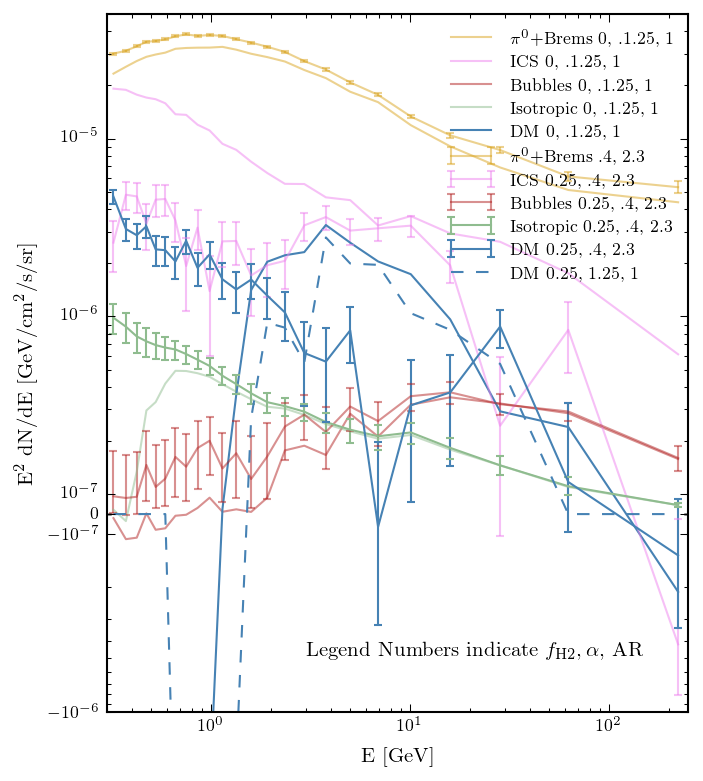

In [53]:
import Template
import Tools, healpy
reload(Tools)


#print np.array(A.m.matrix()).shape

#print A.templateList['DM'].valueError/A.templateList['DM'].value


def PlotComponent(A, name, color, mult=1, ls='-', err=True, label=None,**kwargs):
    E, flux, stat = A.GetSpectrum(name)
    #if stat

  
    if name is 'Data':
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=name.replace('_','+'),
                     capthick=1, capsize=2, ls='-',c='k')
    elif err==True:
        plt.errorbar(E/1e3,E**2*flux*mult/1e3,E**2*stat.T/1e3*mult, label=label,capthick=1, capsize=2, ls=ls, color=color[name], **kwargs)
    else: 
        plt.errorbar(E/1e3,E**2*flux*mult/1e3, label=label,capthick=1, capsize=2, ls=ls, color=color[name], **kwargs)
        
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')

    

plt.figure(figsize=(5,6))
#PlotComponent('Data')    
#PlotComponent('PSC')
#PlotComponent('Pi0_Brems')



faint_alpha = 0.5 

colors = {'ICS':'violet','Bubbles':'firebrick', 'Isotropic':'darkseagreen','DM':'steelblue','Pi0_Brems':'goldenrod'}
PlotComponent(A, 'Pi0_Brems', colors, err=False, label=r'$\pi^0$+Brems 0, .1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'ICS', colors, err=False, label=r'ICS 0, .1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'Bubbles', colors, err=False, label=r'Bubbles 0, .1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'Isotropic', colors, err=False, label=r'Isotropic 0, .1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'DM', colors, err=False, label=r'DM 0, .1.25, 1',alpha=1)
linthresh=1e-7
plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-6,1e-5)


#PlotComponent('AqRift',mult=10)


#plt.ylim(1e-8,4e-4)
plt.xlim(.3,500)


#plt.figure(figsize=(5,6))

PlotComponent(A2, 'Pi0_Brems', colors, err=True, label=r'$\pi^0$+Brems .4, 2.3',alpha=faint_alpha)
PlotComponent(A2, 'ICS', colors,ls='-', err=True, label=r'ICS 0.25, .4, 2.3',alpha=faint_alpha)
PlotComponent(A2, 'Bubbles', colors, ls='-', err=True, label=r'Bubbles 0.25, .4, 2.3',alpha=faint_alpha)
PlotComponent(A2, 'Isotropic', colors,ls='-', err=True, label=r'Isotropic 0.25, .4, 2.3',alpha=1)
PlotComponent(A2, 'DM', colors,ls='-', err=True, label=r'DM 0.25, .4, 2.3')

#PlotComponent(A3, 'Isotropic', colors,ls=':', err=False, label=r'Isotropic 0.25, 1.25, 1')
PlotComponent(A3, 'DM', colors,ls='--', err=False, label=r'DM 0.25, 1.25, 1')


plt.text(3,-5e-7, r'Legend Numbers indicate $f_{\rm H2},\alpha$, AR', fontsize=10)
#plt.text(3,-7e-7, 'With error bars NFW alpha=0.4, AR=2.4', fontsize=10)

#PlotComponent('AqRift',mult=10)
plt.legend(frameon=False, fontsize=8,ncol=1,handlelength=3)

linthresh=1e-7
plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-6,5e-5)
#plt.legend(frameon=False, fontsize=8,ncol=2)
#plt.ylim(1e-8,4e-4)
plt.xlim(.3,250)


#plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/change_NFW_axis_mod_s_46.pdf', bbox_inches='tight')

#A.SaveSpectra('./mod_c/spec_mod_s_P8_PSF3.pickle') # 3FGL with ext XCO fitted 
#A.SaveSpectra('./mod_c/spec_mod_s_42_40x40_noDM.pickle') # 3FGL with ext XCO fitted 

